In [134]:
import numpy as np
import itertools
from itertools import permutations
from itertools import combinations
from itertools import product
import matplotlib.pyplot as plt
import sympy as sp
import copy
from itertools import chain
import re

Deltapp = [1, [1, 1, 1], "d2"]
DeltappB = [1, [1.2, 1.2, 1.2], "d2"]
Deltap = [sp.sqrt(3), [1, 1, 2], "d1"]
DeltapB = [sp.sqrt(3), [2.2, 1.2, 1.2], "d1"]
Delta0 = [sp.sqrt(3), [1, 2, 2], "d0"]
Delta0B = [sp.sqrt(3), [2.2, 2.2, 1.2], "d0"]
Deltam = [1, [2, 2, 2], "d2"]
DeltamB = [1, [2.2, 2.2, 2.2], "d2"]
Sigmap = [1, [1, 1, 3], "s1"]
SigmapB = [1, [3.2, 1.2, 1.2], "s1"]
Sigma0 = [sp.sqrt(2), [1, 2, 3], "s0"]
Sigma0B = [sp.sqrt(2), [3.2, 2.2, 1.2], "s0"]
Sigmam = [1, [2, 2, 3], "s1"]
SigmamB = [1, [3.2, 2.2, 2.2], "s1"]
Nucleonp = [1, [1, 1, 2], "n"]
NucleonpB = [1, [2.2, 1.2, 1.2], "n"]
Nucleon0 = [-1, [2, 2, 1], "n"]
Nucleon0B = [-1, [1.2, 2.2, 2.2], "n"]
Xi0 = [1, [3, 3, 1], "x"]
Xi0B = [1, [1.2, 3.2, 3.2], "x"]
Xim = [1, [3, 3, 2], "x"]
XimB = [1, [2.2, 3.2, 3.2], "x"]
Lambda0 = [1, [1, 2, 3], "l"]
Lambda0B = [1, [3.2, 2.2, 1.2], "l"]
Omegam = [1, [3, 3, 3], "o"]
OmegamB = [1, [3.2, 3.2, 3.2], "o"]
Pip = [1, [2.2, 1], "M"]
PipB = [1, [1.2, 2], "M"]
Pi00 = [sp.sqrt(2)/2, [2.2, 2], "M"]
Pi01 = [-sp.sqrt(2)/2, [1.2, 1], "M"]
Eta00 = [1, [2.2, 2], "M"]
Eta01 = [1, [1.2, 1], "M"]
SuPositions = {'Pi0S': {1: Pi00, 2: Pi01}, 'Eta0S': {1: Eta00, 2: Eta01}}
Pi0 = [[1/(sp.sqrt(2)), [2.2, 2],'M'], [-1/(sp.sqrt(2)), [1.2, 1],'M']]
Pi0B = [[1/(sp.sqrt(2)), [2.2, 2],'M'], [-1/(sp.sqrt(2)), [1.2, 1],'M']]
Eta0 = [[1, [2.2, 2], 'M'], [1, [1.2, 1], 'M']]
Eta0B = [[1, [2.2, 2], 'M'], [1, [1.2, 1], 'M']]
Pim = [-1, [1.2, 2], "M"]
PimB = [-1, [2.2, 1], "M"]
Kaonp = [1, [3.2, 1], "M"]
KaonpB = [1, [1.2, 3], "M"]
Kaonm = [1, [3.2, 2], "M"]
KaonmB = [1, [2.2, 3], "M"]
Phi0 = [1, [3.2, 3], "M"]
Phi0B = [1, [3.2, 3], "M"]
ListOfBaryons = ["d2", "d1", "d0", "s1", "s0", "n", "o", "l", "x"]
################## Definitions for the unsimplified case with two particle-operators ##################

hadron_operatorsB = {'Delta': {3/2: DeltappB, 1/2: DeltapB, -1/2: Delta0B, -3/2: DeltamB},
                    'Sigma': {1: SigmapB, 0: Sigma0B, -1: SigmamB},
                    'Nucleon': {1/2: NucleonpB, -1/2: Nucleon0B},
                    'Xi': {1/2: Xi0B, -1/2: XimB},
                    'Lambda': {0: Lambda0B},
                    'Omega': {0: OmegamB},
                    'Pi': {1: PipB, 0: 'Pi0S', -1: PimB},
                    'KaonB': {1/2: KaonpB, -1/2: KaonmB},
                     'Kaon': {1/2: Kaonp, -1/2: Kaonm},
                    'Phi': {0: Phi0B},
                    'Eta': {0: 'Eta0S'},
                        }
hadron_operators = {'Delta': {3/2: Deltapp, 1/2: Deltap, -1/2: Delta0, -3/2: Deltam},
                        'Sigma': {1: Sigmap, 0: Sigma0, -1: Sigmam},
                         'Nucleon': {1/2: Nucleonp, -1/2: Nucleon0},
                         'Xi': {1/2: Xi0, -1/2: Xim},
                         'Lambda': {0: Lambda0},
                         'Omega': {0: Omegam},
                    'Pi': {1: Pip, 0: 'Pi0S', -1: Pim},
                    'Kaon': {1/2: Kaonp, -1/2: Kaonm},
                    'KaonB': {1/2: KaonpB, -1/2: KaonmB},
                    'Phi': {0: Phi0},
                    'Eta': {0: 'Eta0S'},
                        }

def hadron_multiplication(hadrons):
    elements = []
    for item in hadrons:
        if isinstance(item[0], list):
            elements.append(item)
        else:
            elements.append([item])
    result0 = list(product(*elements))
    result = [list(tup) for tup in result0]
    return result

def spec_state(stateN, Had):
    if stateN == 1:
        if hadron_operatorsB[Had][0] not in ['Eta0S', 'Pi0S']:
            res = {-1: hadron_operatorsB[Had][-1], 0: hadron_operatorsB[Had][0], 1: hadron_operatorsB[Had][1]}
            return res
        else:
            res = {-1: hadron_operatorsB[Had][-1], 0: [SuPositions[hadron_operatorsB[Had][0]][1], SuPositions[hadron_operatorsB[Had][0]][2]],
                   1: hadron_operatorsB[Had][1]}
            return res

    if stateN == 1/2:
        res = {-1/2: hadron_operatorsB[Had][-1/2], 1/2: hadron_operatorsB[Had][1/2]}
        return res

    if stateN == 3/2:
        res = {-3/2: hadron_operatorsB[Had][-3/2], -1/2: hadron_operatorsB[Had][-1/2], 1/2: hadron_operatorsB[Had][1/2], 3/2: hadron_operatorsB[Had][3/2]}
        return res

def tensor3(stateN, A, B, C):
    AH = spec_state(stateN[0], A)
    BH = spec_state(stateN[1], B)
    CH = spec_state(stateN[2], C)
    return {'A': AH, 'B': BH, 'C': CH}

def Create_State(Tensor, overal, components):
    q1 = Tensor['A'][components[0]]
    q2 = Tensor['B'][components[1]]
    q3 = Tensor['C'][components[2]]
    THadrons0 = [q1, q2, q3]
    THadrons = hadron_multiplication(THadrons0)
    if len(THadrons) > 1:
        result = []
        for DHadrons in THadrons:
            inBet = []
            finT = []
            ovAll = overal
            for i in DHadrons:
                ovAll *= i[0]
                inBet.append(i[1])
                finT.append(i[2])
            reconstructed_result = [ovAll, [element for sublist in inBet for element in sublist], finT]
            result.append(reconstructed_result)
    elif len(THadrons) == 1:
        result = []
        ovAll = overal
        DHadrons = THadrons[0]
        inBet = []
        finT = []
        for i in DHadrons:
            ovAll *= i[0]
            inBet.append(i[1])
            finT.append(i[2])
        result.append([ovAll, [element for sublist in inBet for element in sublist], finT])
    else:
        print("Error 1")
        result = []
    return result


def spec_state1(stateN, Had):
    if stateN == 1:
        if hadron_operators[Had][0] not in ['Eta0S', 'Pi0S']:
            res = {-1: hadron_operators[Had][-1], 0: hadron_operators[Had][0], 1: hadron_operators[Had][1]}
            return res
        else:
            res = {-1: hadron_operators[Had][-1], 0: [SuPositions[hadron_operators[Had][0]][1], SuPositions[hadron_operators[Had][0]][2]],
                   1: hadron_operators[Had][1]}
            return res

    if stateN == 1/2:
        res = {-1/2: hadron_operators[Had][-1/2], 1/2: hadron_operators[Had][1/2]}
        return res

    if stateN == 3/2:
        res = {-3/2: hadron_operators[Had][-3/2], -1/2: hadron_operators[Had][-1/2], 1/2: hadron_operators[Had][1/2], 3/2: hadron_operators[Had][3/2]}
        return res

def tensor31(stateN, A, B, C):
    AH = spec_state1(stateN[0], A)
    BH = spec_state1(stateN[1], B)
    CH = spec_state1(stateN[2], C)
    return {'A': AH, 'B': BH, 'C': CH}

def Create_State1(Tensor, overal, components):
    q1 = Tensor['A'][components[0]]
    q2 = Tensor['B'][components[1]]
    q3 = Tensor['C'][components[2]]
    THadrons0 = [q1, q2, q3]
    THadrons = hadron_multiplication(THadrons0)
    if len(THadrons) > 1:
        result = []
        for DHadrons in THadrons:
            inBet = []
            finT = []
            ovAll = overal
            for i in DHadrons:
                ovAll *= i[0]
                inBet.append(i[1])
                finT.append(i[2])
            finT.reverse()
            inBet.reverse()
            reconstructed_result = [ovAll, [element for sublist in inBet for element in sublist], finT]
            result.append(reconstructed_result)

    elif len(THadrons) == 1:
        result = []
        ovAll = overal
        DHadrons = THadrons[0]
        inBet = []
        finT = []
        for i in DHadrons:
            ovAll *= i[0]
            inBet.append(i[1])
            finT.append(i[2])
        finT.reverse()
        inBet.reverse()
        result.append([ovAll, [element for sublist in inBet for element in sublist], finT])
    else:
        print("Error 1")
        result = []
    return result
def three_hadron_operatorB(rep, I, I3, IAB, A, B, C):
    
    if rep == [1, 1, 1]:
        tensor = tensor3([1, 1, 1], A, B, C)
        if [I, I3, IAB] == [3, 3, 2]:
            result = Create_State(tensor, 1, [1, 1, 1])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 2, 2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [1, 1, 0]), 
                                Create_State(tensor, 1/sp.sqrt(3), [1, 0, 1]), 
                                Create_State(tensor, 1/sp.sqrt(3), [0, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 1, 2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(15), [1, 1, -1]), 
                                Create_State(tensor, 2/sp.sqrt(15), [1, 0, 0]), 
                                Create_State(tensor, 2/sp.sqrt(15), [0, 1, 0]), 
                                Create_State(tensor, 1/sp.sqrt(15), [1, -1, 1]), 
                                Create_State(tensor, 2/sp.sqrt(15), [0, 0, 1]), 
                                Create_State(tensor, 1/sp.sqrt(15), [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 0, 2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(10), [1, 0, -1]), 
                                Create_State(tensor, 1/sp.sqrt(10), [0, 1, -1]), 
                                Create_State(tensor, 1/sp.sqrt(10), [1, -1, 0]), 
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [0, 0, 0]), 
                                Create_State(tensor, 1/sp.sqrt(10), [-1, 1, 0]), 
                                Create_State(tensor, 1/sp.sqrt(10), [0, -1, 1]), 
                                Create_State(tensor, 1/sp.sqrt(10), [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(15), [1, -1, -1]), 
                                Create_State(tensor, 2/sp.sqrt(15), [0, 0, -1]), 
                                Create_State(tensor, 1/sp.sqrt(15), [-1, 1, -1]), 
                                Create_State(tensor, 2/sp.sqrt(15), [0, -1, 0]), 
                                Create_State(tensor, 2/sp.sqrt(15), [-1, 0, 0]), 
                                Create_State(tensor, 1/sp.sqrt(15), [-1, -1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [0, -1, -1]), 
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 0, -1]), 
                                Create_State(tensor, 1/sp.sqrt(3), [-1, -1, 0])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -3, 2]:
            result = Create_State(tensor, 1, [-1, -1, -1])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 2]:
            result = list(chain(Create_State(tensor, -sp.sqrt(sp.Rational(2,3)), [1, 1, 0]), 
                                Create_State(tensor, 1/sp.sqrt(6), [1, 0, 1]), 
                                Create_State(tensor, 1/sp.sqrt(6), [0, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [0, 1, 1]), 
                                Create_State(tensor, -1/sp.sqrt(2), [1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(3), [1, 1, -1]), 
                                Create_State(tensor, -1/(2*sp.sqrt(3)), [1, 0, 0]), 
                                Create_State(tensor, -1/(2*sp.sqrt(3)), [0, 1, 0]), 
                                Create_State(tensor, 1/(2*sp.sqrt(3)), [1, -1, 1]), 
                                Create_State(tensor, 1/sp.sqrt(3), [0, 0, 1]), 
                                Create_State(tensor, 1/(2*sp.sqrt(3)), [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 1]:
            result = list(chain(Create_State(tensor, -1/2, [1, 0, 0]), 
                                Create_State(tensor, 1/2, [0, 1, 0]), 
                                Create_State(tensor, -1/2, [1, -1, 1]), 
                                Create_State(tensor, 1/2, [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 2]:
            result = list(chain(Create_State(tensor, -1/2, [1, 0, -1]), 
                                Create_State(tensor, -1/2, [0, 1, -1]), 
                                Create_State(tensor, 1/2, [0, -1, 1]), 
                                Create_State(tensor, 1/2, [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 1]:
            result = list(chain(Create_State(tensor, -1/(2*sp.sqrt(3)), [1, 0, -1]), 
                                Create_State(tensor, 1/(2*sp.sqrt(3)), [0, 1, -1]), 
                                Create_State(tensor, -1/sp.sqrt(3), [1, -1, 0]), 
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, 0]), 
                                Create_State(tensor, -1/(2*sp.sqrt(3)), [0, -1, 1]), 
                                Create_State(tensor, 1/(2*sp.sqrt(3)), [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 2]:
            result = list(chain(Create_State(tensor, -1/(2*sp.sqrt(3)), [1, -1, -1]), 
                                Create_State(tensor, -1/sp.sqrt(3), [0, 0, -1]), 
                                Create_State(tensor, -1/(2*sp.sqrt(3)), [-1, 1, -1]), 
                                Create_State(tensor, 1/(2*sp.sqrt(3)), [0, -1, 0]), 
                                Create_State(tensor, 1/(2*sp.sqrt(3)), [-1, 0, 0]), 
                                Create_State(tensor, 1/sp.sqrt(3), [-1, -1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 1]:
            result = list(chain(Create_State(tensor, -1/2, [1, -1, -1]), 
                                Create_State(tensor, 1/2, [-1, 1, -1]), 
                                Create_State(tensor, -1/2, [0, -1, 0]), 
                                Create_State(tensor, 1/2, [-1, 0, 0])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(6), [0, -1, -1]), 
                                Create_State(tensor, -1/sp.sqrt(6), [-1, 0, -1]), 
                                Create_State(tensor, sp.sqrt(sp.Rational(2,3)), [-1, -1, 0])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [-1, 0, -1]), 
                                Create_State(tensor, -1/sp.sqrt(2), [0, -1, -1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 2]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(3,5)), [1, 1, -1]), 
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [1, 0, 0]), 
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, 1, 0]), 
                                Create_State(tensor, 1/(2 * sp.sqrt(15)), [1, -1, 1]), 
                                Create_State(tensor, 1/sp.sqrt(15), [0, 0, 1]), 
                                Create_State(tensor, 1/(2 * sp.sqrt(15)), [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 1]:
            result = list(chain(Create_State(tensor, 1/2, [1, 0, 0]), 
                                Create_State(tensor, -1/2, [0, 1, 0]), 
                                Create_State(tensor, -1/2, [1, -1, 1]), 
                                Create_State(tensor, 1/2, [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 0]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [1, -1, 1]), 
                                Create_State(tensor, -1/sp.sqrt(3), [0, 0, 1]), 
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 2]:
            result = list(chain(Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [1, 0, -1]), 
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [0, 1, -1]), 
                                Create_State(tensor, -1/sp.sqrt(15), [1, -1, 0]), 
                                Create_State(tensor, -2/sp.sqrt(15), [0, 0, 0]), 
                                Create_State(tensor, -1/sp.sqrt(15), [-1, 1, 0]), 
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [0, -1, 1]), 
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 1]:
            result = list(chain(Create_State(tensor, 1/2, [1, 0, -1]), 
                                Create_State(tensor, -1/2, [0, 1, -1]), 
                                Create_State(tensor, -1/2, [0, -1, 1]), 
                                Create_State(tensor, 1/2, [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 0]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [1, -1, 0]), 
                                Create_State(tensor, -1/sp.sqrt(3), [0, 0, 0]), 
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, 0])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 2]:
            result = list(chain(Create_State(tensor, 1/2 * sp.sqrt(15), [1, -1, -1]), 
                                Create_State(tensor, 1/sp.sqrt(15), [0, 0, -1]), 
                                Create_State(tensor, 1/2 * sp.sqrt(15), [-1, 1, -1]), 
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, -1, 0]), 
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [-1, 0, 0]), 
                                Create_State(tensor, sp.sqrt(sp.Rational(3,5)), [-1, -1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 1]:
            result = list(chain(Create_State(tensor, 1/2, [1, -1, -1]), 
                                Create_State(tensor, -1/2, [-1, 1, -1]), 
                                Create_State(tensor, -1/2, [0, -1, 0]), 
                                Create_State(tensor, 1/2, [-1, 0, 0])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 0]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [1, -1, -1]), 
                                Create_State(tensor, -1/sp.sqrt(3), [0, 0, -1]), 
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, -1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [0, 0, 1]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(6), [1, 0, -1]), 
                                Create_State(tensor, 1/sp.sqrt(6), [0, 1, -1]), 
                                Create_State(tensor, 1/sp.sqrt(6), [1, -1, 0]), 
                                Create_State(tensor, -1/sp.sqrt(6), [-1, 1, 0]), 
                                Create_State(tensor, -1/sp.sqrt(6), [0, -1, 1]), 
                                Create_State(tensor, 1/sp.sqrt(6), [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
######
    if rep == [1, 1, 1/2]:
        tensor = tensor3([1, 1, 1/2], A, B, C)
        if [I, I3, IAB] == [5/2, 5/2, 2]:
            result = Create_State(tensor, 1, [1, 1, 1/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(5), [1, 1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [1, 0, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [0, 1, 1/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(5), [1, 0, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [0, 1, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(10), [1, -1, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [0, 0, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(10), [-1, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(10), [1, -1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [0, 0, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(10), [-1, 1, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [0, -1, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 2]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [0, -1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [-1, 0, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, -1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 2]:
            result = Create_State(tensor, 1, [-1, -1, -1/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 2]:
            result = list(chain(Create_State(tensor, -2/sp.sqrt(5), [1, 1, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(10), [1, 0, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(10), [0, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [0, 1, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 2]:
            result = list(chain(Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1, 0, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [0, 1, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(15), [1, -1, 1/2]),
                                Create_State(tensor, 2/sp.sqrt(15), [0, 0, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(15), [-1, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(6), [1, 0, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [0, 1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [1, -1, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(15), [1, -1, -1/2]),
                                Create_State(tensor, -2/sp.sqrt(15), [0, 0, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(15), [-1, 1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [0, -1, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(3), [1, -1, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [0, -1, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(10), [0, -1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(10), [-1, 0, -1/2]),
                                Create_State(tensor, 2/sp.sqrt(5), [-1, -1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [-1, 0, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [0, -1, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [1, 0, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, 1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [1, -1, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [-1, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 0]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [1, -1, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, 0, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(6), [1, -1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [-1, 1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, -1, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 0]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [1, -1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, 0, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
####
    if rep == [1, 1, 3/2]:
        tensor = tensor3([1, 1, 3/2], A, B, C)
        if [I, I3, IAB] == [7/2, 7/2, 2]:
            result = Create_State(tensor, 1, [1, 1, 3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 5/2, 2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(3,7)), [1, 1, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [1, 0, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [0, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 3/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(7), [1, 1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [1, 0, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [0, 1, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(21), [1, -1, 3/2]),
                                Create_State(tensor, 2/sp.sqrt(21), [0, 0, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(21), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 1/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(35), [1, 1, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [1, 0, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [0, 1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [1, -1, 1/2]),
                                Create_State(tensor, 2*sp.sqrt(sp.Rational(3,35)), [0, 0, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [-1, 1, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,35)), [0, -1, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,35)), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -1/2, 2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(2,35)), [1, 0, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,35)), [0, 1, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [1, -1, -1/2]),
                                Create_State(tensor, 2*sp.sqrt(sp.Rational(3,35)), [0, 0, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [-1, 1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [0, -1, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [-1, 0, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(35), [-1, -1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -3/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(21), [1, -1, -3/2]),
                                Create_State(tensor, 2/sp.sqrt(21), [0, 0, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(21), [-1, 1, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [0, -1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [-1, 0, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(7), [-1, -1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -5/2, 2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [0, -1, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [-1, 0, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,7)), [-1, -1, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -7/2, 2]:
            result = Create_State(tensor, 1, [-1, -1, -3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 2]:
            result = list(chain(
                Create_State(tensor, -2/sp.sqrt(7), [1, 1, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [1, 0, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [0, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 1]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(2), [0, 1, 3/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 2]:
            result = list(chain(
                Create_State(tensor, -4/sp.sqrt(35), [1, 1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(70), [1, 0, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(70), [0, 1, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [1, -1, 3/2]),
                                Create_State(tensor, 2*sp.sqrt(sp.Rational(3,35)), [0, 0, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 1]:
            result = list(chain(
                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1, 0, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [0, 1, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [1, -1, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 2]:
            result = list(chain(
                Create_State(tensor, -sp.sqrt(sp.Rational(6,35)), [1, 1, -3/2]),
                                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(5,7)), [1, 0, -1/2]),
                                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(5,7)), [0, 1, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [1, -1, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,35)), [0, 0, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [-1, 1, 1/2]),
                                Create_State(tensor, 3/2*sp.sqrt(sp.Rational(3,35)), [0, -1, 3/2]),
                                Create_State(tensor, 3/2*sp.sqrt(sp.Rational(3,35)), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 1]:
            result = list(chain(
                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [1, 0, -1/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [0, 1, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1, -1, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1, 1, 1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [0, -1, 3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 2]:
            result = list(chain(
                Create_State(tensor, -3/2*sp.sqrt(sp.Rational(3,35)), [1, 0, -3/2]),
                                Create_State(tensor, -3/2*sp.sqrt(sp.Rational(3,35)), [0, 1, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(70), [1, -1, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,35)), [0, 0, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(70), [-1, 1, -1/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(5,7)), [0, -1, 1/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(5,7)), [-1, 0, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [-1, -1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 1]:
            result = list(chain(
                Create_State(tensor, -1/(2*sp.sqrt(5)), [1, 0, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [0, 1, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1, -1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1, 1, -1/2]),
                                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [0, -1, 1/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 2]:
            result = list(chain(
                Create_State(tensor, -sp.sqrt(sp.Rational(3,35)), [1, -1, -3/2]),
                                Create_State(tensor, -2*sp.sqrt(sp.Rational(3,35)), [0, 0, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,35)), [-1, 1, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [0, -1, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [-1, 0, -1/2]),
                                Create_State(tensor, 4/sp.sqrt(35), [-1, -1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 1]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(5), [1, -1, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, 1, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1, 0, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 2]:
            result = list(chain(
                Create_State(tensor, -sp.sqrt(sp.Rational(3,14)), [0, -1, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,14)), [-1, 0, -3/2]),
                                Create_State(tensor, 2/sp.sqrt(7), [-1, -1, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 1]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(2), [-1, 0, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [0, -1, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [1, 1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [1, 0, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [0, 1, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [1, -1, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,15)), [0, 0, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 1]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(5), [1, 0, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [0, 1, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1, -1, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 0]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(3), [1, -1, 3/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, 0, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [1, 1, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [1, -1, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,15)), [0, 0, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [-1, 1, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [0, -1, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(
                Create_State(tensor, 2/sp.sqrt(15), [1, 0, -1/2]),
                                Create_State(tensor, -2/sp.sqrt(15), [0, 1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [1, -1, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [-1, 1, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [0, -1, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 0]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(3), [1, -1, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, 0, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(5), [1, 0, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [0, 1, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [1, -1, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,15)), [0, 0, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [-1, 1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [-1, -1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(5), [1, 0, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [0, 1, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [1, -1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [-1, 1, -1/2]),
                                Create_State(tensor, -2/sp.sqrt(15), [0, -1, 1/2]),
                                Create_State(tensor, 2/sp.sqrt(15), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 0]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(3), [1, -1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, 0, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(30), [1, -1, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,15)), [0, 0, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [-1, 1, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [0, -1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [-1, 0, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [-1, -1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [1, -1, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [-1, 1, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [0, -1, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, 0, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 0]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(3), [1, -1, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, 0, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 2]:
            result = list(chain(
                Create_State(tensor, -sp.sqrt(sp.Rational(2,5)), [1, 1, -3/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [1, 0, -1/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [0, 1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [1, -1, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,15)), [0, 0, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [-1, 1, 1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [0, -1, 3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(
                Create_State(tensor, -1/(2*sp.sqrt(3)), [1, 0, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(3)), [0, 1, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [1, -1, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [-1, 1, 1/2]),
                                Create_State(tensor, -1/2, [0, -1, 3/2]),
                                Create_State(tensor, 1/2, [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 2]:
            result = list(chain(
                Create_State(tensor, -1/(2*sp.sqrt(5)), [1, 0, -3/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [0, 1, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [1, -1, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,15)), [0, 0, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [-1, 1, -1/2]),
                                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [0, -1, 1/2]),
                                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [-1, 0, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [-1, -1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(
                Create_State(tensor, -1/2, [1, 0, -3/2]),
                                Create_State(tensor, 1/2, [0, 1, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [1, -1, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [-1, 1, -1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(3)), [0, -1, 1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(3)), [-1, 0, 1/2]),
                                Create_State(tensor, -1/2, [1, -1, 3/2]),
                Create_State(tensor, 1/2, [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
####
    if rep == [1, 1/2, 1/2]:
        tensor = tensor3([1, 1/2, 1/2], A, B, C)

        if [I, I3, IAB] == [2, 2, 3/2]:
            result = Create_State(tensor, 1, [1, 1/2, 1/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 3/2]:
            result = list(chain(
                Create_State(tensor, 1/2, [1, 1/2, -1/2]),
                Create_State(tensor, 1/2, [1, -1/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(2), [0, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [2, 0, 3/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(6), [1, -1/2, -1/2]),
                Create_State(tensor, 1/sp.sqrt(3), [0, 1/2, -1/2]),
                Create_State(tensor, 1/sp.sqrt(3), [0, -1/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(6), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [2, -1, 3/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(2), [0, -1/2, -1/2]),
                Create_State(tensor, 1/2, [-1, 1/2, -1/2]),
                Create_State(tensor, 1/2, [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [2, -2, 3/2]:
            result = list(chain(
                Create_State(tensor, 1, [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, 1, 3/2]:
            result = list(chain(
                Create_State(tensor, -1/2*sp.sqrt(3), [1, 1/2, -1/2]),
                Create_State(tensor, 1/(2*sp.sqrt(3)), [1, -1/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(6), [0, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, 1, 1/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(3), [0, 1/2, 1/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(2,3)), [1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, 0, 3/2]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(6), [1, -1/2, -1/2]),
                Create_State(tensor, -1/sp.sqrt(3), [0, 1/2, -1/2]),
                Create_State(tensor, 1/sp.sqrt(3), [0, -1/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(6), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, 0, 1/2]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(3), [1, -1/2, -1/2]),
                Create_State(tensor, 1/sp.sqrt(6), [0, 1, -1/2]),
                Create_State(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(3), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, -1, 3/2]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(6), [0, -1/2, -1/2]),
                Create_State(tensor, -1/(2*sp.sqrt(3)), [-1, 1/2, -1/2]),
                Create_State(tensor, 1/2*sp.sqrt(3), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, -1, 1/2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(2,3)), [-1, 1/2, -1/2]),
                Create_State(tensor, -1/sp.sqrt(3), [0, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [0, 0, 1/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(3), [1, -1/2, -1/2]),
                Create_State(tensor, -1/sp.sqrt(6), [0, 1/2, -1/2]),
                Create_State(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(3), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
#####
    if rep == [1, 1/2, 3/2]:
        tensor = tensor3([1, 1/2, 3/2], A, B, C)

        if [I, I3, IAB] == [3, 3, 3/2]:
            result = Create_State(tensor, 1, [1, 1/2, 3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 2, 3/2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [1, 1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [1, -1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [0, 1/2, 3/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 1, 3/2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(5), [1, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [1, -1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [0, 1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,15)), [0, -1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(15), [-1, 1/2, 3/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 0, 3/2]:
            result = list(chain(Create_State(tensor, 1/(2*sp.sqrt(5)), [1, 1/2, -3/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [1, -1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [0, 1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [0, -1/2, 1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [-1, 1/2, 1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 3/2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(15), [1, -1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,15)), [0, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [0, -1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 3/2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [0, -1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [-1, 1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(2), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -3, 3/2]:
            result = Create_State(tensor, 1, [-1, -1/2, -3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 3/2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(2), [1, 1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [1, -1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [0, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 1/2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [0, 1/2, 3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,3)), [1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 3/2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(2), [1, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [0, -1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 1/2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(2), [1, -1/2, 1/2]),
                                Create_State(tensor, 1/2, [0, 1/2, 1/2]),
                                Create_State(tensor, -1/2/sp.sqrt(3), [0, -1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 3/2]:
            result = list(chain(Create_State(tensor, -1/2, [1, 1/2, -3/2]),
                                Create_State(tensor, -1/2/sp.sqrt(3), [1, -1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State(tensor, 1/2, [-1, 1/2, 1/2]),
                                Create_State(tensor, 1/2, [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 1/2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(3), [1, -1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 3/2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(6), [1, -1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, 1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(2), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 1/2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(6), [1, -1/2, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State(tensor, -1/2, [-1, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(2), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 3/2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(3), [0, -1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [-1, 1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 1/2]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(2,3)), [-1, -1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, -1/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 3/2]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [1, 1/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,15)), [1, -1/2, 1/2]),
                                Create_State(tensor, -2/sp.sqrt(15), [0, 1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(5), [0, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(10), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 1/2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(6), [1, -1/2, 1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(3)), [0, 1/2, 1/2]),
                                Create_State(tensor, -1/2, [-1, 1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(2), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 3/2]:
            result = list(chain(Create_State(tensor, 3/2*sp.sqrt(5), [1, 1/2, -3/2]),
                                Create_State(tensor, -1/2*sp.sqrt(15), [1, -1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [0, 1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [0, -1/2, 1/2]),
                                Create_State(tensor, -1/2*sp.sqrt(15), [-1, 1/2, 1/2]),
                                Create_State(tensor, -1/2*sp.sqrt(5), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 1/2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [1, -1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 3/2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(10), [1, -1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [0, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(2), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 1/2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [1, -1/2, -3/2]),
                                Create_State(tensor, -1/2, [0, 1/2, -3/2]),
                                Create_State(tensor, -1/2, [-1, 1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(2), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -2, 3/2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(3), [0, -1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [-1, 1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 1/2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [1, -1/2, -3/2]),
                                Create_State(tensor, -1/2, [0, 1/2, -3/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(3)), [0, -1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [-1, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 1/2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [1, -1/2, -3/2]),
                                Create_State(tensor, -1/2, [0, 1/2, -3/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(3)), [0, -1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [-1, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [0, 0, 3/2]:
            result = list(chain(Create_State(tensor, -1/2, [1, 1/2, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(3)), [1, -1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(3)), [-1, 1/2, 1/2]),
                                Create_State(tensor, 1/2, [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


#####
    if rep == [1, 3/2, 3/2]:
        tensor = tensor3([1, 3/2, 3/2], A, B, C)


        if [I, I3, IAB] == [4, 4, 5/2]:
            result = list(chain(Create_State(tensor, 1, [1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, 3, 5/2]:
            result = list(chain(Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [1, 3/2, 1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [1, 1/2, 3/2]),
                                Create_State(tensor, 1/2, [0, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, 2, 5/2]:
            result = list(chain(Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [1, 3/2, -1/2]),
                                Create_State(tensor, 3/(2 * sp.sqrt(7)), [1, 1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [0, 3/2, 1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [1, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [0, 1/2, 3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(7)), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, 1, 5/2]:
            result = list(chain(Create_State(tensor, 1/(2 * sp.sqrt(14)), [1, 3/2, -3/2]),
                                Create_State(tensor, 3/(2 * sp.sqrt(14)), [1, 1/2, -1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [0, 3/2, -1/2]),
                                Create_State(tensor, 3/(2 * sp.sqrt(14)), [1, -1/2, 1/2]),
                                Create_State(tensor, 3/(2 * sp.sqrt(7)), [0, 1/2, 1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,14)), [-1, 3/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(14)), [1, -3/2, 3/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [0, -1/2, 3/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,14)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, 0, 5/2]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [1, 1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(35), [0, 3/2, -3/2]),
                                Create_State(tensor, 3/sp.sqrt(70), [1, -1/2, -1/2]),
                                Create_State(tensor, 3/sp.sqrt(35), [0, 1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [-1, 3/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [1, -3/2, 1/2]),
                                Create_State(tensor, 3/sp.sqrt(35), [0, -1/2, 1/2]),
                                Create_State(tensor, 3/sp.sqrt(70), [-1, 1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(35), [0, -3/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, -1, 5/2]:
            result = list(chain(Create_State(tensor, 1/(2*sp.sqrt(14)), [1, -1/2, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(7)), [0, 1/2, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(14)), [-1, 3/2, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(14)), [1, -3/2, -1/2]),
                                Create_State(tensor, 3/(2*sp.sqrt(7)), [0, -1/2, -1/2]),
                                Create_State(tensor, 3/(2*sp.sqrt(14)), [-1, 1/2, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(7)), [0, -3/2, 1/2]),
                                Create_State(tensor, 3/(2*sp.sqrt(14)), [-1, -1/2, 1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(14)), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, -2, 5/2]:
            result = list(chain(Create_State(tensor, 1/(2*sp.sqrt(7)), [1, -3/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [0, -1/2, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(7)), [-1, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [0, -3/2, -1/2]),
                                Create_State(tensor, 3/(2*sp.sqrt(7)), [-1, -1/2, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(7)), [-1, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, -3, 5/2]:
            result = list(chain(Create_State(tensor, 1/2, [0, -3/2, -3/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,2)), [-1, -1/2, -3/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,2)), [-1, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, -4, 5/2]:
            result = list(chain(Create_State(tensor, 1, [-1, -3/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 3, 5/2]:
            result = list(chain(Create_State(tensor, -1/(2*sp.sqrt(sp.Rational(5,2))), [1, 3/2, 1/2]),
                                Create_State(tensor, 3/(2*sp.sqrt(10)), [1, 1/2, 3/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [0, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 3, 3/2]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(3,5)), [0, 3/2, 3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,5)), [1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 2, 5/2]:
            result = list(chain(Create_State(tensor, -1/(2*sp.sqrt(sp.Rational(5,3))), [1, 3/2, -1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [1, 1/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [0, 3/2, 1/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [1, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [0, 1/2, 3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 2, 3/2]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(5), [1, 1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [0, 3/2, 1/2]),
                                Create_State(tensor, -2/sp.sqrt(15), [1, -1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [0, 1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 1, 5/2]:
            result = list(chain(Create_State(tensor, -1/(2*sp.sqrt(2)), [1, 3/2, -3/2]),
                                Create_State(tensor, -7/(10*sp.sqrt(2)), [1, 1/2, -1/2]),
                                Create_State(tensor, -7/(10*sp.sqrt(3)), [0, 3/2, -1/2]),
                                Create_State(tensor, 1/(10*sp.sqrt(2)), [1, -1/2, 1/2]),
                                Create_State(tensor, 1/10, [0, 1/2, 1/2]),
                                Create_State(tensor, 1/(10*sp.sqrt(6)), [-1, 3/2, 1/2]),
                                Create_State(tensor, 3/(10*sp.sqrt(2)), [1, -3/2, 3/2]),
                                Create_State(tensor, 3/(10*sp.sqrt(3)), [0, -1/2, 3/2]),
                                Create_State(tensor, 3/(10*sp.sqrt(2)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 1, 3/2]:
            result = list(chain(Create_State(tensor, -1/5*sp.sqrt(2), [1, 1/2, -1/2]),
                                Create_State(tensor, 1/5*sp.sqrt(3), [0, 3/2, -1/2]),
                                Create_State(tensor, -2/5*sp.sqrt(2), [1, -1/2, 1/2]),
                                Create_State(tensor, 1/5, [0, 1/2, 1/2]),
                                Create_State(tensor, 1/5*sp.sqrt(6), [-1, 3/2, 1/2]),
                                Create_State(tensor, -1/5*sp.sqrt(2), [1, -3/2, 3/2]),
                                Create_State(tensor, -1/5*sp.sqrt(3), [0, -1/2, 3/2]),
                                Create_State(tensor, 2/5*sp.sqrt(sp.Rational(2,3)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 0, 5/2]:
            result = list(chain(Create_State(tensor, -3/(5*sp.sqrt(2)), [1, 1/2, -3/2]),
                                Create_State(tensor, -1/5*sp.sqrt(3), [0, 3/2, -3/2]),
                                Create_State(tensor, -1/5*sp.sqrt(sp.Rational(3,2)), [1, -1/2, -1/2]),
                                Create_State(tensor, -1/5*sp.sqrt(3), [0, 1/2, -1/2]),
                                Create_State(tensor, -1/(5*sp.sqrt(2)), [-1, 3/2, -1/2]),
                                Create_State(tensor, 1/(5*sp.sqrt(2)), [1, -3/2, 1/2]),
                                Create_State(tensor, 1/5*sp.sqrt(3), [0, -1/2, 1/2]),
                                Create_State(tensor, 1/5*sp.sqrt(sp.Rational(3,2)), [-1, 1/2, 1/2]),
                                Create_State(tensor, 1/5*sp.sqrt(3), [0, -3/2, 3/2]),
                                Create_State(tensor, 3/(5*sp.sqrt(2)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 0, 3/2]:
            result = list(chain(
                                Create_State(tensor, 1/(5*sp.sqrt(2)), [1, 1/2, -3/2]),
                                Create_State(tensor, 1/10*sp.sqrt(3), [0, 3/2, -3/2]),
                                Create_State(tensor, 1/5*sp.sqrt(6), [1, -1/2, -1/2]),
                                Create_State(tensor, 1/10*sp.sqrt(3), [0, 1/2, -1/2]),
                                Create_State(tensor, 3/(5*sp.sqrt(2)), [-1, 3/2, -1/2]),
                                Create_State(tensor, 3/(5*sp.sqrt(2)), [1, -3/2, 1/2]),
                                Create_State(tensor, 1/10*sp.sqrt(3), [0, -1/2, 1/2]),
                                Create_State(tensor, 1/5*sp.sqrt(6), [-1, 1/2, 1/2]),
                                Create_State(tensor, 1/10*sp.sqrt(3), [0, -3/2, 3/2]),
                                Create_State(tensor, 1/(5*sp.sqrt(2)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 5/2]:
            result = list(chain(
                                Create_State(tensor, 3/(10*sp.sqrt(sp.Rational(3,2))), [1, -1/2, -3/2]),
                                Create_State(tensor, 3/10*sp.sqrt(3), [0, 1/2, -3/2]),
                                Create_State(tensor, 3/(10*sp.sqrt(2)), [-1, 3/2, -3/2]),
                                Create_State(tensor, 1/(10*sp.sqrt(6)), [1, -3/2, -1/2]),
                                Create_State(tensor, 1/10, [0, -1/2, -1/2]),
                                Create_State(tensor, 1/(10*sp.sqrt(2)), [-1, 1/2, -1/2]),
                                Create_State(tensor, 7/(10*sp.sqrt(3)), [0, -3/2, 1/2]),
                                Create_State(tensor, 7/(10*sp.sqrt(2)), [-1, -1/2, 1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(2)), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 3/2]:
            result = list(chain(
                                Create_State(tensor, 2/(5*sp.sqrt(sp.Rational(2,3))), [1, -1/2, -3/2]),
                                Create_State(tensor, 1/(5*sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State(tensor, 1/5*sp.sqrt(2), [-1, 3/2, -3/2]),
                                Create_State(tensor, 1/5*sp.sqrt(6), [1, -3/2, -1/2]),
                                Create_State(tensor, 1/5, [0, -1/2, -1/2]),
                                Create_State(tensor, 2/5*sp.sqrt(2), [-1, 1/2, -1/2]),
                                Create_State(tensor, 1/5*sp.sqrt(3), [0, -3/2, 1/2]),
                                Create_State(tensor, 1/5*sp.sqrt(2), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 5/2]:
            result = list(chain(
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [1, -3/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [0, -1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,5))/2, [-1, 1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [0, -3/2, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-1, -1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(5,3))/2, [-1, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 3/2]:
            result = list(chain(
                                Create_State(tensor, 1/sp.sqrt(5), [1, -3/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [0, -1/2, -3/2]),
                                Create_State(tensor, 2/sp.sqrt(15), [-1, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [0, -3/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -3, 5/2]:
            result = list(chain(
                                Create_State(tensor, -1/(2*sp.sqrt(sp.Rational(5,3))), [0, -3/2, -3/2]),
                                Create_State(tensor, -3/(2*sp.sqrt(10)), [-1, -1/2, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(sp.Rational(5,2))), [-1, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -3, 3/2]:
            result = list(chain(
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [-1, -1/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,5)), [0, -3/2, -3/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 5/2]:
            result = list(chain(
                                Create_State(tensor, sp.sqrt(sp.Rational(10,21)), [1, 3/2, -1/2]),
                                Create_State(tensor, -2*sp.sqrt(sp.Rational(2,35)), [1, 1/2, 1/2]),
                                Create_State(tensor, -4/sp.sqrt(105), [0, 3/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [1, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [0, 1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 3/2]:
            result = list(chain(
                                Create_State(tensor, 1/sp.sqrt(5), [1, 1/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [0, 3/2, 1/2]),
                                Create_State(tensor, -2/sp.sqrt(15), [1, -1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [0, 1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 1/2]:
            result = list(chain(
                                Create_State(tensor, 1/sp.sqrt(6), [1, -1/2, 3/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, 1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(2), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 5/2]:
            result = list(chain(
                                Create_State(tensor, sp.sqrt(sp.Rational(5,14)), [1, 3/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [1, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(105), [0, 3/2, -1/2]),
                                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(5,14)), [1, -1/2, 1/2]),
                                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(5,7)), [0, 1/2, 1/2]),
                                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(5,42)), [-1, 3/2, 1/2]),
                                Create_State(tensor, 3/(2*sp.sqrt(70)), [1, -3/2, 3/2]),
                                Create_State(tensor, 3/2*sp.sqrt(sp.Rational(3,35)), [0, -1/2, 3/2]),
                                Create_State(tensor, 3/2*sp.sqrt(sp.Rational(3,70)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 3/2]:
            result = list(chain(
                                Create_State(tensor, 1/sp.sqrt(5), [1, 1/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [0, 3/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [1, -3/2, 3/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [0, -1/2, 3/2]),
                                Create_State(tensor, 2/sp.sqrt(15), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 1/2]:
            result = list(chain(
                                Create_State(tensor, 1/(2*sp.sqrt(2)), [1, -1/2, 1/2]),
                                Create_State(tensor, -1/2, [0, 1/2, 1/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,2)), [-1, 3/2, 1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(2)), [1, -3/2, 3/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(3)), [0, -1/2, 3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(6)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 5/2]:
            result = list(chain(
                Create_State(tensor, 3/sp.sqrt(35), [1, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [0, 3/2, -3/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [1, -1/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,70)), [0, 1/2, -1/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(35)), [-1, 3/2, -1/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(35)), [1, -3/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,70)), [0, -1/2, 1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [-1, 1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [0, -3/2, 3/2]),
                                Create_State(tensor, 3/sp.sqrt(35), [-1, -1/2, 3/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 3/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(10), [1, 1/2, -3/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, 3/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,15)), [1, -1/2, -1/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(15)), [0, 1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(10), [-1, 3/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(10), [1, -3/2, 1/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(15)), [0, -1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,15)), [-1, 1/2, 1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, -3/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(10), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 1/2]:
            result = list(chain(
                Create_State(tensor, 1/(2 * sp.sqrt(3)), [1, -1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State(tensor, 1/2, [-1, 3/2, -1/2]),
                                Create_State(tensor, 1/2, [1, -3/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(3)), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 5/2]:
            result = list(chain(
                Create_State(tensor, 3/2 * sp.sqrt(sp.Rational(3,70)), [1, -1/2, -3/2]),
                                Create_State(tensor, 3/2 * sp.sqrt(sp.Rational(3,35)), [0, 1/2, -3/2]),
                                Create_State(tensor, 3/(2 * sp.sqrt(70)), [-1, 3/2, -3/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,42)), [1, -3/2, -1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [0, -1/2, -1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,14)), [-1, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(105), [0, -3/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [-1, -1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(5,14)), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 3/2]:
            result = list(chain(
                Create_State(tensor, 2/sp.sqrt(15), [1, -1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [0, 1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [-1, 3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -3/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 1/2]:
            result = list(chain(
                Create_State(tensor, 1/(2 * sp.sqrt(6)), [1, -1/2, -3/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(2)), [-1, 3/2, -3/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [1, -3/2, -1/2]),
                                Create_State(tensor, -1/2, [0, -1/2, -1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(2)), [-1, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 0, 3/2]:
            result = list(chain(
                Create_State(tensor, -1/(5 * sp.sqrt(2)), [1, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(3)/10, [0, 3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(6)/5, [1, -1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(3)/10, [0, 1/2, -1/2]),
                                Create_State(tensor, 3/(5 * sp.sqrt(2)), [-1, 3/2, -1/2]),
                                Create_State(tensor, -3/(5 * sp.sqrt(2)), [1, -3/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(3)/10, [0, -1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(6)/5, [-1, 1/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(3)/10, [0, -3/2, 3/2]),
                                Create_State(tensor, 1/(5 * sp.sqrt(2)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 5/2]:
            result = list(chain(
                Create_State(tensor, -3/(10 * sp.sqrt(sp.Rational(3,2))), [1, -1/2, -3/2]),
                                Create_State(tensor, -3/(10 * sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State(tensor, -3/(10 * sp.sqrt(2)), [-1, 3/2, -3/2]),
                                Create_State(tensor, -1/(10 * sp.sqrt(6)), [1, -3/2, -1/2]),
                                Create_State(tensor, -1/10, [0, -1/2, -1/2]),
                                Create_State(tensor, -1/(10 * sp.sqrt(2)), [-1, 1/2, -1/2]),
                                Create_State(tensor, 7/(10 * sp.sqrt(3)), [0, -3/2, 1/2]),
                                Create_State(tensor, 7/(10 * sp.sqrt(2)), [-1, -1/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(2)), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 3/2]:
            result = list(chain(
                Create_State(tensor, -2/(5 * sp.sqrt(sp.Rational(2,3))), [1, -1/2, -3/2]),
                                Create_State(tensor, 1/(5 * sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(2)/5, [-1, 3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(6)/5, [1, -3/2, -1/2]),
                                Create_State(tensor, -1/5, [0, -1/2, -1/2]),
                                Create_State(tensor, 2/(5 * sp.sqrt(2)), [-1, 1/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(3)/5, [0, -3/2, 1/2]),
                                Create_State(tensor, sp.sqrt(2)/5, [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 5/2]:
            result = list(chain(
                Create_State(tensor, -1/(2 * sp.sqrt(5)), [1, -3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -1/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,5))/2, [-1, 1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [0, -3/2, -1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(5)), [-1, -1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(5,3))/2, [-1, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 3/2]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(5), [1, -3/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [0, -1/2, -3/2]),
                                Create_State(tensor, 2/sp.sqrt(15), [-1, 1/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -3/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


        elif [I, I3, IAB] == [3, -3, 5/2]:
            result = list(chain(
                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, -3/2, -3/2]),
                                Create_State(tensor, -3/(2 * sp.sqrt(10)), [-1, -1/2, -3/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(5,2)), [-1, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -3, 3/2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [-1, -1/2, -3/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(3,5)), [0, -3/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 5/2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(10,21)), [1, 3/2, -1/2]),
                                Create_State(tensor, -2 * sp.sqrt(sp.Rational(2,35)), [1, 1/2, 1/2]),
                                Create_State(tensor, -4/sp.sqrt(105), [0, 3/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [1, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [0, 1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 3/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(5), [1, 1/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [0, 3/2, 1/2]),
                                Create_State(tensor, -2/sp.sqrt(15), [1, -1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [0, 1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 1/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(6), [1, -1/2, 3/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, 1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(2), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 5/2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(5,14)), [1, 3/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [1, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(105), [0, 3/2, -1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,14)), [1, -1/2, 1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [0, 1/2, 1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,42)), [-1, 3/2, 1/2]),
                                Create_State(tensor, 3/(2 * sp.sqrt(70)), [1, -3/2, 3/2]),
                                Create_State(tensor, 3/2 * sp.sqrt(sp.Rational(3,35)), [0, -1/2, 3/2]),
                                Create_State(tensor, 3/2 * sp.sqrt(sp.Rational(3,70)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 3/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(5), [1, 1/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [0, 3/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [1, -3/2, 3/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [0, -1/2, 3/2]),
                                Create_State(tensor, 2/sp.sqrt(15), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 1/2]:
            result = list(chain(
                Create_State(tensor, 1/(2 * sp.sqrt(2)), [1, -1/2, 1/2]),
                                Create_State(tensor, -1/2, [0, 1/2, 1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [-1, 3/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(2)), [1, -3/2, 3/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(3)), [0, -1/2, 3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(6)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 5/2]:
            result = list(chain(
                Create_State(tensor, 3/sp.sqrt(35), [1, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [0, 3/2, -3/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [1, -1/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,70)), [0, 1/2, -1/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(35)), [-1, 3/2, -1/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(35)), [1, -3/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,70)), [0, -1/2, 1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [-1, 1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [0, -3/2, 3/2]),
                                Create_State(tensor, 3/sp.sqrt(35), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 3/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(10), [1, 1/2, -3/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, 3/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,15)), [1, -1/2, -1/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(15)), [0, 1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(10), [-1, 3/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(10), [1, -3/2, 1/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(15)), [0, -1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,15)), [-1, 1/2, 1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, -3/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(10), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 1/2]:
            result = list(chain(
                Create_State(tensor, 1/(2 * sp.sqrt(3)), [1, -1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State(tensor, 1/2, [-1, 3/2, -1/2]),
                                Create_State(tensor, 1/2, [1, -3/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(3)), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 5/2]:
            result = list(chain(
                Create_State(tensor, 3/2 * sp.sqrt(sp.Rational(3,70)), [1, -1/2, -3/2]),
                                Create_State(tensor, 3/2 * sp.sqrt(sp.Rational(3,35)), [0, 1/2, -3/2]),
                                Create_State(tensor, 3/(2 * sp.sqrt(70)), [-1, 3/2, -3/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,42)), [1, -3/2, -1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [0, -1/2, -1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,14)), [-1, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(105), [0, -3/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [-1, -1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(5,14)), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 3/2]:
            result = list(chain(
                Create_State(tensor, 2/sp.sqrt(15), [1, -1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [0, 1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [-1, 3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -3/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


        elif [I, I3, IAB] == [2, -1, 1/2]:
            result = list(chain(
                Create_State(tensor, 1/(2 * sp.sqrt(6)), [1, -1/2, -3/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(2)), [-1, 3/2, -3/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [1, -3/2, -1/2]),
                                Create_State(tensor, -1/2, [0, -1/2, -1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(2)), [-1, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 5/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(70), [1, -3/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [0, -1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [-1, 1/2, -3/2]),
                                Create_State(tensor, -4/sp.sqrt(105), [0, -3/2, -1/2]),
                                Create_State(tensor, -2 * sp.sqrt(sp.Rational(2,35)), [-1, -1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(10,21)), [-1, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result



        elif [I, I3, IAB] == [2, -2, 3/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(5), [1, -3/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [0, -1/2, -3/2]),
                                Create_State(tensor, -2/sp.sqrt(15), [-1, 1/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -3/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 1/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(2), [1, -3/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(3), [0, -1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [-1, 1/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 5/2]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(2), [1, 3/2, -3/2]),
                                Create_State(tensor, 3/(5 * sp.sqrt(2)), [1, 1/2, -1/2]),
                                Create_State(tensor, 1/5 * sp.sqrt(3), [0, 3/2, -1/2]),
                                Create_State(tensor, -3/(10 * sp.sqrt(2)), [1, -1/2, 1/2]),
                                Create_State(tensor, -3/10, [0, 1/2, 1/2]),
                                Create_State(tensor, -1/10 * sp.sqrt(sp.Rational(3,2)), [-1, 3/2, 1/2]),
                                Create_State(tensor, 1/(10 * sp.sqrt(2)), [1, -3/2, 3/2]),
                                Create_State(tensor, 1/10 * sp.sqrt(3), [0, -1/2, 3/2]),
                                Create_State(tensor, 1/10 * sp.sqrt(sp.Rational(3,2)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 3/2]:
            result = list(chain(
                Create_State(tensor, -1/5 * sp.sqrt(3), [1, 1/2, -1/2]),
                                Create_State(tensor, 3/(5 * sp.sqrt(2)), [0, 3/2, -1/2]),
                                Create_State(tensor, 4/(5 * sp.sqrt(3)), [1, -1/2, 1/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(sp.Rational(2,3)), [0, 1/2, 1/2]),
                                Create_State(tensor, -2/5, [-1, 3/2, 1/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(3), [1, -3/2, 3/2]),
                                Create_State(tensor, -1/(5 * sp.sqrt(2)), [0, -1/2, 3/2]),
                                Create_State(tensor, 2/5, [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 1/2]:
            result = list(chain(
                Create_State(tensor, -1/(2 * sp.sqrt(6)), [1, -1/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(3)), [0, 1/2, 1/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(2)), [-1, 3/2, 1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [1, -3/2, 3/2]),
                                Create_State(tensor, -1/2, [0, -1/2, 3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(2)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 5/2]:
            result = list(chain(
                Create_State(tensor, -1/5 * sp.sqrt(3), [1, 1/2, -3/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(2), [0, 3/2, -3/2]),
                                Create_State(tensor, 3/10, [1, -1/2, -1/2]),
                                Create_State(tensor, 3/(5 * sp.sqrt(2)), [0, 1/2, -1/2]),
                                Create_State(tensor, 1/10 * sp.sqrt(3), [-1, 3/2, -1/2]),
                                Create_State(tensor, -1/10 * sp.sqrt(3), [1, -3/2, 1/2]),
                                Create_State(tensor, -3/(5 * sp.sqrt(2)), [0, -1/2, 1/2]),
                                Create_State(tensor, -3/10, [-1, 1/2, 1/2]),
                                Create_State(tensor, 1/5 * sp.sqrt(2), [0, -3/2, 3/2]),
                                Create_State(tensor, 1/5 * sp.sqrt(3), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 3/2]:
            result = list(chain(
                Create_State(tensor, -3/(5 * sp.sqrt(2)), [1, 1/2, -3/2]),
                                Create_State(tensor, 3/10 * sp.sqrt(3), [0, 3/2, -3/2]),
                                Create_State(tensor, 1/5 * sp.sqrt(sp.Rational(2,3)), [1, -1/2, -1/2]),
                                Create_State(tensor, -1/(10 * sp.sqrt(3)), [0, 1/2, -1/2]),
                                Create_State(tensor, -1/(5 * sp.sqrt(2)), [-1, 3/2, -1/2]),
                                Create_State(tensor, 1/(5 * sp.sqrt(2)), [1, -3/2, 1/2]),
                                Create_State(tensor, 1/(10 * sp.sqrt(3)), [0, -1/2, 1/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(sp.Rational(2,3)), [-1, 1/2, 1/2]),
                                Create_State(tensor, -3/10 * sp.sqrt(3), [0, -3/2, 3/2]),
                                Create_State(tensor, 3/(5 * sp.sqrt(2)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 1/2]:
            result = list(chain(
                Create_State(tensor, -1/(2 * sp.sqrt(3)), [1, -1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State(tensor, -1/2, [-1, 3/2, -1/2]),
                                Create_State(tensor, 1/2, [1, -3/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(3)), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 5/2]:
            result = list(chain(
                Create_State(tensor, -1/10 * sp.sqrt(sp.Rational(3,2)), [1, -1/2, -3/2]),
                                Create_State(tensor, -1/10 * sp.sqrt(3), [0, 1/2, -3/2]),
                                Create_State(tensor, -1/(10 * sp.sqrt(2)), [-1, 3/2, -3/2]),
                                Create_State(tensor, 1/10 * sp.sqrt(sp.Rational(3,2)), [1, -3/2, -1/2]),
                                Create_State(tensor, 3/10, [0, -1/2, -1/2]),
                                Create_State(tensor, 3/(10 * sp.sqrt(2)), [-1, 1/2, -1/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(3), [0, -3/2, 1/2]),
                                Create_State(tensor, -3/(5 * sp.sqrt(2)), [-1, -1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(2), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 3/2]:
            result = list(chain(
                Create_State(tensor, -2/5, [1, -1/2, -3/2]),
                                Create_State(tensor, 1/(5 * sp.sqrt(2)), [0, 1/2, -3/2]),
                                Create_State(tensor, 1/5 * sp.sqrt(3), [-1, 3/2, -3/2]),
                                Create_State(tensor, 2/5, [1, -3/2, -1/2]),
                                Create_State(tensor, 1/(5 * sp.sqrt(3)), [0, -1/2, -1/2]),
                                Create_State(tensor, -4/(5 * sp.sqrt(3)), [-1, 1/2, -1/2]),
                                Create_State(tensor, -3/(5 * sp.sqrt(2)), [0, -3/2, 1/2]),
                                Create_State(tensor, 1/5 * sp.sqrt(3), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 1/2]:
            result = list(chain(
                Create_State(tensor, -1/(2 * sp.sqrt(2)), [1, -1/2, -3/2]),
                                Create_State(tensor, 1/2, [0, 1/2, -3/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,2)), [-1, 3/2, -3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(2)), [1, -3/2, -1/2]),
                                Create_State(tensor, -1/(2 * sp.sqrt(3)), [0, -1/2, -1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(6)), [-1, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [0, 0, 3/2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(10), [1, 1/2, -3/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, 3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,15)), [1, -1/2, -1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(15)), [0, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(10), [-1, 3/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(10), [1, -3/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(15)), [0, -1/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,15)), [-1, 1/2, 1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, -3/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(10), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


####
    if rep == [1/2, 1/2, 1/2]:
        tensor = tensor3([1/2, 1/2, 1/2], A, B, C)

        if [I, I3, IAB] == [3/2, 3/2, 1]:
            result = Create_State(tensor, 1, [1/2, 1/2, 1/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [1/2, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [1/2, -1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1/2, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [1/2, -1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = Create_State(tensor, 1, [-1/2, -1/2, -1/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(Create_State(tensor, -sp.sqrt(sp.Rational(2,3)), [1/2, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [1/2, -1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [-1/2, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [1/2, 1/2, 0]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(6), [1/2, -1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,3)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [1/2, -1/2, 0]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


###

    if rep == [1/2, 1/2, 3/2]:
        tensor = tensor3([1/2, 1/2, 3/2], A, B, C)

        if [I, I3, IAB] == [5/2, 5/2, 1]:
            result = Create_State(tensor, 1, [1/2, 1/2, 3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 1]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(3,5)), [1/2, 1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [1/2, -1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 1]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, 1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(10), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(10), [1/2, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(5), [1/2, -1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1/2, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,5)), [-1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 1]:
            result = Create_State(tensor, 1, [-1/2, -1/2, -3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 1]:
            result = list(chain(Create_State(tensor, -sp.sqrt(sp.Rational(2,5)), [1/2, 1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 0]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [-1/2, 1/2, 3/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(Create_State(tensor, -2 * sp.sqrt(sp.Rational(2,15)), [1/2, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [1/2, -1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(30), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 0]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(Create_State(tensor, -sp.sqrt(sp.Rational(2,5)), [1/2, 1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [1/2, -1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(30), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, 2 * sp.sqrt(sp.Rational(2,15)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 0]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = list(chain(Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [-1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 0]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [-1/2, 1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [1/2, -1/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(6), [1/2, 1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [1/2, -1/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(2), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [1/2, 1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [1/2, -1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

###
    if rep == [1/2, 3/2, 3/2]:
        tensor = tensor3([1/2, 3/2, 3/2], A, B, C)

        if [I, I3, IAB] == [7/2, 7/2, 2]:
            result = Create_State(tensor, 1, [1/2, 3/2, 3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 5/2, 2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(3,7)), [1/2, 3/2, 1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,7)), [1/2, 1/2, 3/2]),
                Create_State(tensor, 1/sp.sqrt(7), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 3/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(7), [1/2, 3/2, -1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,7)), [1/2, 1/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(7), [-1/2, 3/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(7), [1/2, -1/2, 3/2]),
                Create_State(tensor, 1/sp.sqrt(7), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 1/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(35), [1/2, 3/2, -3/2]),
                Create_State(tensor, 3/sp.sqrt(35), [1/2, 1/2, -1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [-1/2, 3/2, -1/2]),
                Create_State(tensor, 3/sp.sqrt(35), [1/2, -1/2, 1/2]),
                Create_State(tensor, 3/sp.sqrt(35), [-1/2, 1/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(35), [1/2, -3/2, 3/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -1/2, 2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [1/2, 1/2, -3/2]),
                Create_State(tensor, 1/sp.sqrt(35), [-1/2, 3/2, -3/2]),
                Create_State(tensor, 3/sp.sqrt(35), [1/2, -1/2, -1/2]),
                Create_State(tensor, 3/sp.sqrt(35), [-1/2, 1/2, -1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [1/2, -3/2, 1/2]),
                Create_State(tensor, 3/sp.sqrt(35), [-1/2, -1/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(35), [-1/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -3/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(7), [1/2, -1/2, -3/2]),
                Create_State(tensor, 1/sp.sqrt(7), [-1/2, 1/2, -3/2]),
                Create_State(tensor, 1/sp.sqrt(7), [1/2, -3/2, -1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,7)), [-1/2, -1/2, -1/2]),
                Create_State(tensor, 1/sp.sqrt(7), [-1/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -5/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(7), [1/2, -3/2, -3/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,7)), [-1/2, -1/2, -3/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,7)), [-1/2, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -7/2, 2]:
            result = Create_State(tensor, 1, [-1/2, -3/2, -3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 2]:
            result = list(chain(
                Create_State(tensor, -2/sp.sqrt(7), [1/2, 3/2, 1/2]),
                Create_State(tensor, 3/(2*sp.sqrt(7)), [1/2, 1/2, 3/2]),
                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,7)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 1]:
            result = list(chain(
                Create_State(tensor, 1/2*sp.sqrt(3), [-1/2, 3/2, 3/2]),
                Create_State(tensor, -1/2, [1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 2]:
            result = list(chain(
                Create_State(tensor, -4/sp.sqrt(35), [1/2, 3/2, -1/2]),
                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(3,35)), [1/2, 1/2, 1/2]),
                Create_State(tensor, -1/(2*sp.sqrt(35)), [-1/2, 3/2, 1/2]),
                Create_State(tensor, 3/sp.sqrt(35), [1/2, -1/2, 3/2]),
                Create_State(tensor, 3/sp.sqrt(35), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 1]:
            result = list(chain(Create_State(tensor, -1/(2 * sp.sqrt(sp.Rational(5,3))), [1, 1, 1]),
                        Create_State(tensor, 3/(2 * sp.sqrt(5)), [0, 1, 1]),
                        Create_State(tensor, -1/sp.sqrt(5), [1, 0, 1]),
                        Create_State(tensor, 1/sp.sqrt(5), [0, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 2]:
            result = list(chain(Create_State(tensor, -sp.sqrt(sp.Rational(6,35)), [1, 1, -1]),
                        Create_State(tensor, -1/(2 * sp.sqrt(sp.Rational(14,15))), [1, 1, -1]),
                        Create_State(tensor, -1/(2 * sp.sqrt(sp.Rational(5,14))), [0, 1, 1]),
                        Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [1, 0, 1]),
                        Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [0, 1, 1]),
                        Create_State(tensor, 3/(2 * sp.sqrt(70/3)), [1, -1, 1]),
                        Create_State(tensor, 9/(2 * sp.sqrt(70)), [0, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 1]:
            result = list(chain(Create_State(tensor, -1/(2 * sp.sqrt(sp.Rational(10,3))), [1, 1, -1]),
                        Create_State(tensor, 3/(2 * sp.sqrt(10)), [0, 1, -1]),
                        Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1, 0, 1]),
                        Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [0, 1, 1]),
                        Create_State(tensor, -1/(2 * sp.sqrt(sp.Rational(3,10))), [1, -1, 1]),
                        Create_State(tensor, 1/(2 * sp.sqrt(10)), [0, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 2]:
            result = list(chain(Create_State(tensor, -9/(2 * sp.sqrt(70)), [1, 1, -1]),
                        Create_State(tensor, -3/(2 * sp.sqrt(70/3)), [0, 1, -1]),
                        Create_State(tensor, -sp.sqrt(sp.Rational(3,70)), [1, 0, -1]),
                        Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [0, 1, -1]),
                        Create_State(tensor, 1/(2 * sp.sqrt(sp.Rational(5,14))), [1, -1, 1]),
                        Create_State(tensor, 1/(2 * sp.sqrt(sp.Rational(15,14))), [0, 1, 1]),
                        Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [0, -1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 1]:
            result = list(chain(
                Create_State(tensor, -1/(2 * sp.sqrt(10)), [1/2, 1/2, -3/2]),
                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,10)), [-1/2, 3/2, -3/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, -1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, -1/2]),
                Create_State(tensor, -3/(2 * sp.sqrt(10)), [1/2, -3/2, 1/2]),
                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,10)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 2]:
            result = list(chain(
                Create_State(tensor, -3/sp.sqrt(35), [1/2, -1/2, -3/2]),
                Create_State(tensor, -3/sp.sqrt(35), [-1/2, 1/2, -3/2]),
                Create_State(tensor, 1/(2 * sp.sqrt(35)), [1/2, -3/2, -1/2]),
                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,35)), [-1/2, -1/2, -1/2]),
                Create_State(tensor, 4/sp.sqrt(35), [-1/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 1]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(5), [1/2, -1/2, -3/2]),
                Create_State(tensor, 1/sp.sqrt(5), [-1/2, 1/2, -3/2]),
                Create_State(tensor, -3/(2 * sp.sqrt(5)), [1/2, -3/2, -1/2]),
                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [-1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 2]:
            result = list(chain(
                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,7)), [1/2, -3/2, -3/2]),
                Create_State(tensor, -3/(2 * sp.sqrt(7)), [-1/2, -1/2, -3/2]),
                Create_State(tensor, 2/sp.sqrt(7), [-1/2, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 1]:
            result = list(chain(
                Create_State(tensor, 1/2, [-1/2, -1/2, -3/2]),
                Create_State(tensor, -1/2 * sp.sqrt(3), [1/2, -3/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [1/2, 3/2, -1/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, 1/2, 1/2]),
                Create_State(tensor, -1/sp.sqrt(10), [-1/2, 3/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(10), [1/2, -1/2, 3/2]),
                Create_State(tensor, 1/sp.sqrt(10), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 1]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(10), [1/2, 1/2, 1/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [-1/2, 3/2, 1/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, 3/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [1/2, 3/2, -3/2]),
                Create_State(tensor, -1/sp.sqrt(10), [1/2, -1/2, 1/2]),
                Create_State(tensor, -1/sp.sqrt(10), [-1/2, 1/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(10), [1/2, -3/2, 3/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(2,15)), [1/2, 1/2, -1/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(2,5)), [-1/2, 3/2, -1/2]),
                Create_State(tensor, -1/sp.sqrt(30), [1/2, -1/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(30), [-1/2, 1/2, 1/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, -3/2, 3/2]),
                Create_State(tensor, 1/sp.sqrt(10), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 2]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, 1/2, -3/2]),
                        Create_State(tensor, 1/sp.sqrt(10), [-1/2, 3/2, -3/2]),
                        Create_State(tensor, -1/sp.sqrt(10), [1/2, -1/2, -1/2]),
                        Create_State(tensor, -1/sp.sqrt(10), [-1/2, 1/2, -1/2]),
                        Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [-1/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(10), [1/2, 1/2, -3/2]),
                        Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [-1/2, 3/2, -3/2]),
                        Create_State(tensor, 1/sp.sqrt(30), [1/2, -1/2, -1/2]),
                        Create_State(tensor, -1/sp.sqrt(30), [-1/2, 1/2, -1/2]),
                        Create_State(tensor, -sp.sqrt(sp.Rational(2,5)), [1/2, -3/2, 1/2]),
                        Create_State(tensor, sp.sqrt(sp.Rational(2,15)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(10), [1/2, -1/2, -3/2]),
                        Create_State(tensor, 1/sp.sqrt(10), [-1/2, 1/2, -3/2]),
                        Create_State(tensor, -1/sp.sqrt(10), [1/2, -3/2, -1/2]),
                        Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [-1/2, -1/2, -1/2]),
                        Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [-1/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, -3/2]),
                        Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, -3/2]),
                        Create_State(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, -3/2, -1/2]),
                        Create_State(tensor, 1/sp.sqrt(10), [-1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 2]:
            result = list(chain(Create_State(tensor, -sp.sqrt(sp.Rational(2,5)), [1/2, 3/2, -3/2]),
                        Create_State(tensor, 3/(2 * sp.sqrt(10)), [1/2, 1/2, -1/2]),
                        Create_State(tensor, (1/2) * sp.sqrt(sp.Rational(3,10)), [-1/2, 3/2, -1/2]),
                        Create_State(tensor, -1/sp.sqrt(10), [1/2, -1/2, 1/2]),
                        Create_State(tensor, -1/sp.sqrt(10), [-1/2, 1/2, 1/2]),
                        Create_State(tensor, (1/2) * sp.sqrt(10), [1/2, -3/2, 3/2]),
                        Create_State(tensor, (1/2) * sp.sqrt(sp.Rational(3,10)), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(Create_State(tensor, -1/(2 * sp.sqrt(6)), [1/2, 1/2, -1/2]),
                        Create_State(tensor, 1/(2 * sp.sqrt(2)), [-1/2, 3/2, -1/2]),
                        Create_State(tensor, 1/sp.sqrt(6), [1/2, -1/2, 1/2]),
                        Create_State(tensor, -1/sp.sqrt(6), [-1/2, 1/2, 1/2]),
                        Create_State(tensor, -(1/2) * sp.sqrt(sp.Rational(3,2)), [1/2, -3/2, 3/2]),
                        Create_State(tensor, 1/(2 * sp.sqrt(2)), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 2]:
            result = list(chain(Create_State(tensor, -(1/2) * sp.sqrt(sp.Rational(3,10)), [1/2, 1/2, -3/2]),
                        Create_State(tensor, -1/(2 * sp.sqrt(10)), [-1/2, 3/2, -3/2]),
                        Create_State(tensor, 1/sp.sqrt(10), [1/2, -1/2, -1/2]),
                        Create_State(tensor, 1/sp.sqrt(10), [-1/2, 1/2, -1/2]),
                        Create_State(tensor, -(1/2) * sp.sqrt(sp.Rational(3,10)), [1/2, -3/2, 1/2]),
                        Create_State(tensor, -(3/(2 * sp.sqrt(10))), [-1/2, -1/2, 1/2]),
                        Create_State(tensor, sp.sqrt(sp.Rational(2,5)), [-1/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(Create_State(tensor, -1/(2 * sp.sqrt(2)), [1/2, 1/2, -3/2]),
                        Create_State(tensor, (1/2) * sp.sqrt(sp.Rational(3,2)), [-1/2, 3/2, -3/2]),
                        Create_State(tensor, 1/sp.sqrt(6), [1/2, -1/2, -1/2]),
                        Create_State(tensor, -1/sp.sqrt(6), [-1/2, 1/2, -1/2]),
                        Create_State(tensor, -1/(2 * sp.sqrt(2)), [1/2, -3/2, 1/2]),
                        Create_State(tensor, 1/(2 * sp.sqrt(6)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


###
    if rep == [3/2, 3/2, 3/2]:
        tensor = tensor3([3/2, 3/2, 3/2], A, B, C)

        if [I, I3, IAB] == [9/2, 9/2, 3]:
            result = Create_State(tensor, 1, [3/2, 3/2, 3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [9/2, 7/2, 3]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(3), [3/2, 3/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [3/2, 1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [9/2, 5/2, 3]:
            result = list(chain(Create_State(tensor, 1/(2 * sp.sqrt(3)), [3/2, 3/2, -1/2]),
                                Create_State(tensor, 1/2, [3/2, 1/2, 1/2]),
                                Create_State(tensor, 1/2, [1/2, 3/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(3)), [3/2, -1/2, 3/2]),
                                Create_State(tensor, 1/2, [1/2, 1/2, 3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(3)), [-1/2, 3/2, 3/2])))
            return result

        elif [I, I3, IAB] == [9/2, 3/2, 3]:
            result = list(chain(Create_State(tensor, 1/(2 * sp.sqrt(21)), [3/2, 3/2, -3/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [3/2, 1/2, -1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [1/2, 3/2, -1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [3/2, -1/2, 1/2]),
                                Create_State(tensor, 3/(2 * sp.sqrt(7)), [1/2, 1/2, 1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [-1/2, 3/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(21)), [3/2, -3/2, 3/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [1/2, -1/2, 3/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [-1/2, 1/2, 3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(21)), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [9/2, 1/2, 3]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(42), [3/2, 1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [1/2, 3/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(14), [3/2, -1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(14), [-1/2, 3/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [3/2, -3/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [-3/2, 3/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [1/2, -3/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(14), [-1/2, -1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [9/2, -1/2, 3]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(42), [3/2, -1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(14), [1/2, 1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [-1/2, 3/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [3/2, -3/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [-3/2, 3/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(14), [1/2, -3/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, -1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(14), [-3/2, 1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [-1/2, -3/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [9/2, -3/2, 3]:
            result = list(chain(
                Create_State(tensor, 1/(2 * sp.sqrt(21)), [3/2, -3/2, -3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [1/2, -1/2, -3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [-1/2, 1/2, -3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(21)), [-3/2, 3/2, -3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [1/2, -3/2, -1/2]),
                                Create_State(tensor, 3/(2 * sp.sqrt(7)), [-1/2, -1/2, -1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [-3/2, 1/2, -1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [-1/2, -3/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [-3/2, -1/2, 1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(21)), [-3/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [9/2, -5/2, 3]:
            result = list(chain(
                Create_State(tensor, 1/(2 * sp.sqrt(3)), [1/2, -3/2, -3/2]),
                                Create_State(tensor, 1/2, [-1/2, -1/2, -3/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(3)), [-3/2, 1/2, -3/2]),
                                Create_State(tensor, 1/2, [-1/2, -3/2, -1/2]),
                                Create_State(tensor, 1/2, [-3/2, -1/2, -1/2]),
                                Create_State(tensor, 1/(2 * sp.sqrt(3)), [-3/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [9/2, -7/2, 3]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(3), [-1/2, -3/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-3/2, -1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(3), [-3/2, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [9/2, -9/2, 3]:
            result = Create_State(tensor, 1, [-3/2, -3/2, -3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, 7/2, 3]:
            result = list(chain(
                Create_State(tensor, -sp.sqrt(sp.Rational(2,3)), [3/2, 3/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [3/2, 1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(6), [1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, 7/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(2), [1/2, 3/2, 3/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, 5/2, 3]:
            result = list(chain(
                Create_State(tensor, -2 * sp.sqrt(sp.Rational(2,21)), [3/2, 3/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(14), [3/2, 1/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(14), [1/2, 3/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,21)), [3/2, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [1/2, 1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,21)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, 5/2, 2]:
            result = list(chain(
                Create_State(tensor, -sp.sqrt(sp.Rational(3,14)), [3/2, 1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, 3/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,7)), [3/2, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, 3/2, 3]:
            result = list(chain(
                Create_State(tensor, -sp.sqrt(sp.Rational(2,21)), [3/2, 3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,14)), [3/2, 1/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,14)), [1/2, 3/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [3/2, -3/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(42), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 3/2, 2]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(14), [3/2, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(14), [1/2, 3/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,7)), [3/2, -1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [-1/2, 3/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(14), [3/2, -3/2, 3/2]),
                                Create_State(tensor, -1/sp.sqrt(14), [1/2, -1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(14), [-1/2, 1/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(14), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 1/2, 3]:
            result = list(chain(
                Create_State(tensor, -sp.sqrt(sp.Rational(5,42)), [3/2, 1/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(5,42)), [1/2, 3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,35)), [3/2, -1/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(6,35)), [1/2, 1/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,35)), [-1/2, 3/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(210), [3/2, -3/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [1/2, -1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,70)), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(210), [-3/2, 3/2, 1/2]),
                                Create_State(tensor, 2 * sp.sqrt(sp.Rational(2,105)), [1/2, -3/2, 3/2]),
                                Create_State(tensor, 2 * sp.sqrt(sp.Rational(2,35)), [-1/2, -1/2, 3/2]),
                                Create_State(tensor, 2 * sp.sqrt(sp.Rational(2,105)), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 1/2, 2]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(70), [3/2, 1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [1/2, 3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(6,35)), [3/2, -1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [-1/2, 3/2, -1/2]),
                                Create_State(tensor, -3/sp.sqrt(70), [3/2, -3/2, 1/2]),
                                Create_State(tensor, -3/sp.sqrt(70), [1/2, -1/2, 1/2]),
                                Create_State(tensor, 3/sp.sqrt(70), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, 3/sp.sqrt(70), [-3/2, 3/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,35)), [1/2, -3/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,35)), [-3/2, 1/2, 3/2])))

            return esult
        elif[I, I3, IAB] == [7/2, -1/2, 3]:
            result = list(chain(
                Create_State(tensor, -2*sp.sqrt(sp.Rational(2,105)), [3/2, -1/2, -3/2]),
                Create_State(tensor, -2*sp.sqrt(sp.Rational(2,35)), [1/2, 1/2, -3/2]),
                Create_State(tensor, -2*sp.sqrt(sp.Rational(2,105)), [-1/2, 3/2, -3/2]),
                Create_State(tensor, -1/sp.sqrt(210), [3/2, -3/2, -1/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(3,70)), [1/2, -1/2, -1/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(3,70)), [-1/2, 1/2, -1/2]),
                Create_State(tensor, -1/sp.sqrt(210), [-3/2, 3/2, -1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(2,35)), [1/2, -3/2, 1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [-1/2, -1/2, 1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(2,35)), [-3/2, 1/2, 1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(5,42)), [-1/2, -3/2, 3/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(5,42)), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -1/2, 2]:
            result = list(chain(
                Create_State(tensor, -sp.sqrt(sp.Rational(2,35)), [3/2, -1/2, -3/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(2,35)), [-1/2, 3/2, -3/2]),
                Create_State(tensor, -3/sp.sqrt(70), [3/2, -3/2, -1/2]),
                Create_State(tensor, -3/sp.sqrt(70), [1/2, -1/2, -1/2]),
                Create_State(tensor, 3/sp.sqrt(70), [-1/2, 1/2, -1/2]),
                Create_State(tensor, 3/sp.sqrt(70), [-3/2, 3/2, -1/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(6,35)), [1/2, -3/2, 1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(6,35)), [-3/2, 1/2, 1/2]),
                Create_State(tensor, -1/sp.sqrt(14), [-1/2, -3/2, 3/2]),
                Create_State(tensor, 1/sp.sqrt(14), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -3/2, 3]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(42), [3/2, -3/2, -3/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, -3/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, -3/2]),
                Create_State(tensor, -1/sp.sqrt(42), [-3/2, 3/2, -3/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, -3/2, 1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [-3/2, -1/2, 1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(2,21)), [-3/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -3/2, 2]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(14), [3/2, -3/2, -3/2]),
                Create_State(tensor, -1/sp.sqrt(14), [1/2, -1/2, -3/2]),
                Create_State(tensor, 1/sp.sqrt(14), [-1/2, 1/2, -3/2]),
                Create_State(tensor, 1/sp.sqrt(14), [-3/2, 3/2, -3/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(2,7)), [1/2, -3/2, -1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [-3/2, 1/2, -1/2]),
                Create_State(tensor, -1/sp.sqrt(14), [-1/2, -3/2, 1/2]),
                Create_State(tensor, 1/sp.sqrt(14), [-3/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, -5/2, 3]:
            result = list(chain(Create_State(tensor, -sp.sqrt(sp.Rational(2,21)), [1/2, -3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,7)), [-1/2, -1/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,21)), [-3/2, 1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(14), [-1/2, -3/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(14), [-3/2, -1/2, -1/2]),
                                Create_State(tensor, 2*sp.sqrt(sp.Rational(2,21)), [-3/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -5/2, 2]:
            result = list(chain(Create_State(tensor, -sp.sqrt(sp.Rational(2,7)), [1/2, -3/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [-3/2, 1/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,14)), [-1/2, -3/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [-3/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -7/2, 3]:
            result = list(chain(Create_State(tensor, -1/sp.sqrt(6), [-1/2, -3/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(6), [-3/2, -1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,3)), [-3/2, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -7/2, 2]:
            result = list(chain(Create_State(tensor, 1/sp.sqrt(2), [-3/2, -1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(2), [-1/2, -3/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 3]:
            result = list(chain(Create_State(tensor, 1/2 * sp.sqrt(15/7), [3/2, 3/2, -1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [3/2, 1/2, 1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [1/2, 3/2, 1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,35)), [3/2, -1/2, 3/2]),
                                Create_State(tensor, 3/2 * sp.sqrt(sp.Rational(1,35)), [1/2, 1/2, 3/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,35)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 2]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [3/2, 1/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,7)), [1/2, 3/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,14)), [3/2, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 1]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [3/2, -1/2, 3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,5)), [1/2, 1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 3]:
            result = list(chain(Create_State(tensor, 3 * sp.sqrt(7), [3/2, -3/2, -3/2]),
                                Create_State(tensor, sp.sqrt(7), [3/2, 1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(7), [1/2, 3/2, -1/2]),
                                Create_State(tensor, -1/10 * sp.sqrt(7), [3/2, -1/2, 1/2]),
                                Create_State(tensor, -1/10 * sp.sqrt(21), [1/2, 1/2, 1/2]),
                                Create_State(tensor, -1/10 * sp.sqrt(7), [-1/2, 3/2, 1/2]),
                                Create_State(tensor, 3/10 * sp.sqrt(7), [3/2, -3/2, 3/2]),
                                Create_State(tensor, 9/10 * sp.sqrt(7), [1/2, -1/2, 3/2]),
                                Create_State(tensor, 9/10 * sp.sqrt(7), [-1/2, 1/2, 3/2]),
                                Create_State(tensor, 3/10 * sp.sqrt(7), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 2]:
            result = list(chain(Create_State(tensor, 2 * sp.sqrt(sp.Rational(2,35)), [3/2, -1/2, -1/2]),
                                Create_State(tensor, -2 * sp.sqrt(sp.Rational(2,35)), [1/2, 3/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(70), [3/2, -1/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(70), [-1/2, 3/2, 1/2]),
                                Create_State(tensor, -3/sp.sqrt(70), [3/2, -3/2, 3/2]),
                                Create_State(tensor, -3/sp.sqrt(70), [1/2, -1/2, 3/2]),
                                Create_State(tensor, 3/sp.sqrt(70), [-1/2, 1/2, 3/2]),
                                Create_State(tensor, 3/sp.sqrt(70), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 1]:
            result = list(chain(Create_State(tensor, 3/5 * sp.sqrt(2), [3/2, -1/2, 1/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(6), [1/2, 1/2, 1/2]),
                                Create_State(tensor, 3/5 * sp.sqrt(2), [-1/2, 3/2, 1/2]),
                                Create_State(tensor, 3/5 * sp.sqrt(2), [3/2, -3/2, 3/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(2), [1/2, -1/2, 3/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(2), [-1/2, 1/2, 3/2]),
                                Create_State(tensor, 3/5 * sp.sqrt(2), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 3]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [3/2, 1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, 3/2, -3/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(14), [3/2, -1/2, -1/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [1/2, 1/2, -1/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(14), [-1/2, 3/2, -1/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [3/2, -3/2, 1/2]),
                                Create_State(tensor, -3/5 * sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, 1/2]),
                                Create_State(tensor, -3/5 * sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [-3/2, 3/2, 1/2]),
                                Create_State(tensor, 3/5 * sp.sqrt(sp.Rational(3,14)), [1/2, -3/2, 3/2]),
                                Create_State(tensor, 3/5 * sp.sqrt(sp.Rational(3,14)), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 2]:
            result = list(chain(Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [3/2, 1/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,35)), [1/2, 3/2, -3/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(5,7)), [3/2, -1/2, -1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [-1/2, 3/2, -1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [3/2, -3/2, 1/2]),
                                Create_State(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [1/2, -1/2, 1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,35)), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, 1/2 * sp.sqrt(sp.Rational(3,35)), [-3/2, 3/2, 1/2]),
                                Create_State(tensor, -3/2 * sp.sqrt(sp.Rational(3,35)), [1/2, -3/2, 3/2]),
                                Create_State(tensor, 3/2 * sp.sqrt(sp.Rational(3,35)), [-3/2, 1/2, 3/2])))

            return esult
        elif[I, I3, IAB] == [5/2, 1/2, 1]:
            result = list(chain(
                Create_State(tensor, 3/10, [3/2, -1/2, -1/2]),
                Create_State(tensor, -sp.sqrt(3)/5, [1/2, 1/2, -1/2]),
                Create_State(tensor, 3/10, [-1/2, 3/2, -1/2]),
                Create_State(tensor, 3/10 * sp.sqrt(3), [3/2, -3/2, 1/2]),
                Create_State(tensor, -sp.sqrt(3)/10, [1/2, -1/2, 1/2]),
                Create_State(tensor, -sp.sqrt(3)/10, [-1/2, 1/2, 1/2]),
                Create_State(tensor, 3/10 * sp.sqrt(3), [-3/2, 3/2, 1/2]),
                Create_State(tensor, sp.sqrt(3)/10, [1/2, -3/2, 3/2]),
                Create_State(tensor, -1/5, [-1/2, -1/2, 3/2]),
                Create_State(tensor, sp.sqrt(3)/10, [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 3]:
            result = list(chain(
                Create_State(tensor, 3/5 * sp.sqrt(sp.Rational(3,14)), [3/2, -1/2, -3/2]),
                Create_State(tensor, 9/(5*sp.sqrt(14)), [1/2, 1/2, -3/2]),
                Create_State(tensor, 3/5 * sp.sqrt(sp.Rational(3,14)), [-1/2, 3/2, -3/2]),
                Create_State(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [3/2, -3/2, -1/2]),
                Create_State(tensor, -3/5 * sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, -1/2]),
                Create_State(tensor, -3/5 * sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, -1/2]),
                Create_State(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [-3/2, 3/2, -1/2]),
                Create_State(tensor, -1/(5*sp.sqrt(14)), [1/2, -3/2, 1/2]),
                Create_State(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [-1/2, -1/2, 1/2]),
                Create_State(tensor, -1/(5*sp.sqrt(14)), [-3/2, 1/2, 1/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, -3/2, 3/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 2]:
            result = list(chain(
                Create_State(tensor, (3/2)*sp.sqrt(sp.Rational(3,35)), [3/2, -1/2, -3/2]),
                Create_State(tensor, -(3/2)*sp.sqrt(sp.Rational(3,35)), [-1/2, 3/2, -3/2]),
                Create_State(tensor, (1/2)*sp.sqrt(sp.Rational(3,35)), [3/2, -3/2, -1/2]),
                Create_State(tensor, (1/2)*sp.sqrt(sp.Rational(3,35)), [1/2, -1/2, -1/2]),
                Create_State(tensor, -(1/2)*sp.sqrt(sp.Rational(3,35)), [-1/2, 1/2, -1/2]),
                Create_State(tensor, -(1/2)*sp.sqrt(sp.Rational(3,35)), [-3/2, 3/2, -1/2]),
                Create_State(tensor, -(1/2)*sp.sqrt(sp.Rational(5,7)), [1/2, -3/2, 1/2]),
                Create_State(tensor, (1/2)*sp.sqrt(sp.Rational(5,7)), [-3/2, 1/2, 1/2]),
                Create_State(tensor, -sp.sqrt(sp.Rational(3,35)), [-1/2, -3/2, 3/2]),
                Create_State(tensor, sp.sqrt(sp.Rational(3,35)), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 1]:
            result = list(chain(
                Create_State(tensor, (1/10)*sp.sqrt(3), [3/2, -1/2, -3/2]),
                Create_State(tensor, -(1/5), [1/2, 1/2, -3/2]),
                Create_State(tensor, (1/10)*sp.sqrt(3), [-1/2, 3/2, -3/2]),
                Create_State(tensor, (3/10)*sp.sqrt(3), [3/2, -3/2, -1/2]),
                Create_State(tensor, -(1/10)*sp.sqrt(3), [1/2, -1/2, -1/2]),
                Create_State(tensor, -(1/10)*sp.sqrt(3), [-1/2, 1/2, -1/2]),
                Create_State(tensor, (3/10)*sp.sqrt(3), [-3/2, 3/2, -1/2]),
                Create_State(tensor, (3/10), [1/2, -3/2, 1/2]),
                Create_State(tensor, -(1/5)*sp.sqrt(3), [-1/2, -1/2, 1/2]),
                Create_State(tensor, (3/10), [-3/2, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 3]:
            result = list(chain(
                Create_State(tensor, (3/(10*sp.sqrt(7))), [3/2, -3/2, -3/2]),
                Create_State(tensor, (9/(10*sp.sqrt(7))), [1/2, -1/2, -3/2]),
                Create_State(tensor, (9/(10*sp.sqrt(7))), [-1/2, 1/2, -3/2]),
                Create_State(tensor, (3/(10*sp.sqrt(7))), [-3/2, 3/2, -3/2]),
                Create_State(tensor, -(1/10)*sp.sqrt(7), [1/2, -3/2, -1/2]),
                Create_State(tensor, -(1/10)*sp.sqrt(21), [-1/2, -1/2, -1/2]),
                Create_State(tensor, -(1/10)*sp.sqrt(7), [-3/2, 1/2, -1/2]),
                Create_State(tensor, (1/(2*sp.sqrt(7))), [-1/2, -3/2, 1/2]),
                Create_State(tensor, (1/(2*sp.sqrt(7))), [-3/2, -1/2, 1/2]),
                Create_State(tensor, (3/(2*sp.sqrt(7))), [-3/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 2]:
            result = list(chain(
                Create_State(tensor, (3/sp.sqrt(70)), [3/2, -3/2, -3/2]),
                Create_State(tensor, (3/sp.sqrt(70)), [1/2, -1/2, -3/2]),
                Create_State(tensor, -(3/sp.sqrt(70)), [-1/2, 1/2, -3/2]),
                Create_State(tensor, -(3/sp.sqrt(70)), [-3/2, 3/2, -3/2]),
                Create_State(tensor, -(1/sp.sqrt(70)), [1/2, -3/2, -1/2]),
                Create_State(tensor, (1/sp.sqrt(70)), [-3/2, 1/2, -1/2]),
                Create_State(tensor, -2*sp.sqrt(sp.Rational(2,35)), [-1/2, -3/2, 1/2]),
                Create_State(tensor, 2*sp.sqrt(sp.Rational(2,35)), [-3/2, -1/2, 1/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 1]:
            result = list(chain(
                Create_State(tensor, 3/(5*sp.sqrt(2)), [3/2, -3/2, -3/2]),
                                Create_State(tensor, -1/(5*sp.sqrt(2)), [1/2, -1/2, -3/2]),
                                Create_State(tensor, -1/(5*sp.sqrt(2)), [-1/2, 1/2, -3/2]),
                                Create_State(tensor, 3/(5*sp.sqrt(2)), [-3/2, 3/2, -3/2]),
                                Create_State(tensor, 3/(5*sp.sqrt(2)), [1/2, -3/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(6)/5, [-1/2, -1/2, -1/2]),
                                Create_State(tensor, 3/(5*sp.sqrt(2)), [-3/2, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 3]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(3,35))/2, [1/2, -3/2, -3/2]),
                                Create_State(tensor, 3/(2*sp.sqrt(35)), [-1/2, -1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,35))/2, [-3/2, 1/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(5,7))/2, [-1/2, -3/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(5,7))/2, [-3/2, -1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(15/7)/2, [-3/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 2]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, -3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,14)), [-3/2, 1/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,7)), [-1/2, -3/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(2,7)), [-3/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 1]:
            result = list(chain(
                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, -3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(2,5)), [-1/2, -1/2, -3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,10)), [-3/2, 1/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 3]:
            result = list(chain(
                Create_State(tensor, -2/sp.sqrt(7), [3/2, 3/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(7), [3/2, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(7), [1/2, 3/2, -1/2]),
                                Create_State(tensor, -2/(5*sp.sqrt(7)), [3/2, -1/2, 1/2]),
                                Create_State(tensor, -2/(5*sp.sqrt(sp.Rational(3,7))), [1/2, 1/2, 1/2]),
                                Create_State(tensor, -2/(5*sp.sqrt(7)), [-1/2, 3/2, 1/2]),
                                Create_State(tensor, 1/(10*sp.sqrt(7)), [3/2, -3/2, 3/2]),
                                Create_State(tensor, 3/(10*sp.sqrt(7)), [1/2, -1/2, 3/2]),
                                Create_State(tensor, 3/(10*sp.sqrt(7)), [-1/2, 1/2, 3/2]),
                                Create_State(tensor, 1/(10*sp.sqrt(7)), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


        elif [I, I3, IAB] == [3/2, 3/2, 2]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(5), [3/2, 1/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [1/2, 3/2, -1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [3/2, -1/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [-1/2, 3/2, 1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [3/2, -3/2, 3/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [1/2, -1/2, 3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-1/2, 1/2, 3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 1]:
            result = list(chain(
                Create_State(tensor, -sp.sqrt(3)/5, [3/2, -1/2, 1/2]),
                                Create_State(tensor, 2/5, [1/2, 1/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(3)/5, [-1/2, 3/2, 1/2]),
                                Create_State(tensor, 3*sp.sqrt(3)/10, [3/2, -3/2, 3/2]),
                                Create_State(tensor, -sp.sqrt(3)/10, [1/2, -1/2, 3/2]),
                                Create_State(tensor, -sp.sqrt(3)/10, [-1/2, 1/2, 3/2]),
                                Create_State(tensor, 3*sp.sqrt(3)/10, [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 0]:
            result = list(chain(
                Create_State(tensor, -1/2, [3/2, -3/2, 3/2]),
                                Create_State(tensor, 1/2, [1/2, -1/2, 3/2]),
                                Create_State(tensor, -1/2, [-1/2, 1/2, 3/2]),
                                Create_State(tensor, 1/2, [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, 1/2, 3]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(7), [3/2, 1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(7), [1/2, 3/2, -3/2]),
                                Create_State(tensor, 2*sp.sqrt(sp.Rational(3,7))/5, [3/2, -1/2, -1/2]),
                                Create_State(tensor, 6/(5*sp.sqrt(7)), [1/2, 1/2, -1/2]),
                                Create_State(tensor, 2*sp.sqrt(sp.Rational(3,7))/5, [-1/2, 3/2, -1/2]),
                                Create_State(tensor, -3/(10*sp.sqrt(7)), [3/2, -3/2, 1/2]),
                                Create_State(tensor, -9/(10*sp.sqrt(7)), [1/2, -1/2, 1/2]),
                                Create_State(tensor, -9/(10*sp.sqrt(7)), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, -3/(10*sp.sqrt(7)), [-3/2, 3/2, 1/2]),
                                Create_State(tensor, 2/(5*sp.sqrt(7)), [1/2, -3/2, 3/2]),
                                Create_State(tensor, 2*sp.sqrt(sp.Rational(3,7))/5, [-1/2, -1/2, 3/2]),
                                Create_State(tensor, 2/(5*sp.sqrt(7)), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 2]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(5), [3/2, 1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [1/2, 3/2, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [3/2, -3/2, 1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [1/2, -1/2, 1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [-3/2, 3/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [1/2, -3/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(
                Create_State(tensor, -2/5, [3/2, -1/2, -1/2]),
                                Create_State(tensor, 4/(5*sp.sqrt(3)), [1/2, 1/2, -1/2]),
                                Create_State(tensor, -2/5, [-1/2, 3/2, -1/2]),
                                Create_State(tensor, sp.sqrt(3)/10, [3/2, -3/2, 1/2]),
                                Create_State(tensor, -1/(10*sp.sqrt(3)), [1/2, -1/2, 1/2]),
                                Create_State(tensor, -1/(10*sp.sqrt(3)), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, sp.sqrt(3)/10, [-3/2, 3/2, 1/2]),
                                Create_State(tensor, sp.sqrt(3)/5, [1/2, -3/2, 3/2]),
                                Create_State(tensor, -2/5, [-1/2, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(3)/5, [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 0]:
            result = list(chain(
                Create_State(tensor, -1/2, [3/2, -3/2, 1/2]),
                                Create_State(tensor, 1/2, [1/2, -1/2, 1/2]),
                                Create_State(tensor, -1/2, [-1/2, 1/2, 1/2]),
                                Create_State(tensor, 1/2, [-3/2, 3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 3]:
            result = list(chain(
                Create_State(tensor, -2/(5*sp.sqrt(7)), [3/2, -1/2, -3/2]),
                                Create_State(tensor, -2*sp.sqrt(sp.Rational(3,7))/5, [1/2, 1/2, -3/2]),
                                Create_State(tensor, -2/(5*sp.sqrt(7)), [-1/2, 3/2, -3/2]),
                                Create_State(tensor, 3/(10*sp.sqrt(7)), [3/2, -3/2, -1/2]),
                                Create_State(tensor, 9/(10*sp.sqrt(7)), [1/2, -1/2, -1/2]),
                                Create_State(tensor, 9/(10*sp.sqrt(7)), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, 3/(10*sp.sqrt(7)), [-3/2, 3/2, -1/2]),
                                Create_State(tensor, -2*sp.sqrt(sp.Rational(3,7))/5, [1/2, -3/2, 1/2]),
                                Create_State(tensor, -6/(5*sp.sqrt(7)), [-1/2, -1/2, 1/2]),
                                Create_State(tensor, -2*sp.sqrt(sp.Rational(3,7))/5, [-3/2, 1/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(7), [-1/2, -3/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(7), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 2]:
            result = list(chain(
                Create_State(tensor, -1/sp.sqrt(5), [3/2, -1/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-1/2, 3/2, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [3/2, -3/2, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [1/2, -1/2, -1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [-3/2, 3/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [-1/2, -3/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(
                Create_State(tensor, -1/(5*sp.sqrt(3)), [3/2, -1/2, -3/2]),
                                Create_State(tensor, 2/5, [1/2, 1/2, -3/2]),
                                Create_State(tensor, -1/(5*sp.sqrt(3)), [-1/2, 3/2, -3/2]),
                                Create_State(tensor, -1/(10*sp.sqrt(3)), [3/2, -3/2, -1/2]),
                                Create_State(tensor, 1/(10*sp.sqrt(3)), [1/2, -1/2, -1/2]),
                                Create_State(tensor, 1/(10*sp.sqrt(3)), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, -1/(10*sp.sqrt(3)), [-3/2, 3/2, -1/2]),
                                Create_State(tensor, 2/5, [1/2, -3/2, 1/2]),
                                Create_State(tensor, -4/(5*sp.sqrt(3)), [-1/2, -1/2, 1/2]),
                                Create_State(tensor, 2/5, [-3/2, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 0]:
            result = list(chain(
                Create_State(tensor, -1/2, [3/2, -3/2, -1/2]),
                                Create_State(tensor, 1/2, [1/2, -1/2, -1/2]),
                                Create_State(tensor, -1/2, [-1/2, 1/2, -1/2]),
                                Create_State(tensor, 1/2, [-3/2, 3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 3]:
            result = list(chain(
                Create_State(tensor, -1/(10*sp.sqrt(7)), [3/2, -3/2, -3/2]),
                                Create_State(tensor, -3/(10*sp.sqrt(7)), [1/2, -1/2, -3/2]),
                                Create_State(tensor, -3/(10*sp.sqrt(7)), [-1/2, 1/2, -3/2]),
                                Create_State(tensor, -1/(10*sp.sqrt(7)), [-3/2, 3/2, -3/2]),
                                Create_State(tensor, 2/(5*sp.sqrt(7)), [1/2, -3/2, -1/2]),
                                Create_State(tensor, 2*sp.sqrt(sp.Rational(3,7))/5, [-1/2, -1/2, -1/2]),
                                Create_State(tensor, 2/(5*sp.sqrt(7)), [-3/2, 1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(7), [-1/2, -3/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(7), [-3/2, -1/2, 1/2]),
                                Create_State(tensor, 2/sp.sqrt(7), [-3/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 2]:
            result = list(chain(
                Create_State(tensor, -1/(2*sp.sqrt(5)), [3/2, -3/2, -3/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [1/2, -1/2, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-1/2, 1/2, -3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-3/2, 3/2, -3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [1/2, -3/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [-3/2, 1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [-1/2, -3/2, 1/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-3/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = list(chain(
                Create_State(tensor, -3/(10*sp.sqrt(3)), [3/2, -3/2, -3/2]),
                                Create_State(tensor, 1/(10*sp.sqrt(3)), [1/2, -1/2, -3/2]),
                                Create_State(tensor, 1/(10*sp.sqrt(3)), [-1/2, 1/2, -3/2]),
                                Create_State(tensor, -3/(10*sp.sqrt(3)), [-3/2, 3/2, -3/2]),
                                Create_State(tensor, 1/(5*sp.sqrt(3)), [1/2, -3/2, -1/2]),
                                Create_State(tensor, -2/5, [-1/2, -1/2, -1/2]),
                                Create_State(tensor, 1/(5*sp.sqrt(3)), [-3/2, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 0]:
            result = list(chain(
                Create_State(tensor, -1/2, [3/2, -3/2, -3/2]),
                                Create_State(tensor, 1/2, [1/2, -1/2, -3/2]),
                                Create_State(tensor, -1/2, [-1/2, 1/2, -3/2]),
                                Create_State(tensor, 1/2, [-3/2, 3/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/sp.sqrt(5), [3/2, 1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [1/2, 3/2, -3/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,5))/2, [3/2, -1/2, -1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,5))/2, [-1/2, 3/2, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [3/2, -3/2, 1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [1/2, -1/2, 1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [-3/2, 3/2, 1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [1/2, -3/2, 3/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(
                Create_State(tensor, 1/(2*sp.sqrt(5)), [3/2, -1/2, -1/2]),
                                Create_State(tensor, -1/sp.sqrt(15), [1/2, 1/2, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-1/2, 3/2, -1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,5))/2, [3/2, -3/2, 1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(15)), [1/2, -1/2, 1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(15)), [-1/2, 1/2, 1/2]),
                                Create_State(tensor, -sp.sqrt(sp.Rational(3,5))/2, [-3/2, 3/2, 1/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,5))/2, [1/2, -3/2, 3/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [-1/2, -1/2, 3/2]),
                                Create_State(tensor, sp.sqrt(sp.Rational(3,5))/2, [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [1/2, -1/2, 2]:
            result = list(chain(
                Create_State(tensor, 1/(2*sp.sqrt(5)), [3/2, -1/2, -3/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [-1/2, 3/2, -3/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [3/2, -3/2, -1/2]),
                                Create_State(tensor, -1/(2*sp.sqrt(5)), [1/2, -1/2, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-3/2, 3/2, -1/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [1/2, -3/2, 1/2]),
                                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [-3/2, 1/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [-1/2, -3/2, 3/2]),
                                Create_State(tensor, 1/sp.sqrt(5), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(
                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [3/2, -1/2, -3/2]),
                                Create_State(tensor, -1/sp.sqrt(5), [1/2, 1/2, -3/2]),
                                Create_State(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [-1/2, 3/2, -3/2]),
                                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [3/2, -3/2, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(15)), [1/2, -1/2, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(15)), [-1/2, 1/2, -1/2]),
                                Create_State(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [-3/2, 3/2, -1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [1/2, -3/2, 1/2]),
                                Create_State(tensor, -1/sp.sqrt(15), [-1/2, -1/2, 1/2]),
                                Create_State(tensor, 1/(2*sp.sqrt(5)), [-3/2, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
def spec_state1(stateN, Had):
    if stateN == 1:
        if hadron_operators[Had][0] not in ['Eta0S', 'Pi0S']:
            res = {-1: hadron_operators[Had][-1], 0: hadron_operators[Had][0], 1: hadron_operators[Had][1]}
            return res
        else:
            res = {-1: hadron_operators[Had][-1], 0: [SuPositions[hadron_operators[Had][0]][1], SuPositions[hadron_operators[Had][0]][2]],
                   1: hadron_operators[Had][1]}
            return res

    if stateN == 1/2:
        res = {-1/2: hadron_operators[Had][-1/2], 1/2: hadron_operators[Had][1/2]}
        return res

    if stateN == 3/2:
        res = {-3/2: hadron_operators[Had][-3/2], -1/2: hadron_operators[Had][-1/2], 1/2: hadron_operators[Had][1/2], 3/2: hadron_operators[Had][3/2]}
        return res

def tensor31(stateN, A, B, C):
    AH = spec_state1(stateN[0], A)
    BH = spec_state1(stateN[1], B)
    CH = spec_state1(stateN[2], C)
    return {'A': AH, 'B': BH, 'C': CH}

def Create_State1(Tensor, overal, components):
    q1 = Tensor['A'][components[0]]
    q2 = Tensor['B'][components[1]]
    q3 = Tensor['C'][components[2]]
    THadrons0 = [q1, q2, q3]
    THadrons = hadron_multiplication(THadrons0)
    if len(THadrons) > 1:
        result = []
        for DHadrons in THadrons:
            inBet = []
            finT = []
            ovAll = overal
            for i in DHadrons:
                ovAll *= i[0]
                inBet.append(i[1])
                finT.append(i[2])
            finT.reverse()
            inBet.reverse()
            reconstructed_result = [ovAll, [element for sublist in inBet for element in sublist], finT]
            result.append(reconstructed_result)
    elif len(THadrons) == 1:
        result = []
        ovAll = overal
        DHadrons = THadrons[0]
        inBet = []
        finT = []
        for i in DHadrons:
            ovAll *= i[0]
            inBet.append(i[1])
            finT.append(i[2])
        finT.reverse()
        inBet.reverse()
        result.append([ovAll, [element for sublist in inBet for element in sublist], finT])
    else:
        print("Error 1")
        result = []
    return result

def three_hadron_operator(rep, I, I3, IAB, A, B, C):
    
    if rep == [1, 1, 1]:
        tensor = tensor31([1, 1, 1], A, B, C)
        if [I, I3, IAB] == [3, 3, 2]:
            result = Create_State1(tensor, 1, [1, 1, 1])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 2, 2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [1, 1, 0]), 
                                Create_State1(tensor, 1/sp.sqrt(3), [1, 0, 1]), 
                                Create_State1(tensor, 1/sp.sqrt(3), [0, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 1, 2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(15), [1, 1, -1]), 
                                Create_State1(tensor, 2/sp.sqrt(15), [1, 0, 0]), 
                                Create_State1(tensor, 2/sp.sqrt(15), [0, 1, 0]), 
                                Create_State1(tensor, 1/sp.sqrt(15), [1, -1, 1]), 
                                Create_State1(tensor, 2/sp.sqrt(15), [0, 0, 1]), 
                                Create_State1(tensor, 1/sp.sqrt(15), [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 0, 2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(10), [1, 0, -1]), 
                                Create_State1(tensor, 1/sp.sqrt(10), [0, 1, -1]), 
                                Create_State1(tensor, 1/sp.sqrt(10), [1, -1, 0]), 
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [0, 0, 0]), 
                                Create_State1(tensor, 1/sp.sqrt(10), [-1, 1, 0]), 
                                Create_State1(tensor, 1/sp.sqrt(10), [0, -1, 1]), 
                                Create_State1(tensor, 1/sp.sqrt(10), [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(15), [1, -1, -1]), 
                                Create_State1(tensor, 2/sp.sqrt(15), [0, 0, -1]), 
                                Create_State1(tensor, 1/sp.sqrt(15), [-1, 1, -1]), 
                                Create_State1(tensor, 2/sp.sqrt(15), [0, -1, 0]), 
                                Create_State1(tensor, 2/sp.sqrt(15), [-1, 0, 0]), 
                                Create_State1(tensor, 1/sp.sqrt(15), [-1, -1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [0, -1, -1]), 
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 0, -1]), 
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, -1, 0])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -3, 2]:
            result = Create_State1(tensor, 1, [-1, -1, -1])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 2]:
            result = list(chain(Create_State1(tensor, -sp.sqrt(sp.Rational(2,3)), [1, 1, 0]), 
                                Create_State1(tensor, 1/sp.sqrt(6), [1, 0, 1]), 
                                Create_State1(tensor, 1/sp.sqrt(6), [0, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [0, 1, 1]), 
                                Create_State1(tensor, -1/sp.sqrt(2), [1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(3), [1, 1, -1]), 
                                Create_State1(tensor, -1/(2*sp.sqrt(3)), [1, 0, 0]), 
                                Create_State1(tensor, -1/(2*sp.sqrt(3)), [0, 1, 0]), 
                                Create_State1(tensor, 1/(2*sp.sqrt(3)), [1, -1, 1]), 
                                Create_State1(tensor, 1/sp.sqrt(3), [0, 0, 1]), 
                                Create_State1(tensor, 1/(2*sp.sqrt(3)), [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 1]:
            result = list(chain(Create_State1(tensor, -1/2, [1, 0, 0]), 
                                Create_State1(tensor, 1/2, [0, 1, 0]), 
                                Create_State1(tensor, -1/2, [1, -1, 1]), 
                                Create_State1(tensor, 1/2, [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 2]:
            result = list(chain(Create_State1(tensor, -1/2, [1, 0, -1]), 
                                Create_State1(tensor, -1/2, [0, 1, -1]), 
                                Create_State1(tensor, 1/2, [0, -1, 1]), 
                                Create_State1(tensor, 1/2, [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 1]:
            result = list(chain(Create_State1(tensor, -1/(2*sp.sqrt(3)), [1, 0, -1]), 
                                Create_State1(tensor, 1/(2*sp.sqrt(3)), [0, 1, -1]), 
                                Create_State1(tensor, -1/sp.sqrt(3), [1, -1, 0]), 
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, 0]), 
                                Create_State1(tensor, -1/(2*sp.sqrt(3)), [0, -1, 1]), 
                                Create_State1(tensor, 1/(2*sp.sqrt(3)), [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 2]:
            result = list(chain(Create_State1(tensor, -1/(2*sp.sqrt(3)), [1, -1, -1]), 
                                Create_State1(tensor, -1/sp.sqrt(3), [0, 0, -1]), 
                                Create_State1(tensor, -1/(2*sp.sqrt(3)), [-1, 1, -1]), 
                                Create_State1(tensor, 1/(2*sp.sqrt(3)), [0, -1, 0]), 
                                Create_State1(tensor, 1/(2*sp.sqrt(3)), [-1, 0, 0]), 
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, -1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 1]:
            result = list(chain(Create_State1(tensor, -1/2, [1, -1, -1]), 
                                Create_State1(tensor, 1/2, [-1, 1, -1]), 
                                Create_State1(tensor, -1/2, [0, -1, 0]), 
                                Create_State1(tensor, 1/2, [-1, 0, 0])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(6), [0, -1, -1]), 
                                Create_State1(tensor, -1/sp.sqrt(6), [-1, 0, -1]), 
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,3)), [-1, -1, 0])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [-1, 0, -1]), 
                                Create_State1(tensor, -1/sp.sqrt(2), [0, -1, -1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 2]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(3,5)), [1, 1, -1]), 
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [1, 0, 0]), 
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, 1, 0]), 
                                Create_State1(tensor, 1/(2 * sp.sqrt(15)), [1, -1, 1]), 
                                Create_State1(tensor, 1/sp.sqrt(15), [0, 0, 1]), 
                                Create_State1(tensor, 1/(2 * sp.sqrt(15)), [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 1]:
            result = list(chain(Create_State1(tensor, 1/2, [1, 0, 0]), 
                                Create_State1(tensor, -1/2, [0, 1, 0]), 
                                Create_State1(tensor, -1/2, [1, -1, 1]), 
                                Create_State1(tensor, 1/2, [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 0]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [1, -1, 1]), 
                                Create_State1(tensor, -1/sp.sqrt(3), [0, 0, 1]), 
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 2]:
            result = list(chain(Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [1, 0, -1]), 
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [0, 1, -1]), 
                                Create_State1(tensor, -1/sp.sqrt(15), [1, -1, 0]), 
                                Create_State1(tensor, -2/sp.sqrt(15), [0, 0, 0]), 
                                Create_State1(tensor, -1/sp.sqrt(15), [-1, 1, 0]), 
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [0, -1, 1]), 
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 1]:
            result = list(chain(Create_State1(tensor, 1/2, [1, 0, -1]), 
                                Create_State1(tensor, -1/2, [0, 1, -1]), 
                                Create_State1(tensor, -1/2, [0, -1, 1]), 
                                Create_State1(tensor, 1/2, [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 0]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [1, -1, 0]), 
                                Create_State1(tensor, -1/sp.sqrt(3), [0, 0, 0]), 
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, 0])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 2]:
            result = list(chain(Create_State1(tensor, 1/2 * sp.sqrt(15), [1, -1, -1]), 
                                Create_State1(tensor, 1/sp.sqrt(15), [0, 0, -1]), 
                                Create_State1(tensor, 1/2 * sp.sqrt(15), [-1, 1, -1]), 
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, -1, 0]), 
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [-1, 0, 0]), 
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,5)), [-1, -1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 1]:
            result = list(chain(Create_State1(tensor, 1/2, [1, -1, -1]), 
                                Create_State1(tensor, -1/2, [-1, 1, -1]), 
                                Create_State1(tensor, -1/2, [0, -1, 0]), 
                                Create_State1(tensor, 1/2, [-1, 0, 0])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 0]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [1, -1, -1]), 
                                Create_State1(tensor, -1/sp.sqrt(3), [0, 0, -1]), 
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, -1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [0, 0, 1]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(6), [1, 0, -1]), 
                                Create_State1(tensor, 1/sp.sqrt(6), [0, 1, -1]), 
                                Create_State1(tensor, 1/sp.sqrt(6), [1, -1, 0]), 
                                Create_State1(tensor, -1/sp.sqrt(6), [-1, 1, 0]), 
                                Create_State1(tensor, -1/sp.sqrt(6), [0, -1, 1]), 
                                Create_State1(tensor, 1/sp.sqrt(6), [-1, 0, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
######
    if rep == [1, 1, 1/2]:
        tensor = tensor31([1, 1, 1/2], A, B, C)
        if [I, I3, IAB] == [5/2, 5/2, 2]:
            result = Create_State1(tensor, 1, [1, 1, 1/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(5), [1, 1, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [1, 0, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [0, 1, 1/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(5), [1, 0, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [0, 1, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(10), [1, -1, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [0, 0, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(10), [-1, 1, 1/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(10), [1, -1, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [0, 0, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(10), [-1, 1, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [0, -1, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 2]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [0, -1, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [-1, 0, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, -1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 2]:
            result = Create_State1(tensor, 1, [-1, -1, -1/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 2]:
            result = list(chain(Create_State1(tensor, -2/sp.sqrt(5), [1, 1, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(10), [1, 0, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(10), [0, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [0, 1, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(2), [1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 2]:
            result = list(chain(Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1, 0, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [0, 1, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(15), [1, -1, 1/2]),
                                Create_State1(tensor, 2/sp.sqrt(15), [0, 0, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(15), [-1, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(6), [1, 0, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [0, 1, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(3), [1, -1, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(15), [1, -1, -1/2]),
                                Create_State1(tensor, -2/sp.sqrt(15), [0, 0, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(15), [-1, 1, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [0, -1, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(3), [1, -1, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [0, -1, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(10), [0, -1, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(10), [-1, 0, -1/2]),
                                Create_State1(tensor, 2/sp.sqrt(5), [-1, -1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [-1, 0, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(2), [0, -1, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [1, 0, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(3), [0, 1, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [1, -1, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [-1, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 0]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [1, -1, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(3), [0, 0, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(6), [1, -1, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [-1, 1, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(3), [0, -1, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 0]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [1, -1, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(3), [0, 0, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
####
    if rep == [1, 1, 3/2]:
        tensor = tensor31([1, 1, 3/2], A, B, C)
        if [I, I3, IAB] == [7/2, 7/2, 2]:
            result = Create_State1(tensor, 1, [1, 1, 3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 5/2, 2]:
            result = list(chain(
            Create_State1(tensor, sp.sqrt(sp.Rational(3,7)), [1, 1, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [1, 0, 3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [0, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 3/2, 2]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(7), [1, 1, -1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [1, 0, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [0, 1, 1/2]),
            Create_State1(tensor, 1/sp.sqrt(21), [1, -1, 3/2]),
            Create_State1(tensor, 2/sp.sqrt(21), [0, 0, 3/2]),
            Create_State1(tensor, 1/sp.sqrt(21), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 1/2, 2]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(35), [1, 1, -3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [1, 0, -1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [0, 1, -1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [1, -1, 1/2]),
            Create_State1(tensor, 2*sp.sqrt(sp.Rational(3,35)), [0, 0, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [-1, 1, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,35)), [0, -1, 3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,35)), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -1/2, 2]:
            result = list(chain(
            Create_State1(tensor, sp.sqrt(sp.Rational(2,35)), [1, 0, -3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,35)), [0, 1, -3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [1, -1, -1/2]),
            Create_State1(tensor, 2*sp.sqrt(sp.Rational(3,35)), [0, 0, -1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [-1, 1, -1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [0, -1, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [-1, 0, 1/2]),
            Create_State1(tensor, 1/sp.sqrt(35), [-1, -1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -3/2, 2]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(21), [1, -1, -3/2]),
            Create_State1(tensor, 2/sp.sqrt(21), [0, 0, -3/2]),
            Create_State1(tensor, 1/sp.sqrt(21), [-1, 1, -3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [0, -1, -1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [-1, 0, -1/2]),
            Create_State1(tensor, 1/sp.sqrt(7), [-1, -1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -5/2, 2]:
            result = list(chain(
            Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [0, -1, -3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [-1, 0, -3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,7)), [-1, -1, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -7/2, 2]:
            result = Create_State1(tensor, 1, [-1, -1, -3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 2]:
            result = list(chain(
            Create_State1(tensor, -2/sp.sqrt(7), [1, 1, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [1, 0, 3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [0, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 1]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(2), [0, 1, 3/2]),
            Create_State1(tensor, -1/sp.sqrt(2), [1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 2]:
            result = list(chain(
            Create_State1(tensor, -4/sp.sqrt(35), [1, 1, -1/2]),
            Create_State1(tensor, -1/sp.sqrt(70), [1, 0, 1/2]),
            Create_State1(tensor, -1/sp.sqrt(70), [0, 1, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [1, -1, 3/2]),
            Create_State1(tensor, 2*sp.sqrt(sp.Rational(3,35)), [0, 0, 3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 1]:
            result = list(chain(
            Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1, 0, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [0, 1, 1/2]),
            Create_State1(tensor, -1/sp.sqrt(5), [1, -1, 3/2]),
            Create_State1(tensor, 1/sp.sqrt(5), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 2]:
            result = list(chain(
            Create_State1(tensor, -sp.sqrt(sp.Rational(6,35)), [1, 1, -3/2]),
            Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(5,7)), [1, 0, -1/2]),
            Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(5,7)), [0, 1, -1/2]),
            Create_State1(tensor, 1/sp.sqrt(70), [1, -1, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,35)), [0, 0, 1/2]),
            Create_State1(tensor, 1/sp.sqrt(70), [-1, 1, 1/2]),
            Create_State1(tensor, 3/2*sp.sqrt(sp.Rational(3,35)), [0, -1, 3/2]),
            Create_State1(tensor, 3/2*sp.sqrt(sp.Rational(3,35)), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 1]:
            result = list(chain(
            Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [1, 0, -1/2]),
            Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [0, 1, -1/2]),
            Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1, -1, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1, 1, 1/2]),
            Create_State1(tensor, -1/(2*sp.sqrt(5)), [0, -1, 3/2]),
            Create_State1(tensor, 1/(2*sp.sqrt(5)), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 2]:
            result = list(chain(
            Create_State1(tensor, -3/2*sp.sqrt(sp.Rational(3,35)), [1, 0, -3/2]),
            Create_State1(tensor, -3/2*sp.sqrt(sp.Rational(3,35)), [0, 1, -3/2]),
            Create_State1(tensor, -1/sp.sqrt(70), [1, -1, -1/2]),
            Create_State1(tensor, -sp.sqrt(sp.Rational(2,35)), [0, 0, -1/2]),
            Create_State1(tensor, -1/sp.sqrt(70), [-1, 1, -1/2]),
            Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(5,7)), [0, -1, 1/2]),
            Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(5,7)), [-1, 0, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [-1, -1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 1]:
            result = list(chain(
            Create_State1(tensor, -1/(2*sp.sqrt(5)), [1, 0, -3/2]),
            Create_State1(tensor, 1/(2*sp.sqrt(5)), [0, 1, -3/2]),
            Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1, -1, -1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1, 1, -1/2]),
            Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [0, -1, 1/2]),
            Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 2]:
            result = list(chain(
            Create_State1(tensor, -sp.sqrt(sp.Rational(3,35)), [1, -1, -3/2]),
            Create_State1(tensor, -2*sp.sqrt(sp.Rational(3,35)), [0, 0, -3/2]),
            Create_State1(tensor, -sp.sqrt(sp.Rational(3,35)), [-1, 1, -3/2]),
            Create_State1(tensor, 1/sp.sqrt(70), [0, -1, -1/2]),
            Create_State1(tensor, 1/sp.sqrt(70), [-1, 0, -1/2]),
            Create_State1(tensor, 4/sp.sqrt(35), [-1, -1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 1]:
            result = list(chain(
            Create_State1(tensor, -1/sp.sqrt(5), [1, -1, -3/2]),
            Create_State1(tensor, 1/sp.sqrt(5), [-1, 1, -3/2]),
            Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -1, -1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1, 0, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 2]:
            result = list(chain(
            Create_State1(tensor, -sp.sqrt(sp.Rational(3,14)), [0, -1, -3/2]),
            Create_State1(tensor, -sp.sqrt(sp.Rational(3,14)), [-1, 0, -3/2]),
            Create_State1(tensor, 2/sp.sqrt(7), [-1, -1, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 1]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(2), [-1, 0, -3/2]),
            Create_State1(tensor, -1/sp.sqrt(2), [0, -1, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 2]:
            result = list(chain(
            Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [1, 1, -1/2]),
            Create_State1(tensor, -1/sp.sqrt(5), [1, 0, 1/2]),
            Create_State1(tensor, -1/sp.sqrt(5), [0, 1, 1/2]),
            Create_State1(tensor, 1/sp.sqrt(30), [1, -1, 3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,15)), [0, 0, 3/2]),
            Create_State1(tensor, 1/sp.sqrt(30), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 1]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(5), [1, 0, 1/2]),
            Create_State1(tensor, -1/sp.sqrt(5), [0, 1, 1/2]),
            Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1, -1, 3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 0]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(3), [1, -1, 3/2]),
            Create_State1(tensor, -1/sp.sqrt(3), [0, 0, 3/2]),
            Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 2]:
            result = list(chain(
            Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [1, 1, -3/2]),
            Create_State1(tensor, -1/sp.sqrt(30), [1, -1, 1/2]),
            Create_State1(tensor, -sp.sqrt(sp.Rational(2,15)), [0, 0, 1/2]),
            Create_State1(tensor, -1/sp.sqrt(30), [-1, 1, 1/2]),
            Create_State1(tensor, 1/sp.sqrt(5), [0, -1, 3/2]),
            Create_State1(tensor, 1/sp.sqrt(5), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(
            Create_State1(tensor, 2/sp.sqrt(15), [1, 0, -1/2]),
            Create_State1(tensor, -2/sp.sqrt(15), [0, 1, -1/2]),
            Create_State1(tensor, -1/sp.sqrt(30), [1, -1, 1/2]),
            Create_State1(tensor, 1/sp.sqrt(30), [-1, 1, 1/2]),
            Create_State1(tensor, -1/sp.sqrt(5), [0, -1, 3/2]),
            Create_State1(tensor, 1/sp.sqrt(5), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 0]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(3), [1, -1, 1/2]),
            Create_State1(tensor, -1/sp.sqrt(3), [0, 0, 1/2]),
            Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 2]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(5), [1, 0, -3/2]),
            Create_State1(tensor, 1/sp.sqrt(5), [0, 1, -3/2]),
            Create_State1(tensor, -1/sp.sqrt(30), [1, -1, -1/2]),
            Create_State1(tensor, -sp.sqrt(sp.Rational(2,15)), [0, 0, -1/2]),
            Create_State1(tensor, -1/sp.sqrt(30), [-1, 1, -1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [-1, -1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(5), [1, 0, -3/2]),
            Create_State1(tensor, -1/sp.sqrt(5), [0, 1, -3/2]),
            Create_State1(tensor, 1/sp.sqrt(30), [1, -1, -1/2]),
            Create_State1(tensor, -1/sp.sqrt(30), [-1, 1, -1/2]),
            Create_State1(tensor, -2/sp.sqrt(15), [0, -1, 1/2]),
            Create_State1(tensor, 2/sp.sqrt(15), [-1, 0, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 0]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(3), [1, -1, -1/2]),
            Create_State1(tensor, -1/sp.sqrt(3), [0, 0, -1/2]),
            Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 2]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(30), [1, -1, -3/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,15)), [0, 0, -3/2]),
            Create_State1(tensor, 1/sp.sqrt(30), [-1, 1, -3/2]),
            Create_State1(tensor, -1/sp.sqrt(5), [0, -1, -1/2]),
            Create_State1(tensor, -1/sp.sqrt(5), [-1, 0, -1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [-1, -1, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = list(chain(
            Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [1, -1, -3/2]),
            Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [-1, 1, -3/2]),
            Create_State1(tensor, -1/sp.sqrt(5), [0, -1, -1/2]),
            Create_State1(tensor, 1/sp.sqrt(5), [-1, 0, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 0]:
            result = list(chain(
            Create_State1(tensor, 1/sp.sqrt(3), [1, -1, -3/2]),
            Create_State1(tensor, -1/sp.sqrt(3), [0, 0, -3/2]),
            Create_State1(tensor, 1/sp.sqrt(3), [-1, 1, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 2]:
            result = list(chain(
            Create_State1(tensor, -sp.sqrt(sp.Rational(2,5)), [1, 1, -3/2]),
            Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [1, 0, -1/2]),
            Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [0, 1, -1/2]),
            Create_State1(tensor, -1/sp.sqrt(30), [1, -1, 1/2]),
            Create_State1(tensor, -sp.sqrt(sp.Rational(2,15)), [0, 0, 1/2]),
            Create_State1(tensor, -1/sp.sqrt(30), [-1, 1, 1/2]),
            Create_State1(tensor, 1/(2*sp.sqrt(5)), [0, -1, 3/2]),
            Create_State1(tensor, 1/(2*sp.sqrt(5)), [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(
            Create_State1(tensor, -1/(2*sp.sqrt(3)), [1, 0, -1/2]),
            Create_State1(tensor, 1/(2*sp.sqrt(3)), [0, 1, -1/2]),
            Create_State1(tensor, 1/sp.sqrt(6), [1, -1, 1/2]),
            Create_State1(tensor, -1/sp.sqrt(6), [-1, 1, 1/2]),
            Create_State1(tensor, -1/2, [0, -1, 3/2]),
            Create_State1(tensor, 1/2, [-1, 0, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 2]:
            result = list(chain(
            Create_State1(tensor, -1/(2*sp.sqrt(5)), [1, 0, -3/2]),
            Create_State1(tensor, -1/(2*sp.sqrt(5)), [0, 1, -3/2]),
            Create_State1(tensor, 1/sp.sqrt(30), [1, -1, -1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,15)), [0, 0, -1/2]),
            Create_State1(tensor, 1/sp.sqrt(30), [-1, 1, -1/2]),
            Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [0, -1, 1/2]),
            Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [-1, 0, 1/2]),
            Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [-1, -1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(
            Create_State1(tensor, -1/2, [1, 0, -3/2]),
            Create_State1(tensor, 1/2, [0, 1, -3/2]),
            Create_State1(tensor, 1/sp.sqrt(6), [1, -1, -1/2]),
            Create_State1(tensor, -1/sp.sqrt(6), [-1, 1, -1/2]),
            Create_State1(tensor, -1/(2*sp.sqrt(3)), [0, -1, 1/2]),
            Create_State1(tensor, 1/(2*sp.sqrt(3)), [-1, 0, 1/2]),
            Create_State1(tensor, -1/2, [1, -1, 3/2]),
                Create_State1(tensor, 1/2, [-1, 1, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
####
    if rep == [1, 1/2, 1/2]:
        tensor = tensor31([1, 1/2, 1/2], A, B, C)

        if [I, I3, IAB] == [2, 2, 3/2]:
            result = Create_State1(tensor, 1, [1, 1/2, 1/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 3/2]:
            result = list(chain(
                Create_State1(tensor, 1/2, [1, 1/2, -1/2]),
                Create_State1(tensor, 1/2, [1, -1/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(2), [0, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [2, 0, 3/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(6), [1, -1/2, -1/2]),
                Create_State1(tensor, 1/sp.sqrt(3), [0, 1/2, -1/2]),
                Create_State1(tensor, 1/sp.sqrt(3), [0, -1/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(6), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [2, -1, 3/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(2), [0, -1/2, -1/2]),
                Create_State1(tensor, 1/2, [-1, 1/2, -1/2]),
                Create_State1(tensor, 1/2, [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [2, -2, 3/2]:
            result = list(chain(
                Create_State1(tensor, 1, [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, 1, 3/2]:
            result = list(chain(
                Create_State1(tensor, -1/2*sp.sqrt(3), [1, 1/2, -1/2]),
                Create_State1(tensor, 1/(2*sp.sqrt(3)), [1, -1/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(6), [0, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, 1, 1/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(3), [0, 1/2, 1/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(2,3)), [1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, 0, 3/2]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(6), [1, -1/2, -1/2]),
                Create_State1(tensor, -1/sp.sqrt(3), [0, 1/2, -1/2]),
                Create_State1(tensor, 1/sp.sqrt(3), [0, -1/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(6), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, 0, 1/2]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(3), [1, -1/2, -1/2]),
                Create_State1(tensor, 1/sp.sqrt(6), [0, 1, -1/2]),
                Create_State1(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, -1, 3/2]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(6), [0, -1/2, -1/2]),
                Create_State1(tensor, -1/(2*sp.sqrt(3)), [-1, 1/2, -1/2]),
                Create_State1(tensor, 1/2*sp.sqrt(3), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [1, -1, 1/2]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(2,3)), [-1, 1/2, -1/2]),
                Create_State1(tensor, -1/sp.sqrt(3), [0, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif  [I, I3, IAB] == [0, 0, 1/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(3), [1, -1/2, -1/2]),
                Create_State1(tensor, -1/sp.sqrt(6), [0, 1/2, -1/2]),
                Create_State1(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
#####
    if rep == [1, 1/2, 3/2]:
        tensor = tensor31([1, 1/2, 3/2], A, B, C)

        if [I, I3, IAB] == [3, 3, 3/2]:
            result = Create_State1(tensor, 1, [1, 1/2, 3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 2, 3/2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [1, 1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [1, -1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [0, 1/2, 3/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 1, 3/2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(5), [1, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [1, -1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [0, 1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,15)), [0, -1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(15), [-1, 1/2, 3/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 0, 3/2]:
            result = list(chain(Create_State1(tensor, 1/(2*sp.sqrt(5)), [1, 1/2, -3/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [1, -1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [0, 1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [0, -1/2, 1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [-1, 1/2, 1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 3/2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(15), [1, -1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,15)), [0, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [0, -1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 3/2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [0, -1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [-1, 1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(2), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -3, 3/2]:
            result = Create_State1(tensor, 1, [-1, -1/2, -3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 3/2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(2), [1, 1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [1, -1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [0, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 1/2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [0, 1/2, 3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,3)), [1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 3/2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(2), [1, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [0, -1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 1/2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(2), [1, -1/2, 1/2]),
                                Create_State1(tensor, 1/2, [0, 1/2, 1/2]),
                                Create_State1(tensor, -1/2/sp.sqrt(3), [0, -1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 3/2]:
            result = list(chain(Create_State1(tensor, -1/2, [1, 1/2, -3/2]),
                                Create_State1(tensor, -1/2/sp.sqrt(3), [1, -1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State1(tensor, 1/2, [-1, 1/2, 1/2]),
                                Create_State1(tensor, 1/2, [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 1/2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(3), [1, -1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 3/2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(6), [1, -1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(3), [0, 1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(2), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 1/2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(6), [1, -1/2, -3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State1(tensor, -1/2, [-1, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(2), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 3/2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(3), [0, -1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [-1, 1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(2), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 1/2]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(2,3)), [-1, -1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(3), [0, -1/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 3/2]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [1, 1/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,15)), [1, -1/2, 1/2]),
                                Create_State1(tensor, -2/sp.sqrt(15), [0, 1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(5), [0, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(10), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 1/2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(6), [1, -1/2, 1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(3)), [0, 1/2, 1/2]),
                                Create_State1(tensor, -1/2, [-1, 1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(2), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 3/2]:
            result = list(chain(Create_State1(tensor, 3/2*sp.sqrt(5), [1, 1/2, -3/2]),
                                Create_State1(tensor, -1/2*sp.sqrt(15), [1, -1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(30), [0, 1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(30), [0, -1/2, 1/2]),
                                Create_State1(tensor, -1/2*sp.sqrt(15), [-1, 1/2, 1/2]),
                                Create_State1(tensor, -1/2*sp.sqrt(5), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 1/2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [1, -1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 3/2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(10), [1, -1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [0, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(2), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 1/2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [1, -1/2, -3/2]),
                                Create_State1(tensor, -1/2, [0, 1/2, -3/2]),
                                Create_State1(tensor, -1/2, [-1, 1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(2), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -2, 3/2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(3), [0, -1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [-1, 1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(2), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 1/2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [1, -1/2, -3/2]),
                                Create_State1(tensor, -1/2, [0, 1/2, -3/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(3)), [0, -1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [-1, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 1/2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [1, -1/2, -3/2]),
                                Create_State1(tensor, -1/2, [0, 1/2, -3/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(3)), [0, -1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [-1, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [0, 0, 3/2]:
            result = list(chain(Create_State1(tensor, -1/2, [1, 1/2, -3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(3)), [1, -1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(3)), [-1, 1/2, 1/2]),
                                Create_State1(tensor, 1/2, [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

#####
    if rep == [1, 3/2, 3/2]:
        tensor = tensor31([1, 3/2, 3/2], A, B, C)



        if [I, I3, IAB] == [4, 4, 5/2]:
            result = list(chain(Create_State1(tensor, 1, [1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, 3, 5/2]:
            result = list(chain(Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [1, 3/2, 1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [1, 1/2, 3/2]),
                                Create_State1(tensor, 1/2, [0, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, 2, 5/2]:
            result = list(chain(Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [1, 3/2, -1/2]),
                                Create_State1(tensor, 3/(2 * sp.sqrt(7)), [1, 1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [0, 3/2, 1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [1, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [0, 1/2, 3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(7)), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, 1, 5/2]:
            result = list(chain(Create_State1(tensor, 1/(2 * sp.sqrt(14)), [1, 3/2, -3/2]),
                                Create_State1(tensor, 3/(2 * sp.sqrt(14)), [1, 1/2, -1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [0, 3/2, -1/2]),
                                Create_State1(tensor, 3/(2 * sp.sqrt(14)), [1, -1/2, 1/2]),
                                Create_State1(tensor, 3/(2 * sp.sqrt(7)), [0, 1/2, 1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,14)), [-1, 3/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(14)), [1, -3/2, 3/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [0, -1/2, 3/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,14)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, 0, 5/2]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [1, 1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(35), [0, 3/2, -3/2]),
                                Create_State1(tensor, 3/sp.sqrt(70), [1, -1/2, -1/2]),
                                Create_State1(tensor, 3/sp.sqrt(35), [0, 1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [-1, 3/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [1, -3/2, 1/2]),
                                Create_State1(tensor, 3/sp.sqrt(35), [0, -1/2, 1/2]),
                                Create_State1(tensor, 3/sp.sqrt(70), [-1, 1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(35), [0, -3/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, -1, 5/2]:
            result = list(chain(Create_State1(tensor, 1/(2*sp.sqrt(14)), [1, -1/2, -3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(7)), [0, 1/2, -3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(14)), [-1, 3/2, -3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(14)), [1, -3/2, -1/2]),
                                Create_State1(tensor, 3/(2*sp.sqrt(7)), [0, -1/2, -1/2]),
                                Create_State1(tensor, 3/(2*sp.sqrt(14)), [-1, 1/2, -1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(7)), [0, -3/2, 1/2]),
                                Create_State1(tensor, 3/(2*sp.sqrt(14)), [-1, -1/2, 1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(14)), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, -2, 5/2]:
            result = list(chain(Create_State1(tensor, 1/(2*sp.sqrt(7)), [1, -3/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [0, -1/2, -3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(7)), [-1, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [0, -3/2, -1/2]),
                                Create_State1(tensor, 3/(2*sp.sqrt(7)), [-1, -1/2, -1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(7)), [-1, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, -3, 5/2]:
            result = list(chain(Create_State1(tensor, 1/2, [0, -3/2, -3/2]),
                                Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,2)), [-1, -1/2, -3/2]),
                                Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,2)), [-1, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [4, -4, 5/2]:
            result = list(chain(Create_State1(tensor, 1, [-1, -3/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 3, 5/2]:
            result = list(chain(Create_State1(tensor, -1/(2*sp.sqrt(sp.Rational(5,2))), [1, 3/2, 1/2]),
                                Create_State1(tensor, 3/(2*sp.sqrt(10)), [1, 1/2, 3/2]),
                                Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [0, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 3, 3/2]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(3,5)), [0, 3/2, 3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,5)), [1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 2, 5/2]:
            result = list(chain(Create_State1(tensor, -1/(2*sp.sqrt(sp.Rational(5,3))), [1, 3/2, -1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [1, 1/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(30), [0, 3/2, 1/2]),
                                Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [1, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [0, 1/2, 3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 2, 3/2]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(5), [1, 1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [0, 3/2, 1/2]),
                                Create_State1(tensor, -2/sp.sqrt(15), [1, -1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(30), [0, 1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 1, 5/2]:
            result = list(chain(Create_State1(tensor, -1/(2*sp.sqrt(2)), [1, 3/2, -3/2]),
                                Create_State1(tensor, -7/(10*sp.sqrt(2)), [1, 1/2, -1/2]),
                                Create_State1(tensor, -7/(10*sp.sqrt(3)), [0, 3/2, -1/2]),
                                Create_State1(tensor, 1/(10*sp.sqrt(2)), [1, -1/2, 1/2]),
                                Create_State1(tensor, 1/10, [0, 1/2, 1/2]),
                                Create_State1(tensor, 1/(10*sp.sqrt(6)), [-1, 3/2, 1/2]),
                                Create_State1(tensor, 3/(10*sp.sqrt(2)), [1, -3/2, 3/2]),
                                Create_State1(tensor, 3/(10*sp.sqrt(3)), [0, -1/2, 3/2]),
                                Create_State1(tensor, 3/(10*sp.sqrt(2)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 1, 3/2]:
            result = list(chain(Create_State1(tensor, -1/5*sp.sqrt(2), [1, 1/2, -1/2]),
                                Create_State1(tensor, 1/5*sp.sqrt(3), [0, 3/2, -1/2]),
                                Create_State1(tensor, -2/5*sp.sqrt(2), [1, -1/2, 1/2]),
                                Create_State1(tensor, 1/5, [0, 1/2, 1/2]),
                                Create_State1(tensor, 1/5*sp.sqrt(6), [-1, 3/2, 1/2]),
                                Create_State1(tensor, -1/5*sp.sqrt(2), [1, -3/2, 3/2]),
                                Create_State1(tensor, -1/5*sp.sqrt(3), [0, -1/2, 3/2]),
                                Create_State1(tensor, 2/5*sp.sqrt(sp.Rational(2,3)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 0, 5/2]:
            result = list(chain(Create_State1(tensor, -3/(5*sp.sqrt(2)), [1, 1/2, -3/2]),
                                Create_State1(tensor, -1/5*sp.sqrt(3), [0, 3/2, -3/2]),
                                Create_State1(tensor, -1/5*sp.sqrt(sp.Rational(3,2)), [1, -1/2, -1/2]),
                                Create_State1(tensor, -1/5*sp.sqrt(3), [0, 1/2, -1/2]),
                                Create_State1(tensor, -1/(5*sp.sqrt(2)), [-1, 3/2, -1/2]),
                                Create_State1(tensor, 1/(5*sp.sqrt(2)), [1, -3/2, 1/2]),
                                Create_State1(tensor, 1/5*sp.sqrt(3), [0, -1/2, 1/2]),
                                Create_State1(tensor, 1/5*sp.sqrt(sp.Rational(3,2)), [-1, 1/2, 1/2]),
                                Create_State1(tensor, 1/5*sp.sqrt(3), [0, -3/2, 3/2]),
                                Create_State1(tensor, 3/(5*sp.sqrt(2)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 0, 3/2]:
            result = list(chain(
                                Create_State1(tensor, 1/(5*sp.sqrt(2)), [1, 1/2, -3/2]),
                                Create_State1(tensor, 1/10*sp.sqrt(3), [0, 3/2, -3/2]),
                                Create_State1(tensor, 1/5*sp.sqrt(6), [1, -1/2, -1/2]),
                                Create_State1(tensor, 1/10*sp.sqrt(3), [0, 1/2, -1/2]),
                                Create_State1(tensor, 3/(5*sp.sqrt(2)), [-1, 3/2, -1/2]),
                                Create_State1(tensor, 3/(5*sp.sqrt(2)), [1, -3/2, 1/2]),
                                Create_State1(tensor, 1/10*sp.sqrt(3), [0, -1/2, 1/2]),
                                Create_State1(tensor, 1/5*sp.sqrt(6), [-1, 1/2, 1/2]),
                                Create_State1(tensor, 1/10*sp.sqrt(3), [0, -3/2, 3/2]),
                                Create_State1(tensor, 1/(5*sp.sqrt(2)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 5/2]:
            result = list(chain(
                                Create_State1(tensor, 3/(10*sp.sqrt(sp.Rational(3,2))), [1, -1/2, -3/2]),
                                Create_State1(tensor, 3/10*sp.sqrt(3), [0, 1/2, -3/2]),
                                Create_State1(tensor, 3/(10*sp.sqrt(2)), [-1, 3/2, -3/2]),
                                Create_State1(tensor, 1/(10*sp.sqrt(6)), [1, -3/2, -1/2]),
                                Create_State1(tensor, 1/10, [0, -1/2, -1/2]),
                                Create_State1(tensor, 1/(10*sp.sqrt(2)), [-1, 1/2, -1/2]),
                                Create_State1(tensor, 7/(10*sp.sqrt(3)), [0, -3/2, 1/2]),
                                Create_State1(tensor, 7/(10*sp.sqrt(2)), [-1, -1/2, 1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(2)), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 3/2]:
            result = list(chain(
                                Create_State1(tensor, 2/(5*sp.sqrt(sp.Rational(2,3))), [1, -1/2, -3/2]),
                                Create_State1(tensor, 1/(5*sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State1(tensor, 1/5*sp.sqrt(2), [-1, 3/2, -3/2]),
                                Create_State1(tensor, 1/5*sp.sqrt(6), [1, -3/2, -1/2]),
                                Create_State1(tensor, 1/5, [0, -1/2, -1/2]),
                                Create_State1(tensor, 2/5*sp.sqrt(2), [-1, 1/2, -1/2]),
                                Create_State1(tensor, 1/5*sp.sqrt(3), [0, -3/2, 1/2]),
                                Create_State1(tensor, 1/5*sp.sqrt(2), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 5/2]:
            result = list(chain(
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [1, -3/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [0, -1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,5))/2, [-1, 1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(30), [0, -3/2, -1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-1, -1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(5,3))/2, [-1, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 3/2]:
            result = list(chain(
                                Create_State1(tensor, 1/sp.sqrt(5), [1, -3/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(30), [0, -1/2, -3/2]),
                                Create_State1(tensor, 2/sp.sqrt(15), [-1, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [0, -3/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -3, 5/2]:
            result = list(chain(
                                Create_State1(tensor, -1/(2*sp.sqrt(sp.Rational(5,3))), [0, -3/2, -3/2]),
                                Create_State1(tensor, -3/(2*sp.sqrt(10)), [-1, -1/2, -3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(sp.Rational(5,2))), [-1, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -3, 3/2]:
            result = list(chain(
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [-1, -1/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,5)), [0, -3/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 5/2]:
            result = list(chain(
                                Create_State1(tensor, sp.sqrt(sp.Rational(10,21)), [1, 3/2, -1/2]),
                                Create_State1(tensor, -2*sp.sqrt(sp.Rational(2,35)), [1, 1/2, 1/2]),
                                Create_State1(tensor, -4/sp.sqrt(105), [0, 3/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [1, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [0, 1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(70), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 3/2]:
            result = list(chain(
                                Create_State1(tensor, 1/sp.sqrt(5), [1, 1/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [0, 3/2, 1/2]),
                                Create_State1(tensor, -2/sp.sqrt(15), [1, -1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(30), [0, 1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 1/2]:
            result = list(chain(
                                Create_State1(tensor, 1/sp.sqrt(6), [1, -1/2, 3/2]),
                                Create_State1(tensor, -1/sp.sqrt(3), [0, 1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(2), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 5/2]:
            result = list(chain(
                                Create_State1(tensor, sp.sqrt(sp.Rational(5,14)), [1, 3/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(70), [1, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(105), [0, 3/2, -1/2]),
                                Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(5,14)), [1, -1/2, 1/2]),
                                Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(5,7)), [0, 1/2, 1/2]),
                                Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(5,42)), [-1, 3/2, 1/2]),
                                Create_State1(tensor, 3/(2*sp.sqrt(70)), [1, -3/2, 3/2]),
                                Create_State1(tensor, 3/2*sp.sqrt(sp.Rational(3,35)), [0, -1/2, 3/2]),
                                Create_State1(tensor, 3/2*sp.sqrt(sp.Rational(3,70)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 3/2]:
            result = list(chain(
                                Create_State1(tensor, 1/sp.sqrt(5), [1, 1/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [0, 3/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [1, -3/2, 3/2]),
                                Create_State1(tensor, -1/sp.sqrt(30), [0, -1/2, 3/2]),
                                Create_State1(tensor, 2/sp.sqrt(15), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 1/2]:
            result = list(chain(
                                Create_State1(tensor, 1/(2*sp.sqrt(2)), [1, -1/2, 1/2]),
                                Create_State1(tensor, -1/2, [0, 1/2, 1/2]),
                                Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,2)), [-1, 3/2, 1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(2)), [1, -3/2, 3/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(3)), [0, -1/2, 3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(6)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 5/2]:
            result = list(chain(
                Create_State1(tensor, 3/sp.sqrt(35), [1, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [0, 3/2, -3/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [1, -1/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,70)), [0, 1/2, -1/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(35)), [-1, 3/2, -1/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(35)), [1, -3/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,70)), [0, -1/2, 1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [-1, 1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [0, -3/2, 3/2]),
                                Create_State1(tensor, 3/sp.sqrt(35), [-1, -1/2, 3/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 3/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(10), [1, 1/2, -3/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, 3/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,15)), [1, -1/2, -1/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(15)), [0, 1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(10), [-1, 3/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(10), [1, -3/2, 1/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(15)), [0, -1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,15)), [-1, 1/2, 1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, -3/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(10), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 1/2]:
            result = list(chain(
                Create_State1(tensor, 1/(2 * sp.sqrt(3)), [1, -1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State1(tensor, 1/2, [-1, 3/2, -1/2]),
                                Create_State1(tensor, 1/2, [1, -3/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(3)), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 5/2]:
            result = list(chain(
                Create_State1(tensor, 3/2 * sp.sqrt(sp.Rational(3,70)), [1, -1/2, -3/2]),
                                Create_State1(tensor, 3/2 * sp.sqrt(sp.Rational(3,35)), [0, 1/2, -3/2]),
                                Create_State1(tensor, 3/(2 * sp.sqrt(70)), [-1, 3/2, -3/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,42)), [1, -3/2, -1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [0, -1/2, -1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,14)), [-1, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(105), [0, -3/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(70), [-1, -1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(5,14)), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 3/2]:
            result = list(chain(
                Create_State1(tensor, 2/sp.sqrt(15), [1, -1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(30), [0, 1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [-1, 3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -3/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 1/2]:
            result = list(chain(
                Create_State1(tensor, 1/(2 * sp.sqrt(6)), [1, -1/2, -3/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(2)), [-1, 3/2, -3/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [1, -3/2, -1/2]),
                                Create_State1(tensor, -1/2, [0, -1/2, -1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(2)), [-1, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, 0, 3/2]:
            result = list(chain(
                Create_State1(tensor, -1/(5 * sp.sqrt(2)), [1, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(3)/10, [0, 3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(6)/5, [1, -1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(3)/10, [0, 1/2, -1/2]),
                                Create_State1(tensor, 3/(5 * sp.sqrt(2)), [-1, 3/2, -1/2]),
                                Create_State1(tensor, -3/(5 * sp.sqrt(2)), [1, -3/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(3)/10, [0, -1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(6)/5, [-1, 1/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(3)/10, [0, -3/2, 3/2]),
                                Create_State1(tensor, 1/(5 * sp.sqrt(2)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 5/2]:
            result = list(chain(
                Create_State1(tensor, -3/(10 * sp.sqrt(sp.Rational(3,2))), [1, -1/2, -3/2]),
                                Create_State1(tensor, -3/(10 * sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State1(tensor, -3/(10 * sp.sqrt(2)), [-1, 3/2, -3/2]),
                                Create_State1(tensor, -1/(10 * sp.sqrt(6)), [1, -3/2, -1/2]),
                                Create_State1(tensor, -1/10, [0, -1/2, -1/2]),
                                Create_State1(tensor, -1/(10 * sp.sqrt(2)), [-1, 1/2, -1/2]),
                                Create_State1(tensor, 7/(10 * sp.sqrt(3)), [0, -3/2, 1/2]),
                                Create_State1(tensor, 7/(10 * sp.sqrt(2)), [-1, -1/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(2)), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -1, 3/2]:
            result = list(chain(
                Create_State1(tensor, -2/(5 * sp.sqrt(sp.Rational(2,3))), [1, -1/2, -3/2]),
                                Create_State1(tensor, 1/(5 * sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(2)/5, [-1, 3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(6)/5, [1, -3/2, -1/2]),
                                Create_State1(tensor, -1/5, [0, -1/2, -1/2]),
                                Create_State1(tensor, 2/(5 * sp.sqrt(2)), [-1, 1/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(3)/5, [0, -3/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(2)/5, [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 5/2]:
            result = list(chain(
                Create_State1(tensor, -1/(2 * sp.sqrt(5)), [1, -3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -1/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,5))/2, [-1, 1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(30), [0, -3/2, -1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(5)), [-1, -1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(5,3))/2, [-1, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -2, 3/2]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(5), [1, -3/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(30), [0, -1/2, -3/2]),
                                Create_State1(tensor, 2/sp.sqrt(15), [-1, 1/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -3/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


        elif [I, I3, IAB] == [3, -3, 5/2]:
            result = list(chain(
                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, -3/2, -3/2]),
                                Create_State1(tensor, -3/(2 * sp.sqrt(10)), [-1, -1/2, -3/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(5,2)), [-1, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3, -3, 3/2]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [-1, -1/2, -3/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,5)), [0, -3/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 5/2]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(10,21)), [1, 3/2, -1/2]),
                                Create_State1(tensor, -2 * sp.sqrt(sp.Rational(2,35)), [1, 1/2, 1/2]),
                                Create_State1(tensor, -4/sp.sqrt(105), [0, 3/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [1, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [0, 1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(70), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 3/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(5), [1, 1/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [0, 3/2, 1/2]),
                                Create_State1(tensor, -2/sp.sqrt(15), [1, -1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(30), [0, 1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 2, 1/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(6), [1, -1/2, 3/2]),
                                Create_State1(tensor, -1/sp.sqrt(3), [0, 1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(2), [-1, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 5/2]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(5,14)), [1, 3/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(70), [1, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(105), [0, 3/2, -1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,14)), [1, -1/2, 1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [0, 1/2, 1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,42)), [-1, 3/2, 1/2]),
                                Create_State1(tensor, 3/(2 * sp.sqrt(70)), [1, -3/2, 3/2]),
                                Create_State1(tensor, 3/2 * sp.sqrt(sp.Rational(3,35)), [0, -1/2, 3/2]),
                                Create_State1(tensor, 3/2 * sp.sqrt(sp.Rational(3,70)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 3/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(5), [1, 1/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [0, 3/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [1, -3/2, 3/2]),
                                Create_State1(tensor, -1/sp.sqrt(30), [0, -1/2, 3/2]),
                                Create_State1(tensor, 2/sp.sqrt(15), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 1, 1/2]:
            result = list(chain(
                Create_State1(tensor, 1/(2 * sp.sqrt(2)), [1, -1/2, 1/2]),
                                Create_State1(tensor, -1/2, [0, 1/2, 1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [-1, 3/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(2)), [1, -3/2, 3/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(3)), [0, -1/2, 3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(6)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 5/2]:
            result = list(chain(
                Create_State1(tensor, 3/sp.sqrt(35), [1, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [0, 3/2, -3/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [1, -1/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,70)), [0, 1/2, -1/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(35)), [-1, 3/2, -1/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(35)), [1, -3/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,70)), [0, -1/2, 1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [-1, 1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [0, -3/2, 3/2]),
                                Create_State1(tensor, 3/sp.sqrt(35), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 3/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(10), [1, 1/2, -3/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, 3/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,15)), [1, -1/2, -1/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(15)), [0, 1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(10), [-1, 3/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(10), [1, -3/2, 1/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(15)), [0, -1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,15)), [-1, 1/2, 1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, -3/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(10), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, 0, 1/2]:
            result = list(chain(
                Create_State1(tensor, 1/(2 * sp.sqrt(3)), [1, -1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State1(tensor, 1/2, [-1, 3/2, -1/2]),
                                Create_State1(tensor, 1/2, [1, -3/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(3)), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 5/2]:
            result = list(chain(
                Create_State1(tensor, 3/2 * sp.sqrt(sp.Rational(3,70)), [1, -1/2, -3/2]),
                                Create_State1(tensor, 3/2 * sp.sqrt(sp.Rational(3,35)), [0, 1/2, -3/2]),
                                Create_State1(tensor, 3/(2 * sp.sqrt(70)), [-1, 3/2, -3/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,42)), [1, -3/2, -1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [0, -1/2, -1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,14)), [-1, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(105), [0, -3/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(70), [-1, -1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(5,14)), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -1, 3/2]:
            result = list(chain(
                Create_State1(tensor, 2/sp.sqrt(15), [1, -1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(30), [0, 1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [-1, 3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -3/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


        elif [I, I3, IAB] == [2, -1, 1/2]:
            result = list(chain(
                Create_State1(tensor, 1/(2 * sp.sqrt(6)), [1, -1/2, -3/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(3)), [0, 1/2, -3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(2)), [-1, 3/2, -3/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [1, -3/2, -1/2]),
                                Create_State1(tensor, -1/2, [0, -1/2, -1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(2)), [-1, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 5/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(70), [1, -3/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [0, -1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [-1, 1/2, -3/2]),
                                Create_State1(tensor, -4/sp.sqrt(105), [0, -3/2, -1/2]),
                                Create_State1(tensor, -2 * sp.sqrt(sp.Rational(2,35)), [-1, -1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(10,21)), [-1, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result



        elif [I, I3, IAB] == [2, -2, 3/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(5), [1, -3/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(30), [0, -1/2, -3/2]),
                                Create_State1(tensor, -2/sp.sqrt(15), [-1, 1/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [0, -3/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [2, -2, 1/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(2), [1, -3/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(3), [0, -1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [-1, 1/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 5/2]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(2), [1, 3/2, -3/2]),
                                Create_State1(tensor, 3/(5 * sp.sqrt(2)), [1, 1/2, -1/2]),
                                Create_State1(tensor, 1/5 * sp.sqrt(3), [0, 3/2, -1/2]),
                                Create_State1(tensor, -3/(10 * sp.sqrt(2)), [1, -1/2, 1/2]),
                                Create_State1(tensor, -3/10, [0, 1/2, 1/2]),
                                Create_State1(tensor, -1/10 * sp.sqrt(sp.Rational(3,2)), [-1, 3/2, 1/2]),
                                Create_State1(tensor, 1/(10 * sp.sqrt(2)), [1, -3/2, 3/2]),
                                Create_State1(tensor, 1/10 * sp.sqrt(3), [0, -1/2, 3/2]),
                                Create_State1(tensor, 1/10 * sp.sqrt(sp.Rational(3,2)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 3/2]:
            result = list(chain(
                Create_State1(tensor, -1/5 * sp.sqrt(3), [1, 1/2, -1/2]),
                                Create_State1(tensor, 3/(5 * sp.sqrt(2)), [0, 3/2, -1/2]),
                                Create_State1(tensor, 4/(5 * sp.sqrt(3)), [1, -1/2, 1/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(sp.Rational(2,3)), [0, 1/2, 1/2]),
                                Create_State1(tensor, -2/5, [-1, 3/2, 1/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(3), [1, -3/2, 3/2]),
                                Create_State1(tensor, -1/(5 * sp.sqrt(2)), [0, -1/2, 3/2]),
                                Create_State1(tensor, 2/5, [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 1, 1/2]:
            result = list(chain(
                Create_State1(tensor, -1/(2 * sp.sqrt(6)), [1, -1/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(3)), [0, 1/2, 1/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(2)), [-1, 3/2, 1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,2)), [1, -3/2, 3/2]),
                                Create_State1(tensor, -1/2, [0, -1/2, 3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(2)), [-1, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 5/2]:
            result = list(chain(
                Create_State1(tensor, -1/5 * sp.sqrt(3), [1, 1/2, -3/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(2), [0, 3/2, -3/2]),
                                Create_State1(tensor, 3/10, [1, -1/2, -1/2]),
                                Create_State1(tensor, 3/(5 * sp.sqrt(2)), [0, 1/2, -1/2]),
                                Create_State1(tensor, 1/10 * sp.sqrt(3), [-1, 3/2, -1/2]),
                                Create_State1(tensor, -1/10 * sp.sqrt(3), [1, -3/2, 1/2]),
                                Create_State1(tensor, -3/(5 * sp.sqrt(2)), [0, -1/2, 1/2]),
                                Create_State1(tensor, -3/10, [-1, 1/2, 1/2]),
                                Create_State1(tensor, 1/5 * sp.sqrt(2), [0, -3/2, 3/2]),
                                Create_State1(tensor, 1/5 * sp.sqrt(3), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 3/2]:
            result = list(chain(
                Create_State1(tensor, -3/(5 * sp.sqrt(2)), [1, 1/2, -3/2]),
                                Create_State1(tensor, 3/10 * sp.sqrt(3), [0, 3/2, -3/2]),
                                Create_State1(tensor, 1/5 * sp.sqrt(sp.Rational(2,3)), [1, -1/2, -1/2]),
                                Create_State1(tensor, -1/(10 * sp.sqrt(3)), [0, 1/2, -1/2]),
                                Create_State1(tensor, -1/(5 * sp.sqrt(2)), [-1, 3/2, -1/2]),
                                Create_State1(tensor, 1/(5 * sp.sqrt(2)), [1, -3/2, 1/2]),
                                Create_State1(tensor, 1/(10 * sp.sqrt(3)), [0, -1/2, 1/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(sp.Rational(2,3)), [-1, 1/2, 1/2]),
                                Create_State1(tensor, -3/10 * sp.sqrt(3), [0, -3/2, 3/2]),
                                Create_State1(tensor, 3/(5 * sp.sqrt(2)), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, 0, 1/2]:
            result = list(chain(
                Create_State1(tensor, -1/(2 * sp.sqrt(3)), [1, -1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [0, 1/2, -1/2]),
                                Create_State1(tensor, -1/2, [-1, 3/2, -1/2]),
                                Create_State1(tensor, 1/2, [1, -3/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [0, -1/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(3)), [-1, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 5/2]:
            result = list(chain(
                Create_State1(tensor, -1/10 * sp.sqrt(sp.Rational(3,2)), [1, -1/2, -3/2]),
                                Create_State1(tensor, -1/10 * sp.sqrt(3), [0, 1/2, -3/2]),
                                Create_State1(tensor, -1/(10 * sp.sqrt(2)), [-1, 3/2, -3/2]),
                                Create_State1(tensor, 1/10 * sp.sqrt(sp.Rational(3,2)), [1, -3/2, -1/2]),
                                Create_State1(tensor, 3/10, [0, -1/2, -1/2]),
                                Create_State1(tensor, 3/(10 * sp.sqrt(2)), [-1, 1/2, -1/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(3), [0, -3/2, 1/2]),
                                Create_State1(tensor, -3/(5 * sp.sqrt(2)), [-1, -1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(2), [-1, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 3/2]:
            result = list(chain(
                Create_State1(tensor, -2/5, [1, -1/2, -3/2]),
                                Create_State1(tensor, 1/(5 * sp.sqrt(2)), [0, 1/2, -3/2]),
                                Create_State1(tensor, 1/5 * sp.sqrt(3), [-1, 3/2, -3/2]),
                                Create_State1(tensor, 2/5, [1, -3/2, -1/2]),
                                Create_State1(tensor, 1/(5 * sp.sqrt(3)), [0, -1/2, -1/2]),
                                Create_State1(tensor, -4/(5 * sp.sqrt(3)), [-1, 1/2, -1/2]),
                                Create_State1(tensor, -3/(5 * sp.sqrt(2)), [0, -3/2, 1/2]),
                                Create_State1(tensor, 1/5 * sp.sqrt(3), [-1, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1, -1, 1/2]:
            result = list(chain(
                Create_State1(tensor, -1/(2 * sp.sqrt(2)), [1, -1/2, -3/2]),
                                Create_State1(tensor, 1/2, [0, 1/2, -3/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,2)), [-1, 3/2, -3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(2)), [1, -3/2, -1/2]),
                                Create_State1(tensor, -1/(2 * sp.sqrt(3)), [0, -1/2, -1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(6)), [-1, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [0, 0, 3/2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(10), [1, 1/2, -3/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, 3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,15)), [1, -1/2, -1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(15)), [0, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(10), [-1, 3/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(10), [1, -3/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(15)), [0, -1/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,15)), [-1, 1/2, 1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,5)), [0, -3/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(10), [-1, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


####
    if rep == [1/2, 1/2, 1/2]:
        tensor = tensor31([1/2, 1/2, 1/2], A, B, C)

        if [I, I3, IAB] == [3/2, 3/2, 1]:
            result = Create_State1(tensor, 1, [1/2, 1/2, 1/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [1/2, 1/2, -1/2]),
                        Create_State1(tensor, 1/sp.sqrt(3), [1/2, -1/2, 1/2]),
                        Create_State1(tensor, 1/sp.sqrt(3), [-1/2, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [1/2, -1/2, -1/2]),
                        Create_State1(tensor, 1/sp.sqrt(3), [-1/2, 1/2, -1/2]),
                        Create_State1(tensor, 1/sp.sqrt(3), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = Create_State1(tensor, 1, [-1/2, -1/2, -1/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(Create_State1(tensor, -sp.sqrt(sp.Rational(2,3)), [1/2, 1/2, -1/2]),
                        Create_State1(tensor, 1/sp.sqrt(6), [1/2, -1/2, 1/2]),
                        Create_State1(tensor, 1/sp.sqrt(6), [-1/2, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [1/2, 1/2, 0]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [-1/2, 1/2, 1/2]),
                        Create_State1(tensor, -1/sp.sqrt(2), [1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(6), [1/2, -1/2, -1/2]),
                        Create_State1(tensor, -1/sp.sqrt(6), [-1/2, 1/2, -1/2]),
                        Create_State1(tensor, sp.sqrt(sp.Rational(2,3)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [1/2, -1/2, 0]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [-1/2, 1/2, -1/2]),
                        Create_State1(tensor, -1/sp.sqrt(2), [1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
###
    if rep == [1/2, 1/2, 3/2]:
        tensor = tensor31([1/2, 1/2, 3/2], A, B, C)

        if [I, I3, IAB] == [5/2, 5/2, 1]:
            result = Create_State1(tensor, 1, [1/2, 1/2, 3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 1]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(3,5)), [1/2, 1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [1/2, -1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 1]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, 1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(10), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(10), [1/2, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(5), [1/2, -1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1/2, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,5)), [-1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 1]:
            result = Create_State1(tensor, 1, [-1/2, -1/2, -3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 1]:
            result = list(chain(Create_State1(tensor, -sp.sqrt(sp.Rational(2,5)), [1/2, 1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 0]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [-1/2, 1/2, 3/2]),
                                Create_State1(tensor, -1/sp.sqrt(2), [1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(Create_State1(tensor, -2 * sp.sqrt(sp.Rational(2,15)), [1/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(30), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(30), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 0]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(2), [1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(Create_State1(tensor, -sp.sqrt(sp.Rational(2,5)), [1/2, 1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(30), [1/2, -1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(30), [-1/2, 1/2, -1/2]),
                                Create_State1(tensor, 2 * sp.sqrt(sp.Rational(2,15)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 0]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [-1/2, 1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(2), [1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = list(chain(Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [-1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 0]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [-1/2, 1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(2), [1/2, -1/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(6), [1/2, 1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(2), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [1/2, 1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [1/2, -1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [-1/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

###
    if rep == [1/2, 3/2, 3/2]:
        tensor = tensor31([1/2, 3/2, 3/2], A, B, C)

        if [I, I3, IAB] == [7/2, 7/2, 2]:
            result = Create_State1(tensor, 1, [1/2, 3/2, 3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 5/2, 2]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(3,7)), [1/2, 3/2, 1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,7)), [1/2, 1/2, 3/2]),
                Create_State1(tensor, 1/sp.sqrt(7), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 3/2, 2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(7), [1/2, 3/2, -1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,7)), [1/2, 1/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(7), [-1/2, 3/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(7), [1/2, -1/2, 3/2]),
                Create_State1(tensor, 1/sp.sqrt(7), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 1/2, 2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(35), [1/2, 3/2, -3/2]),
                Create_State1(tensor, 3/sp.sqrt(35), [1/2, 1/2, -1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [-1/2, 3/2, -1/2]),
                Create_State1(tensor, 3/sp.sqrt(35), [1/2, -1/2, 1/2]),
                Create_State1(tensor, 3/sp.sqrt(35), [-1/2, 1/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(35), [1/2, -3/2, 3/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -1/2, 2]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [1/2, 1/2, -3/2]),
                Create_State1(tensor, 1/sp.sqrt(35), [-1/2, 3/2, -3/2]),
                Create_State1(tensor, 3/sp.sqrt(35), [1/2, -1/2, -1/2]),
                Create_State1(tensor, 3/sp.sqrt(35), [-1/2, 1/2, -1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [1/2, -3/2, 1/2]),
                Create_State1(tensor, 3/sp.sqrt(35), [-1/2, -1/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(35), [-1/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -3/2, 2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(7), [1/2, -1/2, -3/2]),
                Create_State1(tensor, 1/sp.sqrt(7), [-1/2, 1/2, -3/2]),
                Create_State1(tensor, 1/sp.sqrt(7), [1/2, -3/2, -1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,7)), [-1/2, -1/2, -1/2]),
                Create_State1(tensor, 1/sp.sqrt(7), [-1/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -5/2, 2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(7), [1/2, -3/2, -3/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,7)), [-1/2, -1/2, -3/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,7)), [-1/2, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -7/2, 2]:
            result = Create_State1(tensor, 1, [-1/2, -3/2, -3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 2]:
            result = list(chain(
                Create_State1(tensor, -2/sp.sqrt(7), [1/2, 3/2, 1/2]),
                Create_State1(tensor, 3/(2*sp.sqrt(7)), [1/2, 1/2, 3/2]),
                Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,7)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 1]:
            result = list(chain(
                Create_State1(tensor, 1/2*sp.sqrt(3), [-1/2, 3/2, 3/2]),
                Create_State1(tensor, -1/2, [1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 2]:
            result = list(chain(
                Create_State1(tensor, -4/sp.sqrt(35), [1/2, 3/2, -1/2]),
                Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(3,35)), [1/2, 1/2, 1/2]),
                Create_State1(tensor, -1/(2*sp.sqrt(35)), [-1/2, 3/2, 1/2]),
                Create_State1(tensor, 3/sp.sqrt(35), [1/2, -1/2, 3/2]),
                Create_State1(tensor, 3/sp.sqrt(35), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 1]:
            result = list(chain(Create_State1(tensor, -1/(2 * sp.sqrt(sp.Rational(5,3))), [1, 1, 1]),
                        Create_State1(tensor, 3/(2 * sp.sqrt(5)), [0, 1, 1]),
                        Create_State1(tensor, -1/sp.sqrt(5), [1, 0, 1]),
                        Create_State1(tensor, 1/sp.sqrt(5), [0, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 2]:
            result = list(chain(Create_State1(tensor, -sp.sqrt(sp.Rational(6,35)), [1, 1, -1]),
                        Create_State1(tensor, -1/(2 * sp.sqrt(sp.Rational(14,15))), [1, 1, -1]),
                        Create_State1(tensor, -1/(2 * sp.sqrt(sp.Rational(5,14))), [0, 1, 1]),
                        Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [1, 0, 1]),
                        Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [0, 1, 1]),
                        Create_State1(tensor, 3/(2 * sp.sqrt(70/3)), [1, -1, 1]),
                        Create_State1(tensor, 9/(2 * sp.sqrt(70)), [0, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 1]:
            result = list(chain(Create_State1(tensor, -1/(2 * sp.sqrt(sp.Rational(10,3))), [1, 1, -1]),
                        Create_State1(tensor, 3/(2 * sp.sqrt(10)), [0, 1, -1]),
                        Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1, 0, 1]),
                        Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [0, 1, 1]),
                        Create_State1(tensor, -1/(2 * sp.sqrt(sp.Rational(3,10))), [1, -1, 1]),
                        Create_State1(tensor, 1/(2 * sp.sqrt(10)), [0, 1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 2]:
            result = list(chain(Create_State1(tensor, -9/(2 * sp.sqrt(70)), [1, 1, -1]),
                        Create_State1(tensor, -3/(2 * sp.sqrt(70/3)), [0, 1, -1]),
                        Create_State1(tensor, -sp.sqrt(sp.Rational(3,70)), [1, 0, -1]),
                        Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [0, 1, -1]),
                        Create_State1(tensor, 1/(2 * sp.sqrt(sp.Rational(5,14))), [1, -1, 1]),
                        Create_State1(tensor, 1/(2 * sp.sqrt(sp.Rational(15,14))), [0, 1, 1]),
                        Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [0, -1, 1])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 1]:
            result = list(chain(
                Create_State1(tensor, -1/(2 * sp.sqrt(10)), [1/2, 1/2, -3/2]),
                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,10)), [-1/2, 3/2, -3/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, -1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, -1/2]),
                Create_State1(tensor, -3/(2 * sp.sqrt(10)), [1/2, -3/2, 1/2]),
                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,10)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 2]:
            result = list(chain(
                Create_State1(tensor, -3/sp.sqrt(35), [1/2, -1/2, -3/2]),
                Create_State1(tensor, -3/sp.sqrt(35), [-1/2, 1/2, -3/2]),
                Create_State1(tensor, 1/(2 * sp.sqrt(35)), [1/2, -3/2, -1/2]),
                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,35)), [-1/2, -1/2, -1/2]),
                Create_State1(tensor, 4/sp.sqrt(35), [-1/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 1]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(5), [1/2, -1/2, -3/2]),
                Create_State1(tensor, 1/sp.sqrt(5), [-1/2, 1/2, -3/2]),
                Create_State1(tensor, -3/(2 * sp.sqrt(5)), [1/2, -3/2, -1/2]),
                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,5)), [-1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 2]:
            result = list(chain(
                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,7)), [1/2, -3/2, -3/2]),
                Create_State1(tensor, -3/(2 * sp.sqrt(7)), [-1/2, -1/2, -3/2]),
                Create_State1(tensor, 2/sp.sqrt(7), [-1/2, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 1]:
            result = list(chain(
                Create_State1(tensor, 1/2, [-1/2, -1/2, -3/2]),
                Create_State1(tensor, -1/2 * sp.sqrt(3), [1/2, -3/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 2]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [1/2, 3/2, -1/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, 1/2, 1/2]),
                Create_State1(tensor, -1/sp.sqrt(10), [-1/2, 3/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(10), [1/2, -1/2, 3/2]),
                Create_State1(tensor, 1/sp.sqrt(10), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 1]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(10), [1/2, 1/2, 1/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [-1/2, 3/2, 1/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, 3/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 2]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [1/2, 3/2, -3/2]),
                Create_State1(tensor, -1/sp.sqrt(10), [1/2, -1/2, 1/2]),
                Create_State1(tensor, -1/sp.sqrt(10), [-1/2, 1/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(10), [1/2, -3/2, 3/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(2,15)), [1/2, 1/2, -1/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(2,5)), [-1/2, 3/2, -1/2]),
                Create_State1(tensor, -1/sp.sqrt(30), [1/2, -1/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(30), [-1/2, 1/2, 1/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, -3/2, 3/2]),
                Create_State1(tensor, 1/sp.sqrt(10), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 2]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, 1/2, -3/2]),
                        Create_State1(tensor, 1/sp.sqrt(10), [-1/2, 3/2, -3/2]),
                        Create_State1(tensor, -1/sp.sqrt(10), [1/2, -1/2, -1/2]),
                        Create_State1(tensor, -1/sp.sqrt(10), [-1/2, 1/2, -1/2]),
                        Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [-1/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(10), [1/2, 1/2, -3/2]),
                        Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [-1/2, 3/2, -3/2]),
                        Create_State1(tensor, 1/sp.sqrt(30), [1/2, -1/2, -1/2]),
                        Create_State1(tensor, -1/sp.sqrt(30), [-1/2, 1/2, -1/2]),
                        Create_State1(tensor, -sp.sqrt(sp.Rational(2,5)), [1/2, -3/2, 1/2]),
                        Create_State1(tensor, sp.sqrt(sp.Rational(2,15)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(10), [1/2, -1/2, -3/2]),
                        Create_State1(tensor, 1/sp.sqrt(10), [-1/2, 1/2, -3/2]),
                        Create_State1(tensor, -1/sp.sqrt(10), [1/2, -3/2, -1/2]),
                        Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [-1/2, -1/2, -1/2]),
                        Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [-1/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, -1/2, -3/2]),
                        Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [-1/2, 1/2, -3/2]),
                        Create_State1(tensor, -sp.sqrt(sp.Rational(3,10)), [1/2, -3/2, -1/2]),
                        Create_State1(tensor, 1/sp.sqrt(10), [-1/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 2]:
            result = list(chain(Create_State1(tensor, -sp.sqrt(sp.Rational(2,5)), [1/2, 3/2, -3/2]),
                        Create_State1(tensor, 3/(2 * sp.sqrt(10)), [1/2, 1/2, -1/2]),
                        Create_State1(tensor, (1/2) * sp.sqrt(sp.Rational(3,10)), [-1/2, 3/2, -1/2]),
                        Create_State1(tensor, -1/sp.sqrt(10), [1/2, -1/2, 1/2]),
                        Create_State1(tensor, -1/sp.sqrt(10), [-1/2, 1/2, 1/2]),
                        Create_State1(tensor, (1/2) * sp.sqrt(10), [1/2, -3/2, 3/2]),
                        Create_State1(tensor, (1/2) * sp.sqrt(sp.Rational(3,10)), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(Create_State1(tensor, -1/(2 * sp.sqrt(6)), [1/2, 1/2, -1/2]),
                        Create_State1(tensor, 1/(2 * sp.sqrt(2)), [-1/2, 3/2, -1/2]),
                        Create_State1(tensor, 1/sp.sqrt(6), [1/2, -1/2, 1/2]),
                        Create_State1(tensor, -1/sp.sqrt(6), [-1/2, 1/2, 1/2]),
                        Create_State1(tensor, -(1/2) * sp.sqrt(sp.Rational(3,2)), [1/2, -3/2, 3/2]),
                        Create_State1(tensor, 1/(2 * sp.sqrt(2)), [-1/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 2]:
            result = list(chain(Create_State1(tensor, -(1/2) * sp.sqrt(sp.Rational(3,10)), [1/2, 1/2, -3/2]),
                        Create_State1(tensor, -1/(2 * sp.sqrt(10)), [-1/2, 3/2, -3/2]),
                        Create_State1(tensor, 1/sp.sqrt(10), [1/2, -1/2, -1/2]),
                        Create_State1(tensor, 1/sp.sqrt(10), [-1/2, 1/2, -1/2]),
                        Create_State1(tensor, -(1/2) * sp.sqrt(sp.Rational(3,10)), [1/2, -3/2, 1/2]),
                        Create_State1(tensor, -(3/(2 * sp.sqrt(10))), [-1/2, -1/2, 1/2]),
                        Create_State1(tensor, sp.sqrt(sp.Rational(2,5)), [-1/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(Create_State1(tensor, -1/(2 * sp.sqrt(2)), [1/2, 1/2, -3/2]),
                        Create_State1(tensor, (1/2) * sp.sqrt(sp.Rational(3,2)), [-1/2, 3/2, -3/2]),
                        Create_State1(tensor, 1/sp.sqrt(6), [1/2, -1/2, -1/2]),
                        Create_State1(tensor, -1/sp.sqrt(6), [-1/2, 1/2, -1/2]),
                        Create_State1(tensor, -1/(2 * sp.sqrt(2)), [1/2, -3/2, 1/2]),
                        Create_State1(tensor, 1/(2 * sp.sqrt(6)), [-1/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


###
    if rep == [3/2, 3/2, 3/2]:
        tensor = tensor31([3/2, 3/2, 3/2], A, B, C)

        if [I, I3, IAB] == [9/2, 9/2, 3]:
            result = Create_State1(tensor, 1, [3/2, 3/2, 3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [9/2, 7/2, 3]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(3), [3/2, 3/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [3/2, 1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [9/2, 5/2, 3]:
            result = list(chain(Create_State1(tensor, 1/(2 * sp.sqrt(3)), [3/2, 3/2, -1/2]),
                                Create_State1(tensor, 1/2, [3/2, 1/2, 1/2]),
                                Create_State1(tensor, 1/2, [1/2, 3/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(3)), [3/2, -1/2, 3/2]),
                                Create_State1(tensor, 1/2, [1/2, 1/2, 3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(3)), [-1/2, 3/2, 3/2])))
            return result

        elif [I, I3, IAB] == [9/2, 3/2, 3]:
            result = list(chain(Create_State1(tensor, 1/(2 * sp.sqrt(21)), [3/2, 3/2, -3/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [3/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [1/2, 3/2, -1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [3/2, -1/2, 1/2]),
                                Create_State1(tensor, 3/(2 * sp.sqrt(7)), [1/2, 1/2, 1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [-1/2, 3/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(21)), [3/2, -3/2, 3/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [1/2, -1/2, 3/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,7)), [-1/2, 1/2, 3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(21)), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [9/2, 1/2, 3]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(42), [3/2, 1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [1/2, 3/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(14), [3/2, -1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(14), [-1/2, 3/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [3/2, -3/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [-3/2, 3/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [1/2, -3/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(14), [-1/2, -1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [9/2, -1/2, 3]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(42), [3/2, -1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(14), [1/2, 1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [-1/2, 3/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [3/2, -3/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [-3/2, 3/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(14), [1/2, -3/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, -1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(14), [-3/2, 1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [-1/2, -3/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [9/2, -3/2, 3]:
            result = list(chain(
                Create_State1(tensor, 1/(2 * sp.sqrt(21)), [3/2, -3/2, -3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [1/2, -1/2, -3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [-1/2, 1/2, -3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(21)), [-3/2, 3/2, -3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [1/2, -3/2, -1/2]),
                                Create_State1(tensor, 3/(2 * sp.sqrt(7)), [-1/2, -1/2, -1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [-3/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [-1/2, -3/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(sp.Rational(7,3))), [-3/2, -1/2, 1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(21)), [-3/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [9/2, -5/2, 3]:
            result = list(chain(
                Create_State1(tensor, 1/(2 * sp.sqrt(3)), [1/2, -3/2, -3/2]),
                                Create_State1(tensor, 1/2, [-1/2, -1/2, -3/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(3)), [-3/2, 1/2, -3/2]),
                                Create_State1(tensor, 1/2, [-1/2, -3/2, -1/2]),
                                Create_State1(tensor, 1/2, [-3/2, -1/2, -1/2]),
                                Create_State1(tensor, 1/(2 * sp.sqrt(3)), [-3/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [9/2, -7/2, 3]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(3), [-1/2, -3/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [-3/2, -1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(3), [-3/2, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [9/2, -9/2, 3]:
            result = Create_State1(tensor, 1, [-3/2, -3/2, -3/2])
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, 7/2, 3]:
            result = list(chain(
                Create_State1(tensor, -sp.sqrt(sp.Rational(2,3)), [3/2, 3/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [3/2, 1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(6), [1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, 7/2, 2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(2), [1/2, 3/2, 3/2]),
                                Create_State1(tensor, -1/sp.sqrt(2), [3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, 5/2, 3]:
            result = list(chain(
                Create_State1(tensor, -2 * sp.sqrt(sp.Rational(2,21)), [3/2, 3/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(14), [3/2, 1/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(14), [1/2, 3/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,21)), [3/2, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [1/2, 1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,21)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, 5/2, 2]:
            result = list(chain(
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,14)), [3/2, 1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, 3/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,7)), [3/2, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, 3/2, 3]:
            result = list(chain(
                Create_State1(tensor, -sp.sqrt(sp.Rational(2,21)), [3/2, 3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,14)), [3/2, 1/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,14)), [1/2, 3/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [3/2, -3/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(42), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 3/2, 2]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(14), [3/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(14), [1/2, 3/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,7)), [3/2, -1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [-1/2, 3/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(14), [3/2, -3/2, 3/2]),
                                Create_State1(tensor, -1/sp.sqrt(14), [1/2, -1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(14), [-1/2, 1/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(14), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 1/2, 3]:
            result = list(chain(
                Create_State1(tensor, -sp.sqrt(sp.Rational(5,42)), [3/2, 1/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(5,42)), [1/2, 3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,35)), [3/2, -1/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(6,35)), [1/2, 1/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,35)), [-1/2, 3/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(210), [3/2, -3/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,70)), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(210), [-3/2, 3/2, 1/2]),
                                Create_State1(tensor, 2 * sp.sqrt(sp.Rational(2,105)), [1/2, -3/2, 3/2]),
                                Create_State1(tensor, 2 * sp.sqrt(sp.Rational(2,35)), [-1/2, -1/2, 3/2]),
                                Create_State1(tensor, 2 * sp.sqrt(sp.Rational(2,105)), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, 1/2, 2]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(70), [3/2, 1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(70), [1/2, 3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(6,35)), [3/2, -1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [-1/2, 3/2, -1/2]),
                                Create_State1(tensor, -3/sp.sqrt(70), [3/2, -3/2, 1/2]),
                                Create_State1(tensor, -3/sp.sqrt(70), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, 3/sp.sqrt(70), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, 3/sp.sqrt(70), [-3/2, 3/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,35)), [1/2, -3/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,35)), [-3/2, 1/2, 3/2])))

            return esult
        elif[I, I3, IAB] == [7/2, -1/2, 3]:
            result = list(chain(
                Create_State1(tensor, -2*sp.sqrt(sp.Rational(2,105)), [3/2, -1/2, -3/2]),
                Create_State1(tensor, -2*sp.sqrt(sp.Rational(2,35)), [1/2, 1/2, -3/2]),
                Create_State1(tensor, -2*sp.sqrt(sp.Rational(2,105)), [-1/2, 3/2, -3/2]),
                Create_State1(tensor, -1/sp.sqrt(210), [3/2, -3/2, -1/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,70)), [1/2, -1/2, -1/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,70)), [-1/2, 1/2, -1/2]),
                Create_State1(tensor, -1/sp.sqrt(210), [-3/2, 3/2, -1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(2,35)), [1/2, -3/2, 1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [-1/2, -1/2, 1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(2,35)), [-3/2, 1/2, 1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(5,42)), [-1/2, -3/2, 3/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(5,42)), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -1/2, 2]:
            result = list(chain(
                Create_State1(tensor, -sp.sqrt(sp.Rational(2,35)), [3/2, -1/2, -3/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(2,35)), [-1/2, 3/2, -3/2]),
                Create_State1(tensor, -3/sp.sqrt(70), [3/2, -3/2, -1/2]),
                Create_State1(tensor, -3/sp.sqrt(70), [1/2, -1/2, -1/2]),
                Create_State1(tensor, 3/sp.sqrt(70), [-1/2, 1/2, -1/2]),
                Create_State1(tensor, 3/sp.sqrt(70), [-3/2, 3/2, -1/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(6,35)), [1/2, -3/2, 1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(6,35)), [-3/2, 1/2, 1/2]),
                Create_State1(tensor, -1/sp.sqrt(14), [-1/2, -3/2, 3/2]),
                Create_State1(tensor, 1/sp.sqrt(14), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -3/2, 3]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(42), [3/2, -3/2, -3/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, -3/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, -3/2]),
                Create_State1(tensor, -1/sp.sqrt(42), [-3/2, 3/2, -3/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, -3/2, 1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [-3/2, -1/2, 1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(2,21)), [-3/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -3/2, 2]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(14), [3/2, -3/2, -3/2]),
                Create_State1(tensor, -1/sp.sqrt(14), [1/2, -1/2, -3/2]),
                Create_State1(tensor, 1/sp.sqrt(14), [-1/2, 1/2, -3/2]),
                Create_State1(tensor, 1/sp.sqrt(14), [-3/2, 3/2, -3/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(2,7)), [1/2, -3/2, -1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [-3/2, 1/2, -1/2]),
                Create_State1(tensor, -1/sp.sqrt(14), [-1/2, -3/2, 1/2]),
                Create_State1(tensor, 1/sp.sqrt(14), [-3/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [7/2, -5/2, 3]:
            result = list(chain(Create_State1(tensor, -sp.sqrt(sp.Rational(2,21)), [1/2, -3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,7)), [-1/2, -1/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,21)), [-3/2, 1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(14), [-1/2, -3/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(14), [-3/2, -1/2, -1/2]),
                                Create_State1(tensor, 2*sp.sqrt(sp.Rational(2,21)), [-3/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -5/2, 2]:
            result = list(chain(Create_State1(tensor, -sp.sqrt(sp.Rational(2,7)), [1/2, -3/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [-3/2, 1/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,14)), [-1/2, -3/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [-3/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -7/2, 3]:
            result = list(chain(Create_State1(tensor, -1/sp.sqrt(6), [-1/2, -3/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(6), [-3/2, -1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,3)), [-3/2, -3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [7/2, -7/2, 2]:
            result = list(chain(Create_State1(tensor, 1/sp.sqrt(2), [-3/2, -1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(2), [-1/2, -3/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 3]:
            result = list(chain(Create_State1(tensor, 1/2 * sp.sqrt(15/7), [3/2, 3/2, -1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [3/2, 1/2, 1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [1/2, 3/2, 1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,35)), [3/2, -1/2, 3/2]),
                                Create_State1(tensor, 3/2 * sp.sqrt(sp.Rational(1,35)), [1/2, 1/2, 3/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,35)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 2]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [3/2, 1/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,7)), [1/2, 3/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,14)), [3/2, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 5/2, 1]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [3/2, -1/2, 3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,5)), [1/2, 1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-1/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 3]:
            result = list(chain(Create_State1(tensor, 3 * sp.sqrt(7), [3/2, -3/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(7), [3/2, 1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(7), [1/2, 3/2, -1/2]),
                                Create_State1(tensor, -1/10 * sp.sqrt(7), [3/2, -1/2, 1/2]),
                                Create_State1(tensor, -1/10 * sp.sqrt(21), [1/2, 1/2, 1/2]),
                                Create_State1(tensor, -1/10 * sp.sqrt(7), [-1/2, 3/2, 1/2]),
                                Create_State1(tensor, 3/10 * sp.sqrt(7), [3/2, -3/2, 3/2]),
                                Create_State1(tensor, 9/10 * sp.sqrt(7), [1/2, -1/2, 3/2]),
                                Create_State1(tensor, 9/10 * sp.sqrt(7), [-1/2, 1/2, 3/2]),
                                Create_State1(tensor, 3/10 * sp.sqrt(7), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 2]:
            result = list(chain(Create_State1(tensor, 2 * sp.sqrt(sp.Rational(2,35)), [3/2, -1/2, -1/2]),
                                Create_State1(tensor, -2 * sp.sqrt(sp.Rational(2,35)), [1/2, 3/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(70), [3/2, -1/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(70), [-1/2, 3/2, 1/2]),
                                Create_State1(tensor, -3/sp.sqrt(70), [3/2, -3/2, 3/2]),
                                Create_State1(tensor, -3/sp.sqrt(70), [1/2, -1/2, 3/2]),
                                Create_State1(tensor, 3/sp.sqrt(70), [-1/2, 1/2, 3/2]),
                                Create_State1(tensor, 3/sp.sqrt(70), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 3/2, 1]:
            result = list(chain(Create_State1(tensor, 3/5 * sp.sqrt(2), [3/2, -1/2, 1/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(6), [1/2, 1/2, 1/2]),
                                Create_State1(tensor, 3/5 * sp.sqrt(2), [-1/2, 3/2, 1/2]),
                                Create_State1(tensor, 3/5 * sp.sqrt(2), [3/2, -3/2, 3/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(2), [1/2, -1/2, 3/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(2), [-1/2, 1/2, 3/2]),
                                Create_State1(tensor, 3/5 * sp.sqrt(2), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 3]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [3/2, 1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, 3/2, -3/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(14), [3/2, -1/2, -1/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [1/2, 1/2, -1/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(14), [-1/2, 3/2, -1/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [3/2, -3/2, 1/2]),
                                Create_State1(tensor, -3/5 * sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, -3/5 * sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [-3/2, 3/2, 1/2]),
                                Create_State1(tensor, 3/5 * sp.sqrt(sp.Rational(3,14)), [1/2, -3/2, 3/2]),
                                Create_State1(tensor, 3/5 * sp.sqrt(sp.Rational(3,14)), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, 1/2, 2]:
            result = list(chain(Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [3/2, 1/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,35)), [1/2, 3/2, -3/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(5,7)), [3/2, -1/2, -1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(5,7)), [-1/2, 3/2, -1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [3/2, -3/2, 1/2]),
                                Create_State1(tensor, -1/2 * sp.sqrt(sp.Rational(3,35)), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,35)), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, 1/2 * sp.sqrt(sp.Rational(3,35)), [-3/2, 3/2, 1/2]),
                                Create_State1(tensor, -3/2 * sp.sqrt(sp.Rational(3,35)), [1/2, -3/2, 3/2]),
                                Create_State1(tensor, 3/2 * sp.sqrt(sp.Rational(3,35)), [-3/2, 1/2, 3/2])))

            return esult
        elif[I, I3, IAB] == [5/2, 1/2, 1]:
            result = list(chain(
                Create_State1(tensor, 3/10, [3/2, -1/2, -1/2]),
                Create_State1(tensor, -sp.sqrt(3)/5, [1/2, 1/2, -1/2]),
                Create_State1(tensor, 3/10, [-1/2, 3/2, -1/2]),
                Create_State1(tensor, 3/10 * sp.sqrt(3), [3/2, -3/2, 1/2]),
                Create_State1(tensor, -sp.sqrt(3)/10, [1/2, -1/2, 1/2]),
                Create_State1(tensor, -sp.sqrt(3)/10, [-1/2, 1/2, 1/2]),
                Create_State1(tensor, 3/10 * sp.sqrt(3), [-3/2, 3/2, 1/2]),
                Create_State1(tensor, sp.sqrt(3)/10, [1/2, -3/2, 3/2]),
                Create_State1(tensor, -1/5, [-1/2, -1/2, 3/2]),
                Create_State1(tensor, sp.sqrt(3)/10, [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 3]:
            result = list(chain(
                Create_State1(tensor, 3/5 * sp.sqrt(sp.Rational(3,14)), [3/2, -1/2, -3/2]),
                Create_State1(tensor, 9/(5*sp.sqrt(14)), [1/2, 1/2, -3/2]),
                Create_State1(tensor, 3/5 * sp.sqrt(sp.Rational(3,14)), [-1/2, 3/2, -3/2]),
                Create_State1(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [3/2, -3/2, -1/2]),
                Create_State1(tensor, -3/5 * sp.sqrt(sp.Rational(3,14)), [1/2, -1/2, -1/2]),
                Create_State1(tensor, -3/5 * sp.sqrt(sp.Rational(3,14)), [-1/2, 1/2, -1/2]),
                Create_State1(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [-3/2, 3/2, -1/2]),
                Create_State1(tensor, -1/(5*sp.sqrt(14)), [1/2, -3/2, 1/2]),
                Create_State1(tensor, -1/5 * sp.sqrt(sp.Rational(3,14)), [-1/2, -1/2, 1/2]),
                Create_State1(tensor, -1/(5*sp.sqrt(14)), [-3/2, 1/2, 1/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [-1/2, -3/2, 3/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 2]:
            result = list(chain(
                Create_State1(tensor, (3/2)*sp.sqrt(sp.Rational(3,35)), [3/2, -1/2, -3/2]),
                Create_State1(tensor, -(3/2)*sp.sqrt(sp.Rational(3,35)), [-1/2, 3/2, -3/2]),
                Create_State1(tensor, (1/2)*sp.sqrt(sp.Rational(3,35)), [3/2, -3/2, -1/2]),
                Create_State1(tensor, (1/2)*sp.sqrt(sp.Rational(3,35)), [1/2, -1/2, -1/2]),
                Create_State1(tensor, -(1/2)*sp.sqrt(sp.Rational(3,35)), [-1/2, 1/2, -1/2]),
                Create_State1(tensor, -(1/2)*sp.sqrt(sp.Rational(3,35)), [-3/2, 3/2, -1/2]),
                Create_State1(tensor, -(1/2)*sp.sqrt(sp.Rational(5,7)), [1/2, -3/2, 1/2]),
                Create_State1(tensor, (1/2)*sp.sqrt(sp.Rational(5,7)), [-3/2, 1/2, 1/2]),
                Create_State1(tensor, -sp.sqrt(sp.Rational(3,35)), [-1/2, -3/2, 3/2]),
                Create_State1(tensor, sp.sqrt(sp.Rational(3,35)), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -1/2, 1]:
            result = list(chain(
                Create_State1(tensor, (1/10)*sp.sqrt(3), [3/2, -1/2, -3/2]),
                Create_State1(tensor, -(1/5), [1/2, 1/2, -3/2]),
                Create_State1(tensor, (1/10)*sp.sqrt(3), [-1/2, 3/2, -3/2]),
                Create_State1(tensor, (3/10)*sp.sqrt(3), [3/2, -3/2, -1/2]),
                Create_State1(tensor, -(1/10)*sp.sqrt(3), [1/2, -1/2, -1/2]),
                Create_State1(tensor, -(1/10)*sp.sqrt(3), [-1/2, 1/2, -1/2]),
                Create_State1(tensor, (3/10)*sp.sqrt(3), [-3/2, 3/2, -1/2]),
                Create_State1(tensor, (3/10), [1/2, -3/2, 1/2]),
                Create_State1(tensor, -(1/5)*sp.sqrt(3), [-1/2, -1/2, 1/2]),
                Create_State1(tensor, (3/10), [-3/2, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 3]:
            result = list(chain(
                Create_State1(tensor, (3/(10*sp.sqrt(7))), [3/2, -3/2, -3/2]),
                Create_State1(tensor, (9/(10*sp.sqrt(7))), [1/2, -1/2, -3/2]),
                Create_State1(tensor, (9/(10*sp.sqrt(7))), [-1/2, 1/2, -3/2]),
                Create_State1(tensor, (3/(10*sp.sqrt(7))), [-3/2, 3/2, -3/2]),
                Create_State1(tensor, -(1/10)*sp.sqrt(7), [1/2, -3/2, -1/2]),
                Create_State1(tensor, -(1/10)*sp.sqrt(21), [-1/2, -1/2, -1/2]),
                Create_State1(tensor, -(1/10)*sp.sqrt(7), [-3/2, 1/2, -1/2]),
                Create_State1(tensor, (1/(2*sp.sqrt(7))), [-1/2, -3/2, 1/2]),
                Create_State1(tensor, (1/(2*sp.sqrt(7))), [-3/2, -1/2, 1/2]),
                Create_State1(tensor, (3/(2*sp.sqrt(7))), [-3/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 2]:
            result = list(chain(
                Create_State1(tensor, (3/sp.sqrt(70)), [3/2, -3/2, -3/2]),
                Create_State1(tensor, (3/sp.sqrt(70)), [1/2, -1/2, -3/2]),
                Create_State1(tensor, -(3/sp.sqrt(70)), [-1/2, 1/2, -3/2]),
                Create_State1(tensor, -(3/sp.sqrt(70)), [-3/2, 3/2, -3/2]),
                Create_State1(tensor, -(1/sp.sqrt(70)), [1/2, -3/2, -1/2]),
                Create_State1(tensor, (1/sp.sqrt(70)), [-3/2, 1/2, -1/2]),
                Create_State1(tensor, -2*sp.sqrt(sp.Rational(2,35)), [-1/2, -3/2, 1/2]),
                Create_State1(tensor, 2*sp.sqrt(sp.Rational(2,35)), [-3/2, -1/2, 1/2])))

            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -3/2, 1]:
            result = list(chain(
                Create_State1(tensor, 3/(5*sp.sqrt(2)), [3/2, -3/2, -3/2]),
                                Create_State1(tensor, -1/(5*sp.sqrt(2)), [1/2, -1/2, -3/2]),
                                Create_State1(tensor, -1/(5*sp.sqrt(2)), [-1/2, 1/2, -3/2]),
                                Create_State1(tensor, 3/(5*sp.sqrt(2)), [-3/2, 3/2, -3/2]),
                                Create_State1(tensor, 3/(5*sp.sqrt(2)), [1/2, -3/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(6)/5, [-1/2, -1/2, -1/2]),
                                Create_State1(tensor, 3/(5*sp.sqrt(2)), [-3/2, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 3]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(3,35))/2, [1/2, -3/2, -3/2]),
                                Create_State1(tensor, 3/(2*sp.sqrt(35)), [-1/2, -1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,35))/2, [-3/2, 1/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(5,7))/2, [-1/2, -3/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(5,7))/2, [-3/2, -1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(15/7)/2, [-3/2, -3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 2]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(3,14)), [1/2, -3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,14)), [-3/2, 1/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,7)), [-1/2, -3/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(2,7)), [-3/2, -1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [5/2, -5/2, 1]:
            result = list(chain(
                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [1/2, -3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(2,5)), [-1/2, -1/2, -3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,10)), [-3/2, 1/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 3]:
            result = list(chain(
                Create_State1(tensor, -2/sp.sqrt(7), [3/2, 3/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(7), [3/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(7), [1/2, 3/2, -1/2]),
                                Create_State1(tensor, -2/(5*sp.sqrt(7)), [3/2, -1/2, 1/2]),
                                Create_State1(tensor, -2/(5*sp.sqrt(sp.Rational(3,7))), [1/2, 1/2, 1/2]),
                                Create_State1(tensor, -2/(5*sp.sqrt(7)), [-1/2, 3/2, 1/2]),
                                Create_State1(tensor, 1/(10*sp.sqrt(7)), [3/2, -3/2, 3/2]),
                                Create_State1(tensor, 3/(10*sp.sqrt(7)), [1/2, -1/2, 3/2]),
                                Create_State1(tensor, 3/(10*sp.sqrt(7)), [-1/2, 1/2, 3/2]),
                                Create_State1(tensor, 1/(10*sp.sqrt(7)), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result


        elif [I, I3, IAB] == [3/2, 3/2, 2]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(5), [3/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [1/2, 3/2, -1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [3/2, -1/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [-1/2, 3/2, 1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [3/2, -3/2, 3/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [1/2, -1/2, 3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-1/2, 1/2, 3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 1]:
            result = list(chain(
                Create_State1(tensor, -sp.sqrt(3)/5, [3/2, -1/2, 1/2]),
                                Create_State1(tensor, 2/5, [1/2, 1/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(3)/5, [-1/2, 3/2, 1/2]),
                                Create_State1(tensor, 3*sp.sqrt(3)/10, [3/2, -3/2, 3/2]),
                                Create_State1(tensor, -sp.sqrt(3)/10, [1/2, -1/2, 3/2]),
                                Create_State1(tensor, -sp.sqrt(3)/10, [-1/2, 1/2, 3/2]),
                                Create_State1(tensor, 3*sp.sqrt(3)/10, [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 3/2, 0]:
            result = list(chain(
                Create_State1(tensor, -1/2, [3/2, -3/2, 3/2]),
                                Create_State1(tensor, 1/2, [1/2, -1/2, 3/2]),
                                Create_State1(tensor, -1/2, [-1/2, 1/2, 3/2]),
                                Create_State1(tensor, 1/2, [-3/2, 3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, 1/2, 3]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(7), [3/2, 1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(7), [1/2, 3/2, -3/2]),
                                Create_State1(tensor, 2*sp.sqrt(sp.Rational(3,7))/5, [3/2, -1/2, -1/2]),
                                Create_State1(tensor, 6/(5*sp.sqrt(7)), [1/2, 1/2, -1/2]),
                                Create_State1(tensor, 2*sp.sqrt(sp.Rational(3,7))/5, [-1/2, 3/2, -1/2]),
                                Create_State1(tensor, -3/(10*sp.sqrt(7)), [3/2, -3/2, 1/2]),
                                Create_State1(tensor, -9/(10*sp.sqrt(7)), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, -9/(10*sp.sqrt(7)), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, -3/(10*sp.sqrt(7)), [-3/2, 3/2, 1/2]),
                                Create_State1(tensor, 2/(5*sp.sqrt(7)), [1/2, -3/2, 3/2]),
                                Create_State1(tensor, 2*sp.sqrt(sp.Rational(3,7))/5, [-1/2, -1/2, 3/2]),
                                Create_State1(tensor, 2/(5*sp.sqrt(7)), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 2]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(5), [3/2, 1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [1/2, 3/2, -3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [3/2, -3/2, 1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [-3/2, 3/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [1/2, -3/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 1]:
            result = list(chain(
                Create_State1(tensor, -2/5, [3/2, -1/2, -1/2]),
                                Create_State1(tensor, 4/(5*sp.sqrt(3)), [1/2, 1/2, -1/2]),
                                Create_State1(tensor, -2/5, [-1/2, 3/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(3)/10, [3/2, -3/2, 1/2]),
                                Create_State1(tensor, -1/(10*sp.sqrt(3)), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, -1/(10*sp.sqrt(3)), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(3)/10, [-3/2, 3/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(3)/5, [1/2, -3/2, 3/2]),
                                Create_State1(tensor, -2/5, [-1/2, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(3)/5, [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, 1/2, 0]:
            result = list(chain(
                Create_State1(tensor, -1/2, [3/2, -3/2, 1/2]),
                                Create_State1(tensor, 1/2, [1/2, -1/2, 1/2]),
                                Create_State1(tensor, -1/2, [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, 1/2, [-3/2, 3/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 3]:
            result = list(chain(
                Create_State1(tensor, -2/(5*sp.sqrt(7)), [3/2, -1/2, -3/2]),
                                Create_State1(tensor, -2*sp.sqrt(sp.Rational(3,7))/5, [1/2, 1/2, -3/2]),
                                Create_State1(tensor, -2/(5*sp.sqrt(7)), [-1/2, 3/2, -3/2]),
                                Create_State1(tensor, 3/(10*sp.sqrt(7)), [3/2, -3/2, -1/2]),
                                Create_State1(tensor, 9/(10*sp.sqrt(7)), [1/2, -1/2, -1/2]),
                                Create_State1(tensor, 9/(10*sp.sqrt(7)), [-1/2, 1/2, -1/2]),
                                Create_State1(tensor, 3/(10*sp.sqrt(7)), [-3/2, 3/2, -1/2]),
                                Create_State1(tensor, -2*sp.sqrt(sp.Rational(3,7))/5, [1/2, -3/2, 1/2]),
                                Create_State1(tensor, -6/(5*sp.sqrt(7)), [-1/2, -1/2, 1/2]),
                                Create_State1(tensor, -2*sp.sqrt(sp.Rational(3,7))/5, [-3/2, 1/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(7), [-1/2, -3/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(7), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 2]:
            result = list(chain(
                Create_State1(tensor, -1/sp.sqrt(5), [3/2, -1/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-1/2, 3/2, -3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [3/2, -3/2, -1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [1/2, -1/2, -1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [-1/2, 1/2, -1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [-3/2, 3/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [-1/2, -3/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 1]:
            result = list(chain(
                Create_State1(tensor, -1/(5*sp.sqrt(3)), [3/2, -1/2, -3/2]),
                                Create_State1(tensor, 2/5, [1/2, 1/2, -3/2]),
                                Create_State1(tensor, -1/(5*sp.sqrt(3)), [-1/2, 3/2, -3/2]),
                                Create_State1(tensor, -1/(10*sp.sqrt(3)), [3/2, -3/2, -1/2]),
                                Create_State1(tensor, 1/(10*sp.sqrt(3)), [1/2, -1/2, -1/2]),
                                Create_State1(tensor, 1/(10*sp.sqrt(3)), [-1/2, 1/2, -1/2]),
                                Create_State1(tensor, -1/(10*sp.sqrt(3)), [-3/2, 3/2, -1/2]),
                                Create_State1(tensor, 2/5, [1/2, -3/2, 1/2]),
                                Create_State1(tensor, -4/(5*sp.sqrt(3)), [-1/2, -1/2, 1/2]),
                                Create_State1(tensor, 2/5, [-3/2, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -1/2, 0]:
            result = list(chain(
                Create_State1(tensor, -1/2, [3/2, -3/2, -1/2]),
                                Create_State1(tensor, 1/2, [1/2, -1/2, -1/2]),
                                Create_State1(tensor, -1/2, [-1/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/2, [-3/2, 3/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 3]:
            result = list(chain(
                Create_State1(tensor, -1/(10*sp.sqrt(7)), [3/2, -3/2, -3/2]),
                                Create_State1(tensor, -3/(10*sp.sqrt(7)), [1/2, -1/2, -3/2]),
                                Create_State1(tensor, -3/(10*sp.sqrt(7)), [-1/2, 1/2, -3/2]),
                                Create_State1(tensor, -1/(10*sp.sqrt(7)), [-3/2, 3/2, -3/2]),
                                Create_State1(tensor, 2/(5*sp.sqrt(7)), [1/2, -3/2, -1/2]),
                                Create_State1(tensor, 2*sp.sqrt(sp.Rational(3,7))/5, [-1/2, -1/2, -1/2]),
                                Create_State1(tensor, 2/(5*sp.sqrt(7)), [-3/2, 1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(7), [-1/2, -3/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(7), [-3/2, -1/2, 1/2]),
                                Create_State1(tensor, 2/sp.sqrt(7), [-3/2, -3/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 2]:
            result = list(chain(
                Create_State1(tensor, -1/(2*sp.sqrt(5)), [3/2, -3/2, -3/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [1/2, -1/2, -3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-1/2, 1/2, -3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-3/2, 3/2, -3/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [1/2, -3/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [-3/2, 1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [-1/2, -3/2, 1/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-3/2, -1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [3/2, -3/2, 1]:
            result = list(chain(
                Create_State1(tensor, -3/(10*sp.sqrt(3)), [3/2, -3/2, -3/2]),
                                Create_State1(tensor, 1/(10*sp.sqrt(3)), [1/2, -1/2, -3/2]),
                                Create_State1(tensor, 1/(10*sp.sqrt(3)), [-1/2, 1/2, -3/2]),
                                Create_State1(tensor, -3/(10*sp.sqrt(3)), [-3/2, 3/2, -3/2]),
                                Create_State1(tensor, 1/(5*sp.sqrt(3)), [1/2, -3/2, -1/2]),
                                Create_State1(tensor, -2/5, [-1/2, -1/2, -1/2]),
                                Create_State1(tensor, 1/(5*sp.sqrt(3)), [-3/2, 1/2, -1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [3/2, -3/2, 0]:
            result = list(chain(
                Create_State1(tensor, -1/2, [3/2, -3/2, -3/2]),
                                Create_State1(tensor, 1/2, [1/2, -1/2, -3/2]),
                                Create_State1(tensor, -1/2, [-1/2, 1/2, -3/2]),
                                Create_State1(tensor, 1/2, [-3/2, 3/2, -3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 2]:
            result = list(chain(
                Create_State1(tensor, 1/sp.sqrt(5), [3/2, 1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [1/2, 3/2, -3/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,5))/2, [3/2, -1/2, -1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,5))/2, [-1/2, 3/2, -1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [3/2, -3/2, 1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [-3/2, 3/2, 1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [1/2, -3/2, 3/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, 1/2, 1]:
            result = list(chain(
                Create_State1(tensor, 1/(2*sp.sqrt(5)), [3/2, -1/2, -1/2]),
                                Create_State1(tensor, -1/sp.sqrt(15), [1/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-1/2, 3/2, -1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,5))/2, [3/2, -3/2, 1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(15)), [1/2, -1/2, 1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(15)), [-1/2, 1/2, 1/2]),
                                Create_State1(tensor, -sp.sqrt(sp.Rational(3,5))/2, [-3/2, 3/2, 1/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,5))/2, [1/2, -3/2, 3/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [-1/2, -1/2, 3/2]),
                                Create_State1(tensor, sp.sqrt(sp.Rational(3,5))/2, [-3/2, 1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
        elif [I, I3, IAB] == [1/2, -1/2, 2]:
            result = list(chain(
                Create_State1(tensor, 1/(2*sp.sqrt(5)), [3/2, -1/2, -3/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [-1/2, 3/2, -3/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [3/2, -3/2, -1/2]),
                                Create_State1(tensor, -1/(2*sp.sqrt(5)), [1/2, -1/2, -1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-1/2, 1/2, -1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-3/2, 3/2, -1/2]),
                                Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [1/2, -3/2, 1/2]),
                                Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [-3/2, 1/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [-1/2, -3/2, 3/2]),
                                Create_State1(tensor, 1/sp.sqrt(5), [-3/2, -1/2, 3/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result

        elif [I, I3, IAB] == [1/2, -1/2, 1]:
            result = list(chain(
                Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [3/2, -1/2, -3/2]),
                                Create_State1(tensor, -1/sp.sqrt(5), [1/2, 1/2, -3/2]),
                                Create_State1(tensor, 1/2*sp.sqrt(sp.Rational(3,5)), [-1/2, 3/2, -3/2]),
                                Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [3/2, -3/2, -1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(15)), [1/2, -1/2, -1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(15)), [-1/2, 1/2, -1/2]),
                                Create_State1(tensor, -1/2*sp.sqrt(sp.Rational(3,5)), [-3/2, 3/2, -1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [1/2, -3/2, 1/2]),
                                Create_State1(tensor, -1/sp.sqrt(15), [-1/2, -1/2, 1/2]),
                                Create_State1(tensor, 1/(2*sp.sqrt(5)), [-3/2, 1/2, 1/2])))
            if len(result) == 1:
                result = result[0]
                return result
            else:
                return result
def two_hadron_operatorB(rep, I, I3, A, B):

    
    #### 1/2 X 1/2 Representation


    if rep == [1/2, 1/2]:
        Ah = hadron_operatorsB[A][1/2]
        Amh = hadron_operatorsB[A][-1/2]
        Bmh = hadron_operatorsB[B][-1/2]
        Bh = hadron_operatorsB[B][1/2]

        if I == 0 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]] ], [-Amh[0] * Bh[0], list(chain(Amh[1],Bh[1])), [Amh[2],Bh[2]] ]]
            return the_operator

        if I == 1 and I3 == 1:
            the_operator = [Ah[0] * Bh[0], list(chain(Ah[1],Bh[1])), [Ah[2],Bh[2]] ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]] ], [Amh[0] * Bh[0], list(chain(Amh[1],Bh[1])), [Amh[2],Bh[2]]]]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [Amh[0] * Bmh[0], list(chain(Amh[1],Bmh[1])), [Amh[2],Bmh[2]] ]
            return the_operator

    
    #### 1/2 X 1 Representation


    if rep == [1/2, 1]:
        Ah = hadron_operatorsB[A][1/2]
        Amh = hadron_operatorsB[A][-1/2]
        Bm1 = hadron_operatorsB[B][-1]
        B0 = hadron_operatorsB[B][0]
        B1 = hadron_operatorsB[B][1]
        
        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]

            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0M1[0], list(chain(Ah[1],B0M1[1])), [Ah[2],B0M1[2]] ],
                    [Ah[0] * B0M2[0], list(chain(Ah[1],B0M2[1])), [Ah[2],B0M2[2]] ], [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(Amh[1],B1[1]))], [Amh[2],B1[2]] ]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0M1[0], list(chain(Amh[1],B0M1[1])), [Amh[2],B0M1[2]] ], [Amh[0] * B0M2[0], list(chain(Amh[1],B0M2[1])), [Amh[2],B0M2[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Ah[1],Bm1[1]))], [Ah[2],Bm1[2]],
                               ]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(Ah[1],B1[1])), [Ah[2],B1[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0M1[0], list(chain(Ah[1],B0M1[1])), [Ah[2],B0M1[2]] ],
                    [sp.sqrt(2) * Ah[0] * B0M2[0], list(chain(Ah[1],B0M2[1])), [Ah[2],B0M2[2]] ], [Amh[0] * B1[0], list(chain(Amh[1],B1[1]))], [Amh[2],B1[2]] ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0M1[0], list(chain(Amh[1],B0M1[1])), [Amh[2],B0M1[2]] ],
                    [sp.sqrt(2) * Amh[0] * B0M2[0], list(chain(Amh[1],B0M2[1])), [Amh[2],B0M2[2]] ], [Ah[0] * B1[0], list(chain(Ah[1],B1[1]))], [Ah[2],B1[2]] ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Amh[1],Bm1[1])), [Amh[2],BM1[2]] ]
                return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0[0], list(chain(Ah[1],B0[1])), [Ah[2],B0[2]] ],
                    [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(Amh[1],B1[1]))], [Amh[2],B1[2]] ]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0[0], list(chain(Amh[1],B0[1])), [Amh[2],B0[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Ah[1],Bm1[1]))], [Ah[2],Bm1[2]],
                               ]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(Ah[1],B1[1])), [Ah[2],B1[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0[0], list(chain(Ah[1],B0[1])), [Ah[2],B0[2]] ], [Amh[0] * B1[0], list(chain(Amh[1],B1[1]))], [Amh[2],B1[2]] ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0[0], list(chain(Amh[1],B0[1])), [Amh[2],B0[2]] ], [Ah[0] * B1[0], list(chain(Ah[1],B1[1]))], [Ah[2],B1[2]] ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Amh[1],Bm1[1])), [Amh[2],Bm1[2]] ]
                return the_operator

    if rep == [1, 1]:
        Am1 = hadron_operatorsB[A][-1]
        A0 = hadron_operatorsB[A][0]
        A1 = hadron_operatorsB[A][1]
        Bm1 = hadron_operatorsB[B][-1]
        B0 = hadron_operatorsB[B][0]
        B1 = hadron_operatorsB[B][1]

        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [-A0M1[0] * B0M1[0], list(chain(A0M1[1],B0M1[1])), [A0M1[2],B0M1[2]]],
                        [-A0M2[0] * B0M1[0], list(chain(A0M2[1],B0M1[1])), [A0M2[2],B0M1[2]]],
                        [-A0M2[0] * B0M2[0], list(chain(A0M2[1],B0M2[1])), [A0M2[2],B0M2[2]]],
                        [-A0M1[0] * B0M2[0], list(chain(A0M1[1],B0M2[1])), [A0M1[2],B0M2[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [-A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [-A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0M1[0] * Bm1[0], list(chain(A0M1[1],Bm1[1])), [A0M1[2],Bm1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(A0M2[1],Bm1[1])), [A0M2[2],Bm1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [2 * A0M1[0] * B0M1[0], list(chain(A0M1[1],B0M1[1])), [A0M1[2],B0M1[2]]],
                        [2 * A0M2[0] * B0M1[0], list(chain(A0M2[1],B0M1[1])), [A0M2[2],B0M1[2]]],
                        [2 * A0M2[0] * A0M2[0], list(chain(A0M2[1],A0M2[1])), [A0M2[2],A0M2[2]]],
                        [2 * A0M1[0] * B0M2[0], list(chain(A0M1[1],B0M2[1])), [A0M1[2],B0M2[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0M1[0] * BM1[0], list(chain(A0M1[1],BM1[1])), [A0M1[2],BM1[2]]],
                        [A0M2[0] * BM1[0], list(chain(A0M2[1],BM1[1])), [A0M2[2],BM1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                    return the_operator

            if A0 != 'Eta0S' or A0 != 'Pi0S':

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [-A0[0] * B0M1[0], list(chain(A0[1],B0M1[1])), [A0[2],B0M1[2]]],
                        [-A0[0] * B0M2[0], list(chain(A0[1],B0M2[1])), [A0[2],B0M2[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [-A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0[0] * Bm1[0], list(chain(A0[1],Bm1[1])), [A0[2],Bm1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [2 * A0[0] * B0M1[0], list(chain(A0[1],B0M1[1])), [A0[2],B0M1[2]]],
                        [2 * A0[0] * B0M2[0], list(chain(A0[1],B0M2[1])), [A0[2],B0M2[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0[0] * BM1[0], list(chain(A0[1],BM1[1])), [A0[2],BM1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                    return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]
                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [-A0M1[0] * B0[0], list(chain(A0M1[1],B0[1])), [A0M1[2],B0[2]]],
                        [-A0M2[0] * B0[0], list(chain(A0M2[1],B0[1])), [A0M2[2],B0[2]]]
                                 ]
                    return the_operator

                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                        [-A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [-A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                    ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                        ]
                    return the_operator
                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                        [A0M1[0] * Bm1[0], list(chain(A0M1[1],Bm1[1])), [A0M1[2],Bm1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(A0M2[1],Bm1[1])), [A0M2[2],Bm1[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                    return the_operator
                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                        [A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [2 * A0M1[0] * B0[0], list(chain(A0M1[1],B0[1])), [A0M1[2],B0[2]]],
                        [2 * A0M2[0] * B0[0], list(chain(A0M2[1],B0[1])), [A0M2[2],B0[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                        [A0M1[0] * Bm1[0], list(chain(A0M1[1],Bm1[1])), [A0M1[2],Bm1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(A0M2[1],Bm1[1])), [A0M2[2],Bm1[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                    return the_operator
    
        if B0 != 'Eta0S' and B0 != 'Pi0S' and A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 0 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                    [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                    [-A0[0] * B0[0], list(chain(A0[1],B0[1])), [A0[2],B0[2]]]]
                return the_operator


            if I == 1 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                    [-A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]]
                return the_operator

            if I == 1 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                    [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                    ]
                return the_operator
            if I == 1 and I3 == -1:
                the_operator = [
                    [-Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                    [A0[0] * Bm1[0], list(chain(A0[1],Bm1[1])), [A0[2],Bm1[2]]]
                    ]
                return the_operator
            if I == 2 and I3 == 2:
                the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                return the_operator
            if I == 2 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                    [A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]]
                return the_operator
            if I == 2 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                    [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                    [2 * A0[0] * B0[0], list(chain(A0[1],B0[1])), [A0[2],B0[2]]]]
                return the_operator
            if I == 2 and I3 == -1:
                the_operator = [
                    [Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                    [A0[0] * Bm1[0], list(chain(A0[1],Bm1[1])), [A0[2],Bm1[2]]]]
                return the_operator
            if I == 2 and I3 == -2:
                the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                return the_operator


    if rep == [1/2, 3/2]:
        Amh = hadron_operatorsB[A][-1/2]
        Ah = hadron_operatorsB[A][1/2]
        Bm3h = hadron_operatorsB[B][-3/2]
        Bmh = hadron_operatorsB[B][-1/2]
        Bh = hadron_operatorsB[B][1/2]
        B3h = hadron_operatorsB[B][3/2]

        if I == 1 and I3 == 1:
            the_operator = [
                [Ah[0] * Bh[0], list(chain(Ah[1],Bh[1])), [Ah[2],Bh[2]]],
                [- sp.sqrt(3) * Amh[0] * B3h[0], list(chain(Amh[1],B3h[1])), [Amh[2],B3h[2]]]
            ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]]],
                [-Amh[0] * Bh[0], list(chain(Amh[1],Bh[1])), [Amh[2],Bh[2]]]
            ]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bm3h[0], list(chain(Ah[1],Bm3h[1])), [Ah[2],Bm3h[2]]],
                [-Amh[0] * Bmh[0], list(chain(Amh[1],Bmh[1])), [Amh[2],Bmh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 2:
            the_operator =  [Ah[0] * B3h[0], list(chain(Ah[1],B3h[1])), [Ah[2],B3h[2]]]
            return the_operator

        if I == 2 and I3 == 1:
            the_operator = [
                [Ah[0] * Bm3h[0], list(chain(Ah[1],Bm3h[1])), [Ah[2],Bm3h[2]]],
                [sp.sqrt(3) * Amh[0] * Bmh[0], list(chain(Amh[1],Bmh[1])), [Amh[2],Bmh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]]],
                [Amh[0] * Bh[0], list(chain(Amh[1],Bh[1])), [Amh[2],Bh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bh[0], list(chain(Ah[1],Bh[1])), [Ah[2],Bh[2]]],
                [Amh[0] * B3h[0], list(chain(Amh[1],B3h[1])), [Amh[2],B3h[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -2:
            the_operator = [Amh[0] * Bm3h[0], list(chain(Amh[1],Bm3h[1])), [Amh[2],Bm3h[2]]]
            return the_operator

    if rep == [1, 3/2]:
        Am1 = hadron_operatorsB[A][-1]
        A0 = hadron_operatorsB[A][0]
        A1 = hadron_operatorsB[A][1]
        Bm3h = hadron_operatorsB[B][-3/2]
        Bmh = hadron_operatorsB[B][-1/2]
        Bh = hadron_operatorsB[B][1/2]
        B3h = hadron_operatorsB[B][3/2]
        
        if A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(A0[1],Bh[1])), [A0[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [-sp.sqrt(2) * A0[0] * Bmh[0], list(chain(A0[1],Bmh[1])), [A0[2],Bmh[2]]],
                    [Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [-sp.sqrt(3) * A0[0] * B3h[0], list(chain(A0[1],B3h[1])), [A0[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(A0[1],Bh[1])), [A0[2],Bh[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [sp.sqrt(2) * A0[0] * Bmh[0], list(chain(A0[1],Bmh[1])), [A0[2],Bmh[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0[0] * Bm3h[0], list(chain(A0[1],Bm3h[1])), [A0[2],Bm3h[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(A1[1],B3h[1])), [A1[2],B3h[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [sp.sqrt(2) * A0[0] * B3h[0], list(chain(A0[1],B3h[1])), [A0[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [3 * sp.sqrt(2) * A0[0] * Bh[0], list(chain(A0[1],Bh[1])), [A0[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [2 * sp.sqrt(3) * A0[0] * Bmh[0], list(chain(A0[1],Bmh[1])), [A0[2],Bmh[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0[0] * Bm3h[0], list(chain(A0[1],Bm3h[1])), [A0[2],Bm3h[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Am1[1],Bm3h[1])), [Am1[2],Bm3h[2]]]
                return the_operator

        if A0 == 'Eta0S' or A0 == 'Pi0S':
            A0M1 = SuPositions[A0][1]
            A0M2 = SuPositions[A0][2]
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(A0M1[1],Bh[1])), [A0M1[2],Bh[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(A0M2[1],Bh[1])), [A0M2[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(A0M1[1],Bmh[1])), [A0M1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(A0M2[1],Bmh[1])), [A0M2[2],Bmh[2]]],
                    [Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [-sp.sqrt(3) * A0M1[0] * B3h[0], list(chain(A0M1[1],B3h[1])), [A0M1[2],B3h[2]]],
                    [-sp.sqrt(3) * A0M2[0] * B3h[0], list(chain(A0M2[1],B3h[1])), [A0M2[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(A0M1[1],Bh[1])), [A0M1[2],Bh[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(A0M2[1],Bh[1])), [A0M2[2],Bh[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(A0M1[1],Bmh[1])), [A0M1[2],Bmh[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(A0M2[1],Bmh[1])), [A0M2[2],Bmh[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0M1[0] * Bm3h[0], list(chain(A0M1[1],Bm3h[1])), [A0M1[2],Bm3h[2]]],
                    [sp.sqrt(3) * A0M2[0] * Bm3h[0], list(chain(A0M2[1],Bm3h[1])), [A0M2[2],Bm3h[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(A1[1],B3h[1])), [A1[2],B3h[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [sp.sqrt(2) * A0M1[0] * B3h[0], list(chain(A0M1[1],B3h[1])), [A0M1[2],B3h[2]]],
                    [sp.sqrt(2) * A0M2[0] * B3h[0], list(chain(A0M2[1],B3h[1])), [A0M2[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [3 * sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(A0M1[1],Bh[1])), [A0M1[2],Bh[2]]],
                    [3 * sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(A0M2[1],Bh[1])), [A0M2[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [2 * sp.sqrt(3) * A0M1[0] * Bmh[0], list(chain(A0M1[1],Bmh[1])), [A0M1[2],Bmh[2]]],
                    [2 * sp.sqrt(3) * A0M2[0] * Bmh[0], list(chain(A0M2[1],Bmh[1])), [A0M2[2],Bmh[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0M1[0] * Bm3h[0], list(chain(A0M1[1],Bm3h[1])), [A0M1[2],Bm3h[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bm3h[0], list(chain(A0M2[1],Bm3h[1])), [A0M2[2],Bm3h[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Am1[1],Bm3h[1])), [Am1[2],Bm3h[2]]]
                return the_operator



def two_hadron_operator(rep, I, I3, A, B):


    
    #### 1/2 X 1/2 Representation


    if rep == [1/2, 1/2]:
        Ah = hadron_operators[A][1/2]
        Amh = hadron_operators[A][-1/2]
        Bmh = hadron_operators[B][-1/2]
        Bh = hadron_operators[B][1/2]

        if I == 0 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]] ], [-Amh[0] * Bh[0], list(chain(Bh[1], Amh[1])),  [Bh[2], Amh[2]]] ]
            return the_operator

        if I == 1 and I3 == 1:
            the_operator = [Ah[0] * Bh[0], list(chain(Bh[1], Ah[1])), [Bh[2], Ah[2]] ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]] ], [Amh[0] * Bh[0], list(chain(Bh[1], Amh[1])), [Bh[2], Amh[2]]]]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [Amh[0] * Bmh[0], list(chain(Bmh[1], Amh[1])), [Bmh[2], Amh[2]] ]
            return the_operator

    
    #### 1/2 X 1 Representation


    if rep == [1/2, 1]:
        Ah = hadron_operators[A][1/2]
        Amh = hadron_operators[A][-1/2]
        Bm1 = hadron_operators[B][-1]
        B0 = hadron_operators[B][0]
        B1 = hadron_operators[B][1]
        
        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]

            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0M1[0], list(chain(B0M1[1], Ah[1])), [B0M1[2], Ah[2]] ],
                    [Ah[0] * B0M2[0], list(chain(B0M2[1], Ah[1])), [B0M2[2], Ah[2]] ], [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0M1[0], list(chain(B0M1[1], Amh[1])), [B0M1[2], Amh[2]] ], [Amh[0] * B0M2[0], list(chain(B0M2[1], Amh[1])), [B0M2[2], Amh[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Bm1[1], Ah[1]))], [Bm1[2], Ah[2]],
                               ]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(B1[1], Ah[1])), [B1[2], Ah[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0M1[0], list(chain(B0M1[1], Ah[1])), [B0M1[2], Ah[2]] ],
                    [sp.sqrt(2) * Ah[0] * B0M2[0], list(chain(B0M2[1], Ah[1])), [B0M2[2], Ah[2]] ], [Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0M1[0], list(chain(B0M1[1], Amh[1])), [B0M1[2], Amh[2]] ],
                    [sp.sqrt(2) * Amh[0] * B0M2[0], list(chain(B0M2[1], Amh[1])), [B0M2[2], Amh[2]] ], [Ah[0] * B1[0], list(chain(B1[1], Ah[1]))], [B1[2], Ah[2]] ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Bm1[1], Amh[1])), [BM1[2], Amh[2]] ]
                return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0[0], list(chain(B0[1], Ah[1])), [B0[2], Ah[2]] ],
                    [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0[0], list(chain(B0[1], Amh[1])), [B0[2], Amh[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Bm1[1], Ah[1]))], [Bm1[2], Ah[2]],
                               ]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(B1[1], Ah[1])), [B1[2], Ah[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0[0], list(chain(B0[1], Ah[1])), [B0[2], Ah[2]] ], [Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0[0], list(chain(B0[1], Amh[1])), [B0[2], Amh[2]] ], [Ah[0] * B1[0], list(chain(B1[1], Ah[1]))], [B1[2], Ah[2]] ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Bm1[1], Amh[1])), [Bm1[2], Amh[2]] ]
                return the_operator

    if rep == [1, 1]:
        Am1 = hadron_operators[A][-1]
        A0 = hadron_operators[A][0]
        A1 = hadron_operators[A][1]
        Bm1 = hadron_operators[B][-1]
        B0 = hadron_operators[B][0]
        B1 = hadron_operators[B][1]

        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [-A0M1[0] * B0M1[0], list(chain(B0M1[1], A0M1[1])), [B0M1[2], A0M1[2]]],
                        [-A0M2[0] * B0M1[0], list(chain(B0M1[1], A0M2[1])), [B0M1[2], A0M2[2]]],
                        [-A0M2[0] * B0M2[0], list(chain(B0M2[1], A0M2[1])), [B0M2[2], A0M2[2]]],
                        [-A0M1[0] * B0M2[0], list(chain(B0M2[1], A0M1[1])), [B0M2[2], A0M1[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [-A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [-A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0M1[0] * Bm1[0], list(chain(Bm1[1], A0M1[1])), [Bm1[2], A0M1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(Bm1[1], A0M2[1])), [Bm1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [2 * A0M1[0] * B0M1[0], list(chain(B0M1[1], A0M1[1])), [B0M1[2], A0M1[2]]],
                        [2 * A0M2[0] * B0M1[0], list(chain(B0M1[1], A0M2[1])), [B0M1[2], A0M2[2]]],
                        [2 * A0M2[0] * A0M2[0], list(chain(A0M2[1], A0M2[1])), [A0M2[2], A0M2[2]]],
                        [2 * A0M1[0] * B0M2[0], list(chain(B0M2[1], A0M1[1])), [B0M2[2], A0M1[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0M1[0] * BM1[0], list(chain(BM1[1], A0M1[1])), [BM1[2], A0M1[2]]],
                        [A0M2[0] * BM1[0], list(chain(BM1[1], A0M2[1])), [BM1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                    return the_operator

            if A0 != 'Eta0S' or A0 != 'Pi0S':

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [-A0[0] * B0M1[0], list(chain(B0M1[1], A0[1])), [B0M1[2], A0[2]]],
                        [-A0[0] * B0M2[0], list(chain(B0M2[1], A0[1])), [B0M2[2], A0[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [-A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0[0] * Bm1[0], list(chain(Bm1[1], A0[1])), [Bm1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [2 * A0[0] * B0M1[0], list(chain(B0M1[1], A0[1])), [B0M1[2], A0[2]]],
                        [2 * A0[0] * B0M2[0], list(chain(B0M2[1], A0[1])), [B0M2[2], A0[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0[0] * BM1[0], list(chain(BM1[1], A0[1])), [BM1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                    return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]
                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [-A0M1[0] * B0[0], list(chain(B0[1], A0M1[1])), [B0[2], A0M1[2]]],
                        [-A0M2[0] * B0[0], list(chain(B0[1], A0M2[1])), [B0[2], A0M2[2]]]
                                 ]
                    return the_operator

                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                        [-A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [-A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                    ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                        ]
                    return the_operator
                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                        [A0M1[0] * Bm1[0], list(chain(Bm1[1], A0M1[1])), [Bm1[2], A0M1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(Bm1[1], A0M2[1])), [Bm1[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                    return the_operator
                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                        [A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [2 * A0M1[0] * B0[0], list(chain(B0[1], A0M1[1])), [B0[2], A0M1[2]]],
                        [2 * A0M2[0] * B0[0], list(chain(B0[1], A0M2[1])), [B0[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                        [A0M1[0] * Bm1[0], list(chain(Bm1[1], A0M1[1])), [Bm1[2], A0M1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(Bm1[1], A0M2[1])), [Bm1[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                    return the_operator
    
        if B0 != 'Eta0S' and B0 != 'Pi0S' and A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 0 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                    [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                    [-A0[0] * B0[0], list(chain(B0[1], A0[1])), [B0[2], A0[2]]]]
                return the_operator


            if I == 1 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                    [-A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]]
                return the_operator

            if I == 1 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                    [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                    ]
                return the_operator
            if I == 1 and I3 == -1:
                the_operator = [
                    [-Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                    [A0[0] * Bm1[0], list(chain(Bm1[1], A0[1])), [Bm1[2], A0[2]]]
                    ]
                return the_operator
            if I == 2 and I3 == 2:
                the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                return the_operator
            if I == 2 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                    [A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]]
                return the_operator
            if I == 2 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                    [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                    [2 * A0[0] * B0[0], list(chain(B0[1], A0[1])), [B0[2], A0[2]]]]
                return the_operator
            if I == 2 and I3 == -1:
                the_operator = [
                    [Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                    [A0[0] * Bm1[0], list(chain(Bm1[1], A0[1])), [Bm1[2], A0[2]]]]
                return the_operator
            if I == 2 and I3 == -2:
                the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                return the_operator


    if rep == [1/2, 3/2]:
        Amh = hadron_operators[A][-1/2]
        Ah = hadron_operators[A][1/2]
        Bm3h = hadron_operators[B][-3/2]
        Bmh = hadron_operators[B][-1/2]
        Bh = hadron_operators[B][1/2]
        B3h = hadron_operators[B][3/2]

        if I == 1 and I3 == 1:
            the_operator = [
                [Ah[0] * Bh[0], list(chain(Bh[1], Ah[1])), [Bh[2], Ah[2]]],
                [- sp.sqrt(3) * Amh[0] * B3h[0], list(chain(B3h[1], Amh[1])), [B3h[2], Amh[2]]]
            ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]]],
                [-Amh[0] * Bh[0], list(chain(Bh[1], Amh[1])), [Bh[2], Amh[2]]]
            ]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bm3h[0], list(chain(Bm3h[1], Ah[1])), [Bm3h[2], Ah[2]]],
                [-Amh[0] * Bmh[0], list(chain(Bmh[1], Amh[1])), [Bmh[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 2:
            the_operator =  [Ah[0] * B3h[0], list(chain(B3h[1], Ah[1])), [B3h[2], Ah[2]]]
            return the_operator

        if I == 2 and I3 == 1:
            the_operator = [
                [Ah[0] * Bm3h[0], list(chain(Bm3h[1], Ah[1])), [Bm3h[2], Ah[2]]],
                [sp.sqrt(3) * Amh[0] * Bmh[0], list(chain(Bmh[1], Amh[1])), [Bmh[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]]],
                [Amh[0] * Bh[0], list(chain(Bh[1], Amh[1])), [Bh[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bh[0], list(chain(Bh[1], Ah[1])), [Bh[2], Ah[2]]],
                [Amh[0] * B3h[0], list(chain(B3h[1], Amh[1])), [B3h[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -2:
            the_operator = [Amh[0] * Bm3h[0], list(chain(Bm3h[1], Amh[1])), [Bm3h[2], Amh[2]]]
            return the_operator

    if rep == [1, 3/2]:
        Am1 = hadron_operators[A][-1]
        A0 = hadron_operators[A][0]
        A1 = hadron_operators[A][1]
        Bm3h = hadron_operators[B][-3/2]
        Bmh = hadron_operators[B][-1/2]
        Bh = hadron_operators[B][1/2]
        B3h = hadron_operators[B][3/2]
        
        if A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(Bh[1], A0[1])), [Bh[2], A0[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [-sp.sqrt(2) * A0[0] * Bmh[0], list(chain(Bmh[1], A0[1])), [Bmh[2], A0[2]]],
                    [Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [-sp.sqrt(3) * A0[0] * B3h[0], list(chain(B3h[1], A0[1])), [B3h[2], A0[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(Bh[1], A0[1])), [Bh[2], A0[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [sp.sqrt(2) * A0[0] * Bmh[0], list(chain(Bmh[1], A0[1])), [Bmh[2], A0[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0[0] * Bm3h[0], list(chain(Bm3h[1], A0[1])), [Bm3h[2], A0[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(B3h[1], A1[1])), [B3h[2], A1[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [sp.sqrt(2) * A0[0] * B3h[0], list(chain(B3h[1], A0[1])), [B3h[2], A0[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [3 * sp.sqrt(2) * A0[0] * Bh[0], list(chain(Bh[1], A0[1])), [Bh[2], A0[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [2 * sp.sqrt(3) * A0[0] * Bmh[0], list(chain(Bmh[1], A0[1])), [Bmh[2], A0[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0[0] * Bm3h[0], list(chain(Bm3h[1], A0[1])), [Bm3h[2], A0[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Bm3h[1], Am1[1])), [Bm3h[2], Am1[2]]]
                return the_operator

        if A0 == 'Eta0S' or A0 == 'Pi0S':
            A0M1 = SuPositions[A0][1]
            A0M2 = SuPositions[A0][2]
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(Bh[1], A0M1[1])), [Bh[2], A0M1[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(Bh[1], A0M2[1])), [Bh[2], A0M2[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(Bmh[1], A0M1[1])), [Bmh[2], A0M1[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(Bmh[1], A0M2[1])), [Bmh[2], A0M2[2]]],
                    [Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [-sp.sqrt(3) * A0M1[0] * B3h[0], list(chain(B3h[1], A0M1[1])), [B3h[2], A0M1[2]]],
                    [-sp.sqrt(3) * A0M2[0] * B3h[0], list(chain(B3h[1], A0M2[1])), [B3h[2], A0M2[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(Bh[1], A0M1[1])), [Bh[2], A0M1[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(Bh[1], A0M2[1])), [Bh[2], A0M2[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(Bmh[1], A0M1[1])), [Bmh[2], A0M1[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(Bmh[1], A0M2[1])), [Bmh[2], A0M2[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0M1[0] * Bm3h[0], list(chain(Bm3h[1], A0M1[1])), [Bm3h[2], A0M1[2]]],
                    [sp.sqrt(3) * A0M2[0] * Bm3h[0], list(chain(Bm3h[1], A0M2[1])), [Bm3h[2], A0M2[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(B3h[1], A1[1])), [B3h[2], A1[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [sp.sqrt(2) * A0M1[0] * B3h[0], list(chain(B3h[1], A0M1[1])), [B3h[2], A0M1[2]]],
                    [sp.sqrt(2) * A0M2[0] * B3h[0], list(chain(B3h[1], A0M2[1])), [B3h[2], A0M2[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [3 * sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(Bh[1], A0M1[1])), [Bh[2], A0M1[2]]],
                    [3 * sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(Bh[1], A0M2[1])), [Bh[2], A0M2[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [2 * sp.sqrt(3) * A0M1[0] * Bmh[0], list(chain(Bmh[1], A0M1[1])), [Bmh[2], A0M1[2]]],
                    [2 * sp.sqrt(3) * A0M2[0] * Bmh[0], list(chain(Bmh[1], A0M2[1])), [Bmh[2], A0M2[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0M1[0] * Bm3h[0], list(chain(Bm3h[1], A0M1[1])), [Bm3h[2], A0M1[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bm3h[0], list(chain(Bm3h[1], A0M2[1])), [Bm3h[2], A0M2[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Bm3h[1], Am1[1])), [Bm3h[2], Am1[2]]]
                return the_operator
def two_hadron_operatorB(rep, I, I3, A, B):

    
    #### 1/2 X 1/2 Representation


    if rep == [1/2, 1/2]:
        Ah = hadron_operatorsB[A][1/2]
        Amh = hadron_operatorsB[A][-1/2]
        Bmh = hadron_operatorsB[B][-1/2]
        Bh = hadron_operatorsB[B][1/2]

        if I == 0 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]] ], [-Amh[0] * Bh[0], list(chain(Amh[1],Bh[1])), [Amh[2],Bh[2]]] ]
            return the_operator

        if I == 1 and I3 == 1:
            the_operator = [Ah[0] * Bh[0], list(chain(Ah[1],Bh[1])), [Ah[2],Bh[2]] ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]] ], [Amh[0] * Bh[0], list(chain(Amh[1],Bh[1])), [Amh[2],Bh[2]]] ]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [Amh[0] * Bmh[0], list(chain(Amh[1],Bmh[1])), [Amh[2],Bmh[2]] ]
            return the_operator

    
    #### 1/2 X 1 Representation


    if rep == [1/2, 1]:
        Ah = hadron_operatorsB[A][1/2]
        Amh = hadron_operatorsB[A][-1/2]
        Bm1 = hadron_operatorsB[B][-1]
        B0 = hadron_operatorsB[B][0]
        B1 = hadron_operatorsB[B][1]
        
        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]

            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0M1[0], list(chain(Ah[1],B0M1[1])), [Ah[2],B0M1[2]] ],
                    [Ah[0] * B0M2[0], list(chain(Ah[1],B0M2[1])), [Ah[2],B0M2[2]] ], [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(Amh[1],B1[1])), [Amh[2],B1[2]] ]]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0M1[0], list(chain(Amh[1],B0M1[1])), [Amh[2],B0M1[2]] ], [Amh[0] * B0M2[0], list(chain(Amh[1],B0M2[1])), [Amh[2],B0M2[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Ah[1],Bm1[1]))], [Ah[2],Bm1[2]],
                               ]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(Ah[1],B1[1])), [Ah[2],B1[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0M1[0], list(chain(Ah[1],B0M1[1])), [Ah[2],B0M1[2]] ],
                    [sp.sqrt(2) * Ah[0] * B0M2[0], list(chain(Ah[1],B0M2[1])), [Ah[2],B0M2[2]] ], [Amh[0] * B1[0], list(chain(Amh[1],B1[1])), [Amh[2],B1[2]]]]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0M1[0], list(chain(Amh[1],B0M1[1])), [Amh[2],B0M1[2]] ],
                    [sp.sqrt(2) * Amh[0] * B0M2[0], list(chain(Amh[1],B0M2[1])), [Amh[2],B0M2[2]] ], [Ah[0] * B1[0], list(chain(Ah[1],B1[1])), [Ah[2],B1[2]] ]]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Amh[1],Bm1[1])), [Amh[2],BM1[2]] ]
                return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0[0], list(chain(Ah[1],B0[1])), [Ah[2],B0[2]] ],
                    [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(Amh[1],B1[1])), [Amh[2],B1[2]]]]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0[0], list(chain(Amh[1],B0[1])), [Amh[2],B0[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Ah[1],Bm1[1])), [Ah[2],Bm1[2]]]]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(Ah[1],B1[1])), [Ah[2],B1[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0[0], list(chain(Ah[1],B0[1])), [Ah[2],B0[2]] ], [Amh[0] * B1[0], list(chain(Amh[1],B1[1])), [Amh[2],B1[2]]]]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0[0], list(chain(Amh[1],B0[1])), [Amh[2],B0[2]] ], [Ah[0] * B1[0], list(chain(Ah[1],B1[1])), [Ah[2],B1[2]] ]]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Amh[1],Bm1[1])), [Amh[2],Bm1[2]] ]
                return the_operator

    if rep == [1, 1]:
        Am1 = hadron_operatorsB[A][-1]
        A0 = hadron_operatorsB[A][0]
        A1 = hadron_operatorsB[A][1]
        Bm1 = hadron_operatorsB[B][-1]
        B0 = hadron_operatorsB[B][0]
        B1 = hadron_operatorsB[B][1]

        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [-A0M1[0] * B0M1[0], list(chain(A0M1[1],B0M1[1])), [A0M1[2],B0M1[2]]],
                        [-A0M2[0] * B0M1[0], list(chain(A0M2[1],B0M1[1])), [A0M2[2],B0M1[2]]],
                        [-A0M2[0] * B0M2[0], list(chain(A0M2[1],B0M2[1])), [A0M2[2],B0M2[2]]],
                        [-A0M1[0] * B0M2[0], list(chain(A0M1[1],B0M2[1])), [A0M1[2],B0M2[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [-A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [-A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0M1[0] * Bm1[0], list(chain(A0M1[1],Bm1[1])), [A0M1[2],Bm1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(A0M2[1],Bm1[1])), [A0M2[2],Bm1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [2 * A0M1[0] * B0M1[0], list(chain(A0M1[1],B0M1[1])), [A0M1[2],B0M1[2]]],
                        [2 * A0M2[0] * B0M1[0], list(chain(A0M2[1],B0M1[1])), [A0M2[2],B0M1[2]]],
                        [2 * A0M2[0] * A0M2[0], list(chain(A0M2[1],A0M2[1])), [A0M2[2],A0M2[2]]],
                        [2 * A0M1[0] * B0M2[0], list(chain(A0M1[1],B0M2[1])), [A0M1[2],B0M2[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0M1[0] * BM1[0], list(chain(A0M1[1],BM1[1])), [A0M1[2],BM1[2]]],
                        [A0M2[0] * BM1[0], list(chain(A0M2[1],BM1[1])), [A0M2[2],BM1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                    return the_operator

            if A0 != 'Eta0S' or A0 != 'Pi0S':

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [-A0[0] * B0M1[0], list(chain(A0[1],B0M1[1])), [A0[2],B0M1[2]]],
                        [-A0[0] * B0M2[0], list(chain(A0[1],B0M2[1])), [A0[2],B0M2[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [-A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0[0] * Bm1[0], list(chain(A0[1],Bm1[1])), [A0[2],Bm1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(A1[1],B0M1[1])), [A1[2],B0M1[2]]],
                        [A1[0] * B0M2[0], list(chain(A1[1],B0M2[1])), [A1[2],B0M2[2]]],
                        [A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [2 * A0[0] * B0M1[0], list(chain(A0[1],B0M1[1])), [A0[2],B0M1[2]]],
                        [2 * A0[0] * B0M2[0], list(chain(A0[1],B0M2[1])), [A0[2],B0M2[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(Am1[1],B0M1[1])), [Am1[2],B0M1[2]]],
                        [Am1[0] * B0M2[0], list(chain(Am1[1],B0M2[1])), [Am1[2],B0M2[2]]],
                        [A0[0] * BM1[0], list(chain(A0[1],BM1[1])), [A0[2],BM1[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                    return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]
                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [-A0M1[0] * B0[0], list(chain(A0M1[1],B0[1])), [A0M1[2],B0[2]]],
                        [-A0M2[0] * B0[0], list(chain(A0M2[1],B0[1])), [A0M2[2],B0[2]]]
                                 ]
                    return the_operator

                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                        [-A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [-A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                    ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                        ]
                    return the_operator
                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                        [A0M1[0] * Bm1[0], list(chain(A0M1[1],Bm1[1])), [A0M1[2],Bm1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(A0M2[1],Bm1[1])), [A0M2[2],Bm1[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                    return the_operator
                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                        [A0M1[0] * B1[0], list(chain(A0M1[1],B1[1])), [A0M1[2],B1[2]]],
                        [A0M2[0] * B1[0], list(chain(A0M2[1],B1[1])), [A0M2[2],B1[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                        [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                        [2 * A0M1[0] * B0[0], list(chain(A0M1[1],B0[1])), [A0M1[2],B0[2]]],
                        [2 * A0M2[0] * B0[0], list(chain(A0M2[1],B0[1])), [A0M2[2],B0[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                        [A0M1[0] * Bm1[0], list(chain(A0M1[1],Bm1[1])), [A0M1[2],Bm1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(A0M2[1],Bm1[1])), [A0M2[2],Bm1[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                    return the_operator
    
        if B0 != 'Eta0S' and B0 != 'Pi0S' and A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 0 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                    [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                    [-A0[0] * B0[0], list(chain(A0[1],B0[1])), [A0[2],B0[2]]]]
                return the_operator


            if I == 1 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                    [-A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]]
                return the_operator

            if I == 1 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                    [-Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]]
                    ]
                return the_operator
            if I == 1 and I3 == -1:
                the_operator = [
                    [-Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                    [A0[0] * Bm1[0], list(chain(A0[1],Bm1[1])), [A0[2],Bm1[2]]]
                    ]
                return the_operator
            if I == 2 and I3 == 2:
                the_operator = [A1[0] * B1[0], list(chain(A1[1],B1[1])), [A1[2],B1[2]]]
                return the_operator
            if I == 2 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(A1[1],B0[1])), [A1[2],B0[2]]],
                    [A0[0] * B1[0], list(chain(A0[1],B1[1])), [A0[2],B1[2]]]]
                return the_operator
            if I == 2 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(A1[1],Bm1[1])), [A1[2],Bm1[2]]],
                    [Am1[0] * B1[0], list(chain(Am1[1],B1[1])), [Am1[2],B1[2]]],
                    [2 * A0[0] * B0[0], list(chain(A0[1],B0[1])), [A0[2],B0[2]]]]
                return the_operator
            if I == 2 and I3 == -1:
                the_operator = [
                    [Am1[0] * B0[0], list(chain(Am1[1],B0[1])), [Am1[2],B0[2]]],
                    [A0[0] * Bm1[0], list(chain(A0[1],Bm1[1])), [A0[2],Bm1[2]]]]
                return the_operator
            if I == 2 and I3 == -2:
                the_operator = [Am1[0] * Bm1[0], list(chain(Am1[1],Bm1[1])), [Am1[2],Bm1[2]]]
                return the_operator


    if rep == [1/2, 3/2]:
        Amh = hadron_operatorsB[A][-1/2]
        Ah = hadron_operatorsB[A][1/2]
        Bm3h = hadron_operatorsB[B][-3/2]
        Bmh = hadron_operatorsB[B][-1/2]
        Bh = hadron_operatorsB[B][1/2]
        B3h = hadron_operatorsB[B][3/2]

        if I == 1 and I3 == 1:
            the_operator = [
                [Ah[0] * Bh[0], list(chain(Ah[1],Bh[1])), [Ah[2],Bh[2]]],
                [- sp.sqrt(3) * Amh[0] * B3h[0], list(chain(Amh[1],B3h[1])), [Amh[2],B3h[2]]]
            ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]]],
                [-Amh[0] * Bh[0], list(chain(Amh[1],Bh[1])), [Amh[2],Bh[2]]]
            ]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bm3h[0], list(chain(Ah[1],Bm3h[1])), [Ah[2],Bm3h[2]]],
                [-Amh[0] * Bmh[0], list(chain(Amh[1],Bmh[1])), [Amh[2],Bmh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 2:
            the_operator =  [Ah[0] * B3h[0], list(chain(Ah[1],B3h[1])), [Ah[2],B3h[2]]]
            return the_operator

        if I == 2 and I3 == 1:
            the_operator = [
                [Ah[0] * Bm3h[0], list(chain(Ah[1],Bm3h[1])), [Ah[2],Bm3h[2]]],
                [sp.sqrt(3) * Amh[0] * Bmh[0], list(chain(Amh[1],Bmh[1])), [Amh[2],Bmh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Ah[1],Bmh[1])), [Ah[2],Bmh[2]]],
                [Amh[0] * Bh[0], list(chain(Amh[1],Bh[1])), [Amh[2],Bh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bh[0], list(chain(Ah[1],Bh[1])), [Ah[2],Bh[2]]],
                [Amh[0] * B3h[0], list(chain(Amh[1],B3h[1])), [Amh[2],B3h[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -2:
            the_operator = [Amh[0] * Bm3h[0], list(chain(Amh[1],Bm3h[1])), [Amh[2],Bm3h[2]]]
            return the_operator

    if rep == [1, 3/2]:
        Am1 = hadron_operatorsB[A][-1]
        A0 = hadron_operatorsB[A][0]
        A1 = hadron_operatorsB[A][1]
        Bm3h = hadron_operatorsB[B][-3/2]
        Bmh = hadron_operatorsB[B][-1/2]
        Bh = hadron_operatorsB[B][1/2]
        B3h = hadron_operatorsB[B][3/2]
        
        if A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(A0[1],Bh[1])), [A0[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [-sp.sqrt(2) * A0[0] * Bmh[0], list(chain(A0[1],Bmh[1])), [A0[2],Bmh[2]]],
                    [Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [-sp.sqrt(3) * A0[0] * B3h[0], list(chain(A0[1],B3h[1])), [A0[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(A0[1],Bh[1])), [A0[2],Bh[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [sp.sqrt(2) * A0[0] * Bmh[0], list(chain(A0[1],Bmh[1])), [A0[2],Bmh[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0[0] * Bm3h[0], list(chain(A0[1],Bm3h[1])), [A0[2],Bm3h[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(A1[1],B3h[1])), [A1[2],B3h[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [sp.sqrt(2) * A0[0] * B3h[0], list(chain(A0[1],B3h[1])), [A0[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [3 * sp.sqrt(2) * A0[0] * Bh[0], list(chain(A0[1],Bh[1])), [A0[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [2 * sp.sqrt(3) * A0[0] * Bmh[0], list(chain(A0[1],Bmh[1])), [A0[2],Bmh[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0[0] * Bm3h[0], list(chain(A0[1],Bm3h[1])), [A0[2],Bm3h[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Am1[1],Bm3h[1])), [Am1[2],Bm3h[2]]]
                return the_operator

        if A0 == 'Eta0S' or A0 == 'Pi0S':
            A0M1 = SuPositions[A0][1]
            A0M2 = SuPositions[A0][2]
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(A0M1[1],Bh[1])), [A0M1[2],Bh[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(A0M2[1],Bh[1])), [A0M2[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(A0M1[1],Bmh[1])), [A0M1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(A0M2[1],Bmh[1])), [A0M2[2],Bmh[2]]],
                    [Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [-sp.sqrt(3) * A0M1[0] * B3h[0], list(chain(A0M1[1],B3h[1])), [A0M1[2],B3h[2]]],
                    [-sp.sqrt(3) * A0M2[0] * B3h[0], list(chain(A0M2[1],B3h[1])), [A0M2[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(A0M1[1],Bh[1])), [A0M1[2],Bh[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(A0M2[1],Bh[1])), [A0M2[2],Bh[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(A0M1[1],Bmh[1])), [A0M1[2],Bmh[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(A0M2[1],Bmh[1])), [A0M2[2],Bmh[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0M1[0] * Bm3h[0], list(chain(A0M1[1],Bm3h[1])), [A0M1[2],Bm3h[2]]],
                    [sp.sqrt(3) * A0M2[0] * Bm3h[0], list(chain(A0M2[1],Bm3h[1])), [A0M2[2],Bm3h[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(A1[1],B3h[1])), [A1[2],B3h[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(A1[1],Bh[1])), [A1[2],Bh[2]]],
                    [sp.sqrt(2) * A0M1[0] * B3h[0], list(chain(A0M1[1],B3h[1])), [A0M1[2],B3h[2]]],
                    [sp.sqrt(2) * A0M2[0] * B3h[0], list(chain(A0M2[1],B3h[1])), [A0M2[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(A1[1],Bmh[1])), [A1[2],Bmh[2]]],
                    [3 * sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(A0M1[1],Bh[1])), [A0M1[2],Bh[2]]],
                    [3 * sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(A0M2[1],Bh[1])), [A0M2[2],Bh[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(Am1[1],B3h[1])), [Am1[2],B3h[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(A1[1],Bm3h[1])), [A1[2],Bm3h[2]]],
                    [2 * sp.sqrt(3) * A0M1[0] * Bmh[0], list(chain(A0M1[1],Bmh[1])), [A0M1[2],Bmh[2]]],
                    [2 * sp.sqrt(3) * A0M2[0] * Bmh[0], list(chain(A0M2[1],Bmh[1])), [A0M2[2],Bmh[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Am1[1],Bh[1])), [Am1[2],Bh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0M1[0] * Bm3h[0], list(chain(A0M1[1],Bm3h[1])), [A0M1[2],Bm3h[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bm3h[0], list(chain(A0M2[1],Bm3h[1])), [A0M2[2],Bm3h[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Am1[1],Bmh[1])), [Am1[2],Bmh[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Am1[1],Bm3h[1])), [Am1[2],Bm3h[2]]]
                return the_operator
def two_hadron_operator(rep, I, I3, A, B):


    
    #### 1/2 X 1/2 Representation


    if rep == [1/2, 1/2]:
        Ah = hadron_operators[A][1/2]
        Amh = hadron_operators[A][-1/2]
        Bmh = hadron_operators[B][-1/2]
        Bh = hadron_operators[B][1/2]

        if I == 0 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]] ], [-Amh[0] * Bh[0], list(chain(Bh[1], Amh[1])), [Bh[2], Amh[2]]]]
            return the_operator

        if I == 1 and I3 == 1:
            the_operator = [Ah[0] * Bh[0], list(chain(Bh[1], Ah[1])), [Bh[2], Ah[2]] ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [[Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]] ], [Amh[0] * Bh[0], list(chain(Bh[1], Amh[1]))], [Bh[2], Amh[2]] ]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [Amh[0] * Bmh[0], list(chain(Bmh[1], Amh[1])), [Bmh[2], Amh[2]] ]
            return the_operator

    
    #### 1/2 X 1 Representation


    if rep == [1/2, 1]:
        Ah = hadron_operators[A][1/2]
        Amh = hadron_operators[A][-1/2]
        Bm1 = hadron_operators[B][-1]
        B0 = hadron_operators[B][0]
        B1 = hadron_operators[B][1]
        
        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]

            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0M1[0], list(chain(B0M1[1], Ah[1])), [B0M1[2], Ah[2]] ],
                    [Ah[0] * B0M2[0], list(chain(B0M2[1], Ah[1])), [B0M2[2], Ah[2]] ], [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0M1[0], list(chain(B0M1[1], Amh[1])), [B0M1[2], Amh[2]] ], [Amh[0] * B0M2[0], list(chain(B0M2[1], Amh[1])), [B0M2[2], Amh[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Bm1[1], Ah[1]))], [Bm1[2], Ah[2]],
                               ]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(B1[1], Ah[1])), [B1[2], Ah[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0M1[0], list(chain(B0M1[1], Ah[1])), [B0M1[2], Ah[2]] ],
                    [sp.sqrt(2) * Ah[0] * B0M2[0], list(chain(B0M2[1], Ah[1])), [B0M2[2], Ah[2]] ], [Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0M1[0], list(chain(B0M1[1], Amh[1])), [B0M1[2], Amh[2]] ],
                    [sp.sqrt(2) * Amh[0] * B0M2[0], list(chain(B0M2[1], Amh[1])), [B0M2[2], Amh[2]] ], [Ah[0] * B1[0], list(chain(B1[1], Ah[1]))], [B1[2], Ah[2]] ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Bm1[1], Amh[1])), [BM1[2], Amh[2]] ]
                return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [Ah[0] * B0[0], list(chain(B0[1], Ah[1])), [B0[2], Ah[2]] ],
                    [- sp.sqrt(2) * Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [Amh[0] * B0[0], list(chain(B0[1], Amh[1])), [B0[2], Amh[2]] ]
                    , [- sp.sqrt(2) * Ah[0] * Bm1[0], list(chain(Bm1[1], Ah[1]))], [Bm1[2], Ah[2]],
                               ]
                return the_operator
    
            if I == 3/2 and I3 == 3/2:
                the_operator = [Ah[0] * B1[0], list(chain(B1[1], Ah[1])), [B1[2], Ah[2]] ]
                return the_operator
    
            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [sp.sqrt(2) * Ah[0] * B0[0], list(chain(B0[1], Ah[1])), [B0[2], Ah[2]] ], [Amh[0] * B1[0], list(chain(B1[1], Amh[1]))], [B1[2], Amh[2]] ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(2) * Amh[0] * B0[0], list(chain(B0[1], Amh[1])), [B0[2], Amh[2]] ], [Ah[0] * B1[0], list(chain(B1[1], Ah[1]))], [B1[2], Ah[2]] ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [Amh[0] * Bm1[0], list(chain(Bm1[1], Amh[1])), [Bm1[2], Amh[2]] ]
                return the_operator

    if rep == [1, 1]:
        Am1 = hadron_operators[A][-1]
        A0 = hadron_operators[A][0]
        A1 = hadron_operators[A][1]
        Bm1 = hadron_operators[B][-1]
        B0 = hadron_operators[B][0]
        B1 = hadron_operators[B][1]

        if B0 == 'Eta0S' or B0 == 'Pi0S':
            B0M1 = SuPositions[B0][1]
            B0M2 = SuPositions[B0][2]
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [-A0M1[0] * B0M1[0], list(chain(B0M1[1], A0M1[1])), [B0M1[2], A0M1[2]]],
                        [-A0M2[0] * B0M1[0], list(chain(B0M1[1], A0M2[1])), [B0M1[2], A0M2[2]]],
                        [-A0M2[0] * B0M2[0], list(chain(B0M2[1], A0M2[1])), [B0M2[2], A0M2[2]]],
                        [-A0M1[0] * B0M2[0], list(chain(B0M2[1], A0M1[1])), [B0M2[2], A0M1[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [-A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [-A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0M1[0] * Bm1[0], list(chain(Bm1[1], A0M1[1])), [Bm1[2], A0M1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(Bm1[1], A0M2[1])), [Bm1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [2 * A0M1[0] * B0M1[0], list(chain(B0M1[1], A0M1[1])), [B0M1[2], A0M1[2]]],
                        [2 * A0M2[0] * B0M1[0], list(chain(B0M1[1], A0M2[1])), [B0M1[2], A0M2[2]]],
                        [2 * A0M2[0] * A0M2[0], list(chain(A0M2[1], A0M2[1])), [A0M2[2], A0M2[2]]],
                        [2 * A0M1[0] * B0M2[0], list(chain(B0M2[1], A0M1[1])), [B0M2[2], A0M1[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0M1[0] * BM1[0], list(chain(BM1[1], A0M1[1])), [BM1[2], A0M1[2]]],
                        [A0M2[0] * BM1[0], list(chain(BM1[1], A0M2[1])), [BM1[2], A0M2[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                    return the_operator

            if A0 != 'Eta0S' or A0 != 'Pi0S':

                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [-A0[0] * B0M1[0], list(chain(B0M1[1], A0[1])), [B0M1[2], A0[2]]],
                        [-A0[0] * B0M2[0], list(chain(B0M2[1], A0[1])), [B0M2[2], A0[2]]]
                                 ]
                    return the_operator
                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [-A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                        ]
                    return the_operator

                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [-Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0[0] * Bm1[0], list(chain(Bm1[1], A0[1])), [Bm1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                    return the_operator

                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0M1[0], list(chain(B0M1[1], A1[1])), [B0M1[2], A1[2]]],
                        [A1[0] * B0M2[0], list(chain(B0M2[1], A1[1])), [B0M2[2], A1[2]]],
                        [A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [2 * A0[0] * B0M1[0], list(chain(B0M1[1], A0[1])), [B0M1[2], A0[2]]],
                        [2 * A0[0] * B0M2[0], list(chain(B0M2[1], A0[1])), [B0M2[2], A0[2]]]
                                 ]
                    return the_operator

                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0M1[0], list(chain(B0M1[1], Am1[1])), [B0M1[2], Am1[2]]],
                        [Am1[0] * B0M2[0], list(chain(B0M2[1], Am1[1])), [B0M2[2], Am1[2]]],
                        [A0[0] * BM1[0], list(chain(BM1[1], A0[1])), [BM1[2], A0[2]]]
                        ]
                    return the_operator

                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                    return the_operator

        if B0 != 'Eta0S' and B0 != 'Pi0S':
            if A0 == 'Eta0S' or A0 == 'Pi0S':
                A0M1 = SuPositions[A0][1]
                A0M2 = SuPositions[A0][2]
                if I == 0 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [-A0M1[0] * B0[0], list(chain(B0[1], A0M1[1])), [B0[2], A0M1[2]]],
                        [-A0M2[0] * B0[0], list(chain(B0[1], A0M2[1])), [B0[2], A0M2[2]]]
                                 ]
                    return the_operator

                if I == 1 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                        [-A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [-A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                    ]
                    return the_operator

                if I == 1 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                        ]
                    return the_operator
                if I == 1 and I3 == -1:
                    the_operator = [
                        [-Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                        [A0M1[0] * Bm1[0], list(chain(Bm1[1], A0M1[1])), [Bm1[2], A0M1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(Bm1[1], A0M2[1])), [Bm1[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 2:
                    the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                    return the_operator
                if I == 2 and I3 == 1:
                    the_operator = [
                        [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                        [A0M1[0] * B1[0], list(chain(B1[1], A0M1[1])), [B1[2], A0M1[2]]],
                        [A0M2[0] * B1[0], list(chain(B1[1], A0M2[1])), [B1[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == 0:
                    the_operator = [
                        [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                        [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                        [2 * A0M1[0] * B0[0], list(chain(B0[1], A0M1[1])), [B0[2], A0M1[2]]],
                        [2 * A0M2[0] * B0[0], list(chain(B0[1], A0M2[1])), [B0[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -1:
                    the_operator = [
                        [Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                        [A0M1[0] * Bm1[0], list(chain(Bm1[1], A0M1[1])), [Bm1[2], A0M1[2]]],
                        [A0M2[0] * Bm1[0], list(chain(Bm1[1], A0M2[1])), [Bm1[2], A0M2[2]]]
                    ]
                    return the_operator
                if I == 2 and I3 == -2:
                    the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                    return the_operator
    
        if B0 != 'Eta0S' and B0 != 'Pi0S' and A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 0 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                    [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                    [-A0[0] * B0[0], list(chain(B0[1], A0[1])), [B0[2], A0[2]]]]
                return the_operator


            if I == 1 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                    [-A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]]
                return the_operator

            if I == 1 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                    [-Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]]
                    ]
                return the_operator
            if I == 1 and I3 == -1:
                the_operator = [
                    [-Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                    [A0[0] * Bm1[0], list(chain(Bm1[1], A0[1])), [Bm1[2], A0[2]]]
                    ]
                return the_operator
            if I == 2 and I3 == 2:
                the_operator = [A1[0] * B1[0], list(chain(B1[1], A1[1])), [B1[2], A1[2]]]
                return the_operator
            if I == 2 and I3 == 1:
                the_operator = [
                    [A1[0] * B0[0], list(chain(B0[1], A1[1])), [B0[2], A1[2]]],
                    [A0[0] * B1[0], list(chain(B1[1], A0[1])), [B1[2], A0[2]]]]
                return the_operator
            if I == 2 and I3 == 0:
                the_operator = [
                    [A1[0] * Bm1[0], list(chain(Bm1[1], A1[1])), [Bm1[2], A1[2]]],
                    [Am1[0] * B1[0], list(chain(B1[1], Am1[1])), [B1[2], Am1[2]]],
                    [2 * A0[0] * B0[0], list(chain(B0[1], A0[1])), [B0[2], A0[2]]]]
                return the_operator
            if I == 2 and I3 == -1:
                the_operator = [
                    [Am1[0] * B0[0], list(chain(B0[1], Am1[1])), [B0[2], Am1[2]]],
                    [A0[0] * Bm1[0], list(chain(Bm1[1], A0[1])), [Bm1[2], A0[2]]]]
                return the_operator
            if I == 2 and I3 == -2:
                the_operator = [Am1[0] * Bm1[0], list(chain(Bm1[1], Am1[1])), [Bm1[2], Am1[2]]]
                return the_operator


    if rep == [1/2, 3/2]:
        Amh = hadron_operators[A][-1/2]
        Ah = hadron_operators[A][1/2]
        Bm3h = hadron_operators[B][-3/2]
        Bmh = hadron_operators[B][-1/2]
        Bh = hadron_operators[B][1/2]
        B3h = hadron_operators[B][3/2]

        if I == 1 and I3 == 1:
            the_operator = [
                [Ah[0] * Bh[0], list(chain(Bh[1], Ah[1])), [Bh[2], Ah[2]]],
                [- sp.sqrt(3) * Amh[0] * B3h[0], list(chain(B3h[1], Amh[1])), [B3h[2], Amh[2]]]
            ]
            return the_operator

        if I == 1 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]]],
                [-Amh[0] * Bh[0], list(chain(Bh[1], Amh[1])), [Bh[2], Amh[2]]]
            ]
            return the_operator

        if I == 1 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bm3h[0], list(chain(Bm3h[1], Ah[1])), [Bm3h[2], Ah[2]]],
                [-Amh[0] * Bmh[0], list(chain(Bmh[1], Amh[1])), [Bmh[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 2:
            the_operator =  [Ah[0] * B3h[0], list(chain(B3h[1], Ah[1])), [B3h[2], Ah[2]]]
            return the_operator

        if I == 2 and I3 == 1:
            the_operator = [
                [Ah[0] * Bm3h[0], list(chain(Bm3h[1], Ah[1])), [Bm3h[2], Ah[2]]],
                [sp.sqrt(3) * Amh[0] * Bmh[0], list(chain(Bmh[1], Amh[1])), [Bmh[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == 0:
            the_operator = [
                [Ah[0] * Bmh[0], list(chain(Bmh[1], Ah[1])), [Bmh[2], Ah[2]]],
                [Amh[0] * Bh[0], list(chain(Bh[1], Amh[1])), [Bh[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -1:
            the_operator = [
                [sp.sqrt(3) * Ah[0] * Bh[0], list(chain(Bh[1], Ah[1])), [Bh[2], Ah[2]]],
                [Amh[0] * B3h[0], list(chain(B3h[1], Amh[1])), [B3h[2], Amh[2]]]
            ]
            return the_operator

        if I == 2 and I3 == -2:
            the_operator = [Amh[0] * Bm3h[0], list(chain(Bm3h[1], Amh[1])), [Bm3h[2], Amh[2]]]
            return the_operator

    if rep == [1, 3/2]:
        Am1 = hadron_operators[A][-1]
        A0 = hadron_operators[A][0]
        A1 = hadron_operators[A][1]
        Bm3h = hadron_operators[B][-3/2]
        Bmh = hadron_operators[B][-1/2]
        Bh = hadron_operators[B][1/2]
        B3h = hadron_operators[B][3/2]
        
        if A0 != 'Eta0S' and A0 != 'Pi0S':
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(Bh[1], A0[1])), [Bh[2], A0[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [-sp.sqrt(2) * A0[0] * Bmh[0], list(chain(Bmh[1], A0[1])), [Bmh[2], A0[2]]],
                    [Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [-sp.sqrt(3) * A0[0] * B3h[0], list(chain(B3h[1], A0[1])), [B3h[2], A0[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0[0] * Bh[0], list(chain(Bh[1], A0[1])), [Bh[2], A0[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [sp.sqrt(2) * A0[0] * Bmh[0], list(chain(Bmh[1], A0[1])), [Bmh[2], A0[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0[0] * Bm3h[0], list(chain(Bm3h[1], A0[1])), [Bm3h[2], A0[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(B3h[1], A1[1])), [B3h[2], A1[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [sp.sqrt(2) * A0[0] * B3h[0], list(chain(B3h[1], A0[1])), [B3h[2], A0[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [3 * sp.sqrt(2) * A0[0] * Bh[0], list(chain(Bh[1], A0[1])), [Bh[2], A0[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [2 * sp.sqrt(3) * A0[0] * Bmh[0], list(chain(Bmh[1], A0[1])), [Bmh[2], A0[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0[0] * Bm3h[0], list(chain(Bm3h[1], A0[1])), [Bm3h[2], A0[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Bm3h[1], Am1[1])), [Bm3h[2], Am1[2]]]
                return the_operator

        if A0 == 'Eta0S' or A0 == 'Pi0S':
            A0M1 = SuPositions[A0][1]
            A0M2 = SuPositions[A0][2]
            if I == 1/2 and I3 == 1/2:
                the_operator = [
                    [A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(Bh[1], A0M1[1])), [Bh[2], A0M1[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(Bh[1], A0M2[1])), [Bh[2], A0M2[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator
    
            if I == 1/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(Bmh[1], A0M1[1])), [Bmh[2], A0M1[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(Bmh[1], A0M2[1])), [Bmh[2], A0M2[2]]],
                    [Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(2) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [-sp.sqrt(3) * A0M1[0] * B3h[0], list(chain(B3h[1], A0M1[1])), [B3h[2], A0M1[2]]],
                    [-sp.sqrt(3) * A0M2[0] * B3h[0], list(chain(B3h[1], A0M2[1])), [B3h[2], A0M2[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == 1/2:
                the_operator = [
                    [4 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [-sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(Bh[1], A0M1[1])), [Bh[2], A0M1[2]]],
                    [-sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(Bh[1], A0M2[1])), [Bh[2], A0M2[2]]],
                    [2 * sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -1/2:
                the_operator = [
                    [2 * sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [sp.sqrt(2) * A0M1[0] * Bmh[0], list(chain(Bmh[1], A0M1[1])), [Bmh[2], A0M1[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bmh[0], list(chain(Bmh[1], A0M2[1])), [Bmh[2], A0M2[2]]],
                    [-4 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 3/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(3) * A0M1[0] * Bm3h[0], list(chain(Bm3h[1], A0M1[1])), [Bm3h[2], A0M1[2]]],
                    [sp.sqrt(3) * A0M2[0] * Bm3h[0], list(chain(Bm3h[1], A0M2[1])), [Bm3h[2], A0M2[2]]],
                    [-sp.sqrt(2) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 5/2:
                the_operator = [A1[0] * B3h[0], list(chain(B3h[1], A1[1])), [B3h[2], A1[2]]]
                return the_operator

            if I == 5/2 and I3 == 3/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bh[0], list(chain(Bh[1], A1[1])), [Bh[2], A1[2]]],
                    [sp.sqrt(2) * A0M1[0] * B3h[0], list(chain(B3h[1], A0M1[1])), [B3h[2], A0M1[2]]],
                    [sp.sqrt(2) * A0M2[0] * B3h[0], list(chain(B3h[1], A0M2[1])), [B3h[2], A0M2[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == 1/2:
                the_operator = [
                    [3 * A1[0] * Bmh[0], list(chain(Bmh[1], A1[1])), [Bmh[2], A1[2]]],
                    [3 * sp.sqrt(2) * A0M1[0] * Bh[0], list(chain(Bh[1], A0M1[1])), [Bh[2], A0M1[2]]],
                    [3 * sp.sqrt(2) * A0M2[0] * Bh[0], list(chain(Bh[1], A0M2[1])), [Bh[2], A0M2[2]]],
                    [sp.sqrt(3) * Am1[0] * B3h[0], list(chain(B3h[1], Am1[1])), [B3h[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -1/2:
                the_operator = [
                    [sp.sqrt(3) * A1[0] * Bm3h[0], list(chain(Bm3h[1], A1[1])), [Bm3h[2], A1[2]]],
                    [2 * sp.sqrt(3) * A0M1[0] * Bmh[0], list(chain(Bmh[1], A0M1[1])), [Bmh[2], A0M1[2]]],
                    [2 * sp.sqrt(3) * A0M2[0] * Bmh[0], list(chain(Bmh[1], A0M2[1])), [Bmh[2], A0M2[2]]],
                    [3 * Am1[0] * Bh[0], list(chain(Bh[1], Am1[1])), [Bh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -3/2:
                the_operator = [
                    [sp.sqrt(2) * A0M1[0] * Bm3h[0], list(chain(Bm3h[1], A0M1[1])), [Bm3h[2], A0M1[2]]],
                    [sp.sqrt(2) * A0M2[0] * Bm3h[0], list(chain(Bm3h[1], A0M2[1])), [Bm3h[2], A0M2[2]]],
                    [sp.sqrt(3) * Am1[0] * Bmh[0], list(chain(Bmh[1], Am1[1])), [Bmh[2], Am1[2]]]
                ]
                return the_operator

            if I == 5/2 and I3 == -5/2:
                the_operator = [Am1[0] * Bm3h[0], list(chain(Bm3h[1], Am1[1])), [Bm3h[2], Am1[2]]]
                return the_operator
def quar_line_u(pair_contraction, n_o_s):
    if (pair_contraction[0][0] < 0) and (pair_contraction[1][0] < 0):
        return f"u_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
    elif (pair_contraction[0][0] < 0) and (pair_contraction[1][0] > 0):
        return f"u_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{np.abs(pair_contraction[1][1]-n_o_s)})"
    elif (pair_contraction[0][0] > 0) and (pair_contraction[1][0] < 0):
        return f"u_propagator({sgn(pair_contraction[0][0])}{np.abs(pair_contraction[0][1]-n_o_s)}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
    else:
        return f"u_propagator({sgn(pair_contraction[0][0])}{np.abs(pair_contraction[0][1]-n_o_s)}|{sgn(pair_contraction[1][0])}{np.abs(pair_contraction[1][1]-n_o_s)})"
def quar_line_d(pair_contraction, n_o_s):
    if (pair_contraction[0][0] < 0) and (pair_contraction[1][0] < 0):
        return f"d_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
    elif (pair_contraction[0][0] < 0) and (pair_contraction[1][0] > 0):
        return f"d_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{np.abs(pair_contraction[1][1]-n_o_s)})"
    elif (pair_contraction[0][0] > 0) and (pair_contraction[1][0] < 0):
        return f"d_propagator({sgn(pair_contraction[0][0])}{np.abs(pair_contraction[0][1]-n_o_s)}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
    else:
        return f"d_propagator({sgn(pair_contraction[0][0])}{np.abs(pair_contraction[0][1]-n_o_s)}|{sgn(pair_contraction[1][0])}{np.abs(pair_contraction[1][1]-n_o_s)})"
def quar_line_s(pair_contraction, n_o_s):
    if (pair_contraction[0][0] < 0) and (pair_contraction[1][0] < 0):
        return f"s_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
    elif (pair_contraction[0][0] < 0) and (pair_contraction[1][0] > 0):
        return f"s_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{np.abs(pair_contraction[1][1]-n_o_s)})"
    elif (pair_contraction[0][0] > 0) and (pair_contraction[1][0] < 0):
        return f"s_propagator({sgn(pair_contraction[0][0])}{np.abs(pair_contraction[0][1]-n_o_s)}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
    else:
        return f"s_propagator({sgn(pair_contraction[0][0])}{np.abs(pair_contraction[0][1]-n_o_s)}|{sgn(pair_contraction[1][0])}{np.abs(pair_contraction[1][1]-n_o_s)})"
        
def to_tuple(item):
    return tuple(map(to_tuple, item)) if isinstance(item, list) else item

def quarks_list(list_of_particles):
    list_of_baryons = ['n', 'd2', 'd1', 'd0', 'o', 's1', 's0', 'l']
    l_l_1 = len(list_of_particles)
    table_of_particles = {'n': [],
                    'd2': [],
                    'd1': [],
                    'd0': [],
                    'o': [],
                    's1': [],
                    's0': [],
                    'l': []}
    p_z = 0
    m_n = 0
    t_z = 0
    while t_z < l_l_1:
        if list_of_particles[t_z][0] in list_of_baryons:
            table_of_particles[list_of_particles[t_z][0]].append([3 * p_z + 2 * m_n, 3 * p_z + 1 + 2 * m_n, 3 * p_z + 2 + 2 * m_n])
            p_z += 1
        else:
            m_n += 1
        t_z += 1
    for i in list(table_of_particles):
        if len(table_of_particles[i]) == 0:
            del table_of_particles[i]
    return table_of_particles

def pair_simplifyingold(location, simplification_pair, relative_sign, result_to_simplify):
    Simplified_Result0 = copy.deepcopy(result_to_simplify)
    lenR = len(result_to_simplify)
    x = simplification_pair[0]
    y = simplification_pair[1]
    if location == 'sink':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:# [jY][1] corresponds to a diagram without the corresponding constant, while jZ to a pair contraction within the Diagram
                        q_f = jZ[0][0]# Remember we exchange the pairs at the sink q_f < 0, and jZ[0]->First q in pair, jZ[1] -> second quark
                        q_n = jZ[0][1]#We exchange quarks at sink -> we look at jZ[0][1] always!
                        Source_q_n = jZ[1]
                        if q_f < 0 and q_n == x: 
                            re_construct.append([[q_f, y], Source_q_n])
                        elif q_f < 0 and q_n == y:
                            re_construct.append([[q_f, x], Source_q_n])
                        else:
                            re_construct.append(jZ)
                    if Simplified_Result0[jY] != [0, 0] and Simplified_Result0[jX] != [0, 0] and set(to_tuple(re_construct)) == set(to_tuple(Simplified_Result0[jX][1])):
                        Simplified_Result0[jX][0] = Simplified_Result0[jX][0] + relative_sign * Simplified_Result0[jY][0]
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result

    if location == 'source':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:
                        q_f = jZ[1][0]# Remember we exchange the pairs at the source q_f >0
                        q_n = jZ[1][1]#We exchange quarks at source -> we look at jZ[1][1] always!
                        Sink_q_n = jZ[0]
                        if q_f > 0 and q_n == x:
                            re_construct.append([Sink_q_n, [q_f, y]])
                        elif q_f > 0 and q_n == y:
                            re_construct.append([Sink_q_n, [q_f, x]])
                        else:
                            re_construct.append(jZ)
                    if Simplified_Result0[jY] != [0, 0] and Simplified_Result0[jX] != [0, 0] and set(to_tuple(re_construct)) == set(to_tuple(Simplified_Result0[jX][1])):
                        Simplified_Result0[jX][0] = Simplified_Result0[jX][0] + relative_sign * Simplified_Result0[jY][0]
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result

def pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify):
    Simplified_Result0 = copy.deepcopy(result_to_simplify)
    lenR = len(result_to_simplify)
    x = simplification_pair[0]
    y = simplification_pair[1]
    if location == 'sink':
        for jX in range(lenR):
            for jY in range(lenR):
#                n_o_s = -1
#                for ST in diagram[1]:
#                    if ST[0][0] > 0:
#                        n_o_s += 1
#                    if ST[1][0] > 0:
#                        n_o_s += 1
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:
                        q_f = jZ[0][0]
                        q_n = jZ[0][1]
                        Source_q_n = jZ[1]
                        if q_f < 0 and q_n == x: 
                            re_construct.append([[q_f, y], Source_q_n])
                        elif q_f < 0 and q_n == y:
                            re_construct.append([[q_f, x], Source_q_n])
                        else:
                            re_construct.append(jZ)
                    if Simplified_Result0[jY] != [0, 0] and Simplified_Result0[jX] != [0, 0] and set(to_tuple(re_construct)) == set(to_tuple(Simplified_Result0[jX][1])):
                        Simplified_Result0[jX][1] = copy.deepcopy(Simplified_Result0[jY][1])
                        Simplified_Result0[jX][0] = Simplified_Result0[jY][0] + relative_sign * Simplified_Result0[jX][0]
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result

    if location == 'source':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:
                        q_f = jZ[1][0]# Remember we exchange the pairs at the source q_f >0
                        q_n = jZ[1][1]#We exchange quarks at source -> we look at jZ[1][1] always!
                        Sink_q_n = jZ[0]
                        if q_f > 0 and q_n == x:
                            re_construct.append([Sink_q_n, [q_f, y]])
                        elif q_f > 0 and q_n == y:
                            re_construct.append([Sink_q_n, [q_f, x]])
                        else:
                            re_construct.append(jZ)
                    if Simplified_Result0[jY] != [0, 0] and Simplified_Result0[jX] != [0, 0] and set(to_tuple(re_construct)) == set(to_tuple(Simplified_Result0[jX][1])):
                        Simplified_Result0[jX][1] = copy.deepcopy(Simplified_Result0[jY][1])
                        Simplified_Result0[jX][0] = Simplified_Result0[jY][0] + relative_sign * Simplified_Result0[jX][0]
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result

def two_pair_simplifying(location, simplification_pair_1, simplification_pair_2, relative_sign, result_to_simplify):
    Simplified_Result0 = copy.deepcopy(result_to_simplify)
    lenR = len(result_to_simplify)
    x = simplification_pair_1[0]
    y = simplification_pair_1[1]
    x2 = simplification_pair_2[0]
    y2 = simplification_pair_2[1]

    if location == 'sink':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:
                        q_f = jZ[0][0]
                        q_n = jZ[0][1]
                        Source_q_n = jZ[1]
                        if q_f < 0 and q_n == x: 
                            re_construct.append([[q_f, y], Source_q_n])
                        elif q_f < 0 and q_n == y:
                            re_construct.append([[q_f, x], Source_q_n])
                        elif q_f < 0 and q_n == y2:
                            re_construct.append([[q_f, x2], Source_q_n])
                        elif q_f < 0 and q_n == x2: 
                            re_construct.append([[q_f, y2], Source_q_n])
                        else:
                            re_construct.append(jZ)
                    if Simplified_Result0[jY] != [0, 0] and Simplified_Result0[jX] != [0, 0] and set(to_tuple(re_construct)) == set(to_tuple(Simplified_Result0[jX][1])):
                        Simplified_Result0[jX][0] = Simplified_Result0[jX][0] + relative_sign * Simplified_Result0[jY][0]
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result

    if location == 'source':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:
                        q_f = jZ[1][0]
                        q_n = jZ[1][1]
                        Sink_q_n = jZ[0]
                        if q_f > 0 and q_n == x:
                            re_construct.append([Sink_q_n, [q_f, y]])
                        elif q_f > 0 and q_n == y:
                            re_construct.append([Sink_q_n, [q_f, x]])
                        elif q_f > 0 and q_n == y2:
                            re_construct.append([Sink_q_n, [q_f, x2]])
                        elif q_f > 0 and q_n == x2:
                            re_construct.append([Sink_q_n, [q_f, y2]])
                        else:
                            re_construct.append(jZ)
                    if Simplified_Result0[jY] != [0, 0] and Simplified_Result0[jX] != [0, 0] and set(to_tuple(re_construct)) == set(to_tuple(Simplified_Result0[jX][1])):
                        Simplified_Result0[jX][0] = Simplified_Result0[jX][0] + relative_sign * Simplified_Result0[jY][0]
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result
def permutation_sign(permuted_elements):
    inversions = 0
    nF = len(permuted_elements)
    for i in range(nF):
        for j in range(i + 1, nF):
            if permuted_elements[i] > permuted_elements[j]:
                inversions += 1
    sign = (-1) ** inversions
    return sign

def sgn(number):
    if number > 0:
        return '+'
    elif number < 0:
        return '-'
    else:
        return '0'

def Correlator_S(Sink, Source):

    def is_valid_contraction(candidate, Start_List):
        all_elements = [elem1 for pairK in candidate for elem1 in pairK]
        return len(set(map(tuple, all_elements))) == len(Start_List)


    
    def Generate_Contraction(Start_List):
        pairs = [list(pair) for pair in combinations(Start_List, 2)]
        possible_pairs = []
        for paar_contraction in pairs:
            if np.abs(paar_contraction[0][0]) == (np.abs(paar_contraction[1][0]) + 0.2) or (np.abs(paar_contraction[0][0]) + 0.2) == np.abs(paar_contraction[1][0]):
                possible_pairs.append(paar_contraction)
        pairs2 = [list(pairX) for pairX in combinations(possible_pairs, len(Start_List) // 2)]
        final_solution = []
        for candidate in pairs2:
            if is_valid_contraction(candidate, Start_List):
                final_solution.append(candidate)
        return final_solution
    
    lSink = len(Sink)
    lSource = len(Source)
    #### Obtain the overall constant z0 ####
    z0 = 1
    total_operator = []
    source_plot = []
    sink_plot = []
    for i in range(lSink):
        z0 *= Sink[i][0]
    for j in range(lSource):
        z0 *= Source[j][0]
    #print("Overall factor: ", z0)
    #### Now combine all operators into one operator ####
    counter = 0
    for i in range(lSink):
        sub_list = []
        for quark in Sink[i][1]:
            sub_list.append([-1 * quark, counter])
            counter += 1
        total_operator.append(sub_list)
        sink_plot.append(sub_list)
    max_counter1 = counter
    counter = 0
    for j in range(lSource):
        sub_list = []
        for quark in Source[j][1]:
            sub_list.append([quark, counter])
            counter += 1
        source_plot.append(sub_list)
        total_operator.append(sub_list)
    max_counter2 = counter
    f_t_o = [quark for hadron in total_operator for quark in hadron]
    lf_t_o = len(f_t_o)
    first_Step = Generate_Contraction(f_t_o)
    second_Step = []
    sinkplot = [element for subliste in sink_plot for element in subliste]
    sourceplot = [element for subliste in source_plot for element in subliste]
    for diagram in first_Step:
        new_diagram = []
        for paar_contraction in diagram:
            if (np.abs(paar_contraction[0][0]) + 0.2) == np.abs(paar_contraction[1][0]):
                new_diagram.append(paar_contraction)
            else:
                new_diagram.append([paar_contraction[1], paar_contraction[0]])
        second_Step.append(new_diagram)
    sign_of_diagram = [0 for _ in second_Step]
    diagram_N = 0
    m_c = max_counter1 + 1
    for diagram in second_Step:
        numbers = []
        for paar_contraction in diagram:
            if paar_contraction[0][0] < 0:
                t1 = paar_contraction[0][1]
            else:
                t1 = paar_contraction[0][1] + m_c
            numbers.append(t1)
            if paar_contraction[1][0] < 0:
                t2 = paar_contraction[1][1]
            else:
                t2 = paar_contraction[1][1] + m_c
            numbers.append(t2)
        sign_of_diagram[diagram_N] = permutation_sign(numbers)
        diagram_N += 1
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.axis('off')
    ax1.set_title("Sink", loc='left')
    shift1 = 0
    shift2 = 0
    for quark in sinkplot:
        if np.abs(quark[0]) == 1:
            ax1.text(0.07, 0.8-shift1, fr'$u(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 1.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{u}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 2:
            ax1.text(0.07, 0.8-shift1, fr'$d(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 2.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{d}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 3:
            ax1.text(0.07, 0.8-shift1, fr'$s(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 3.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{s}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
    ax2.axis('off')
    ax2.set_title("Source", loc='left')
    n_q_s = len(sourceplot) - 1
    for quark in sourceplot:
        if np.abs(quark[0]) == 1:
            ax2.text(0.1, 0.8-shift2, fr'$u({np.abs(quark[1]-n_q_s)})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 1.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{u}}({np.abs(quark[1]-n_q_s)})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 2:
            ax2.text(0.1, 0.8-shift2, fr'$d({np.abs(quark[1]-n_q_s)})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 2.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{d}}({np.abs(quark[1]-n_q_s)})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 3:
            ax2.text(0.1, 0.8-shift2, fr'$s({np.abs(quark[1]-n_q_s)})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 3.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{s}}({np.abs(quark[1]-n_q_s)})$', fontsize=13, ha='center')
            shift2 += 0.1
    plt.show()
    last_step = [0 for _ in second_Step]
    for i, diagram in enumerate(second_Step):
        Diagram_Propagator_Form = [0 for _ in diagram]
        for j, pair_contraction in enumerate(diagram):
             Diagram_Propagator_Form[j] = pair_contraction
        last_step[i] = [sign_of_diagram[i] * z0, Diagram_Propagator_Form]
    return last_step
def remove_flavor(data):
    new_terms = []
    for item in data:
        complicated_object = item[:-1]
        new_terms.append(complicated_object)
    return new_terms
def specify_flavor(data):
    new_terms = []
    ct = 0
    for item in data:
        flavor = item[-1]
        if isinstance(flavor, list):
            for i in flavor:
                new_terms.append([i, ct])
                ct += 1
        else:
            new_terms.append([flavor, ct])
            ct += 1            
    return new_terms

def convert_notation_Sink(particle_list):
    number_of_quarks = 0
    for i in particle_list:
        if i[0] in ListOfBaryons:
            number_of_quarks += 3
        else:
            number_of_quarks += 2
    quark_listX = [0 for _ in range(number_of_quarks)]
    zeigerM = 0
    for i in particle_list:
        if i[0] in ListOfBaryons:
            quark_listX[zeigerM] = [i[1], 0, zeigerM]
            quark_listX[zeigerM + 1] = [i[1], 1, zeigerM + 1]
            quark_listX[zeigerM + 2] = [i[1], 2, zeigerM + 2]
            zeigerM += 3
        else:
            quark_listX[zeigerM] = [i[1], 0, zeigerM]
            quark_listX[zeigerM + 1] = [i[1], 1, zeigerM + 1]
            zeigerM += 2
    return quark_listX
def convert_notation_Source(particle_list):
    number_of_quarks = 0
    for i in particle_list:
        if i[0] in ListOfBaryons:
            number_of_quarks += 3
        else:
            number_of_quarks += 2
    quark_listX = [0 for _ in range(number_of_quarks)]
    zeigerM = 0
    for i in particle_list:
        if i[0] in ListOfBaryons:
            quark_listX[zeigerM] = [i[1], 0, zeigerM + 2]
            quark_listX[zeigerM + 1] = [i[1], 1, zeigerM + 1]
            quark_listX[zeigerM + 2] = [i[1], 2, zeigerM]
            zeigerM += 3
        else:
            quark_listX[zeigerM] = [i[1], 0, zeigerM + 1]
            quark_listX[zeigerM + 1] = [i[1], 1, zeigerM]
            zeigerM += 2
    return quark_listX

def Wick_Contractions(senken0, quelle0):
    ###
    def hadron_multiplication(hadrons):
        elements = []
        for item in hadrons:
            if isinstance(item[0], list):
                elements.append(item)
            else:
                elements.append([item])
        result0 = list(product(*elements))
        result = [list(tup) for tup in result0]
        return result
    ###
    sinkM = hadron_multiplication(senken0)
    quelleM = hadron_multiplication(quelle0)
    lenL = len(sinkM)
    lenR = len(quelleM)
    number_of_correlators = lenL * lenR
    Total_Wick_Converted = [0 for i in range(number_of_correlators)]
    zeiger = 0
    for i in range(lenL):
        for j in range(lenR):
            sink1 = sinkM[i]
            source1 = quelleM[j]
            input_sink = remove_flavor(sink1)
            input_source = remove_flavor(source1)
            particles_at_the_sink = specify_flavor(sink1)
            particles_at_the_source = specify_flavor(source1)
            result_to_simplify = copy.deepcopy(Correlator_S(sink1, source1))

             ######## NOW WE DO THE SIMPLIFICATION (pairs are still not simultaneously simplified) ########
            relative_sign = -1

            #I: At the sink:######################################################################### 
            sp0 = quarks_list(particles_at_the_sink)
            location = 'sink'
            for quark_type in sp0:

                ##Nucleon, Sigma, Xi, Delta+
                if quark_type == 'n' or quark_type == 's1' or quark_type == 'x' or quark_type == 'd1':
                    l_n_t_s = len(sp0[quark_type])
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0],sp0[quark_type][counter][1]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

                ##Delta, Omega
                if quark_type == 'd2' or quark_type == 'o':
                    l_n_t_s = len(sp0[quark_type])
                    # Exchanging the first two quarks in uuu/ddd/sss
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][1]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1
                    # Exchanging the first and third quarks in uuu/ddd/sss
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][2]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1
                    # Exchanging the second and third quarks in uuu/ddd/sss
                    counter = 0
                    while counter < l_n_t_s: 
                        simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

                if quark_type == 'd0':
                        l_n_t_s = len(sp0[quark_type])
                        counter = 0
                        while counter < l_n_t_s:
                            simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                            result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                            counter += 1



            #II: At the source:########################################################################
            sp0 = quarks_list(particles_at_the_source)
            location = 'source'
            for quark_type in sp0:

                ##Nucleon, Sigma, Xi, Delta+
                if quark_type == 'n' or quark_type == 's1' or quark_type == 'x' or quark_type == 'd1':
                    l_n_t_s = len(sp0[quark_type])
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

                ##Delta, Omega
                if quark_type == 'd2' or quark_type == 'o':
                    l_n_t_s = len(sp0[quark_type])
                    # Exchanging the first two quarks in uuu/ddd
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][1]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

                    # Exchanging the first and third quarks in uuu/ddd
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][2]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1
                    # Exchanging the second and third quarks in uuu/ddd
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

                if quark_type == 'd0':
                    l_n_t_s = len(sp0[quark_type])
                    counter = 0
                    while counter < l_n_t_s:
                        simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][1]]
                        result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                        counter += 1

             ######## DONE WITH SIMPLIFICATION (pairs are still not simultaneously simplified) Now convert the Notation########
            Converted_Results = []
            for Di in result_to_simplify:
                convertSinkList = convert_notation_Sink(particles_at_the_sink)
                convertSourceList = convert_notation_Source(particles_at_the_source)
                The_Diagram = []
                for Prp in Di[1]:
                    The_Propagator = [[0,0,0],[0,0,0]]
                    if Prp[0][0] < 0:
                        The_Propagator[0][0] = 1
                        for rec1 in convertSinkList:
                            if rec1[2] == Prp[0][1]:
                                The_Propagator[0][1] = rec1[0]
                                The_Propagator[0][2] = rec1[1]
                    else:
                        The_Propagator[0][0] = 0
                        for rec1 in convertSourceList:
                            if rec1[2] == Prp[0][1]:
                                The_Propagator[0][1] = rec1[0]
                                The_Propagator[0][2] = rec1[1]
                    
                    if Prp[1][0] < 0:
                        The_Propagator[1][0] = 1
                        for rec1 in convertSinkList:
                            if rec1[2] == Prp[1][1]:
                                The_Propagator[1][1] = rec1[0]
                                The_Propagator[1][2] = rec1[1]
                    else:
                        The_Propagator[1][0] = 0
                        for rec1 in convertSourceList:
                            if rec1[2] == Prp[1][1]:
                                The_Propagator[1][1] = rec1[0]
                                The_Propagator[1][2] = rec1[1]

                    The_Diagram.append(The_Propagator)
                Converted_Results.append([The_Diagram, Di[0]])

            Total_Wick_Converted[zeiger] = Converted_Results
            zeiger += 1

    Converted_Results_Final0 = [Final_element for sublist_1 in Total_Wick_Converted for Final_element in sublist_1]
    MR = len(Converted_Results_Final0)
    for iR in range(MR):
        for jR in range(MR):
            if iR < jR:
                if (Converted_Results_Final0[iR] != [0,0]) and (Converted_Results_Final0[jR] != [0,0]) and (set(to_tuple(Converted_Results_Final0[iR][0])) == set(to_tuple(Converted_Results_Final0[jR][0]))):
                        Converted_Results_Final0[iR][1] = Converted_Results_Final0[iR][1] + Converted_Results_Final0[jR][1]
                        Converted_Results_Final0[jR][0] = 0
                        Converted_Results_Final0[jR][1] = 0

    Converted_Results_Final = [item for item in Converted_Results_Final0 if item != [0, 0]]
                    
    return Converted_Results_Final



def Simplify_Overall(resultH, x):
    simplified_result = [[i[0], i[1] / x] for i in resultH]
    return simplified_result

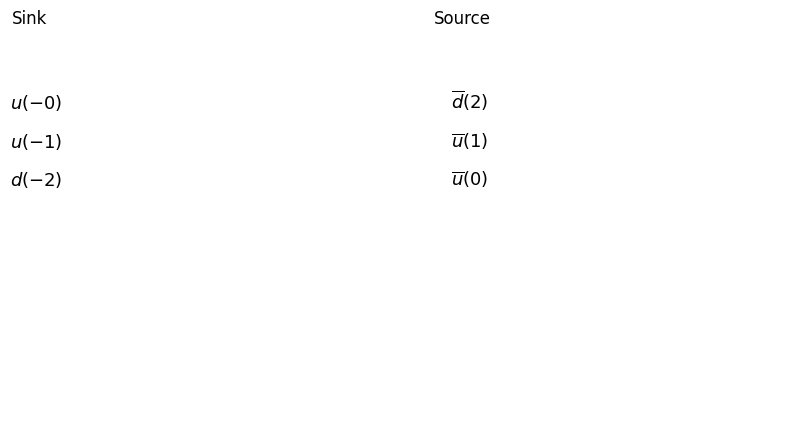

Diagram Number:1  [[[[1, 0, 0], [0, 0, 0]], [[1, 0, 1], [0, 0, 1]], [[1, 0, 2], [0, 0, 2]]], 2]


In [135]:
Sink = [Nucleonp]
Source = [NucleonpB]
result = Wick_Contractions(Sink, Source)
for i, x in enumerate(result):
    print(f"Diagram Number:{i + 1} ", x)

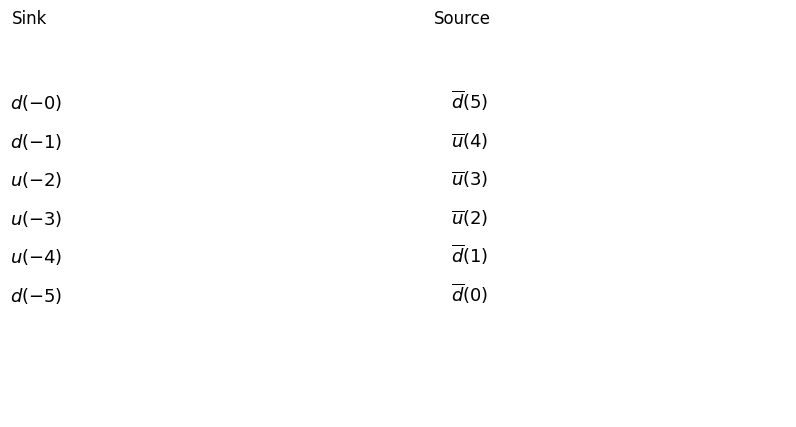

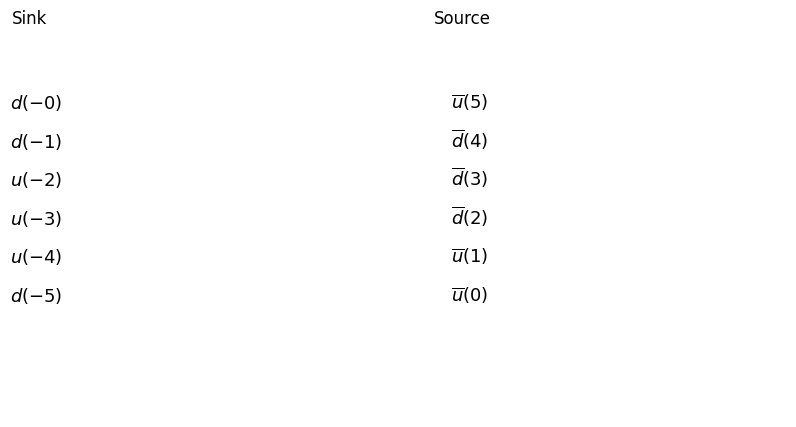

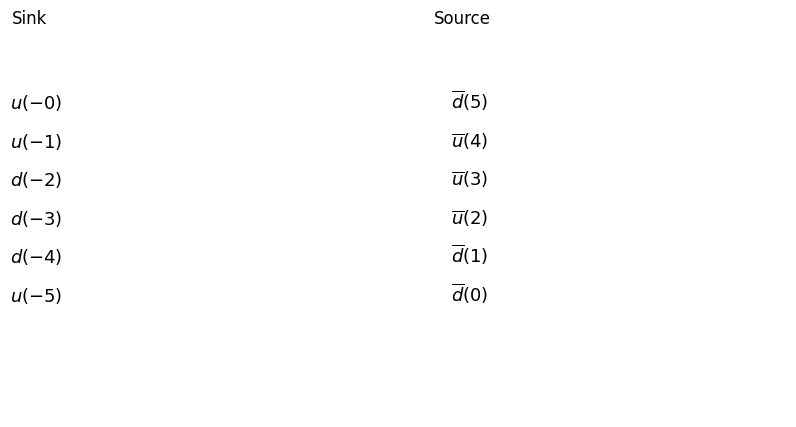

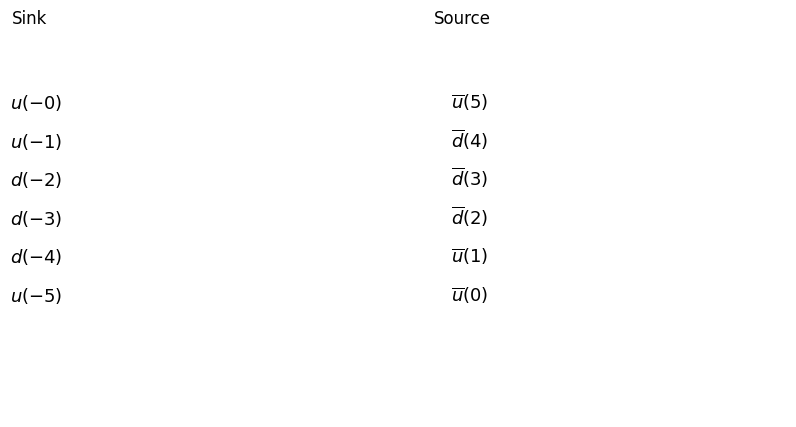

D.Nr:1  [[[1, 0, 0], [0, 1, 0]], [[1, 0, 1], [0, 0, 2]], [[1, 0, 2], [0, 0, 0]], [[1, 1, 0], [0, 1, 2]], [[1, 1, 1], [0, 0, 1]], [[1, 1, 2], [0, 1, 1]]] 32.0
D.Nr:2  [[[1, 0, 0], [0, 1, 0]], [[1, 0, 1], [0, 0, 2]], [[1, 0, 2], [0, 1, 2]], [[1, 1, 0], [0, 0, 0]], [[1, 1, 1], [0, 0, 1]], [[1, 1, 2], [0, 1, 1]]] -16.0
D.Nr:3  [[[1, 0, 0], [0, 1, 0]], [[1, 0, 1], [0, 1, 1]], [[1, 0, 2], [0, 0, 0]], [[1, 1, 0], [0, 1, 2]], [[1, 1, 1], [0, 0, 1]], [[1, 1, 2], [0, 0, 2]]] -16.0
D.Nr:4  [[[1, 0, 0], [0, 1, 0]], [[1, 0, 1], [0, 1, 1]], [[1, 0, 2], [0, 1, 2]], [[1, 1, 0], [0, 0, 0]], [[1, 1, 1], [0, 0, 1]], [[1, 1, 2], [0, 0, 2]]] 8.0
D.Nr:5  [[[1, 0, 0], [0, 0, 0]], [[1, 0, 1], [0, 0, 1]], [[1, 0, 2], [0, 0, 2]], [[1, 1, 0], [0, 1, 0]], [[1, 1, 1], [0, 1, 1]], [[1, 1, 2], [0, 1, 2]]] 8.0
D.Nr:6  [[[1, 0, 0], [0, 0, 0]], [[1, 0, 1], [0, 0, 1]], [[1, 0, 2], [0, 1, 0]], [[1, 1, 0], [0, 1, 1]], [[1, 1, 1], [0, 0, 2]], [[1, 1, 2], [0, 1, 2]]] 16.0
D.Nr:7  [[[1, 0, 0], [0, 1, 2]], [[1, 0, 1], [0, 0, 

In [140]:
#three_hadron_operator([3/2, 3/2, 3/2], 5/2, 3/2, 1, 'Delta', 'Delta', 'Delta')
#two_hadron_operator([1/2, 3/2], 1/2, 1/2, 'Nucleon', 'Delta')
Sink = [two_hadron_operator([1/2, 1/2], 0, 0, 'Nucleon', 'Nucleon')]
Source = [two_hadron_operatorB([1/2, 1/2], 0, 0, 'Nucleon', 'Nucleon')]
result = Wick_Contractions(Sink, Source)
simplified_result = Simplify_Overall(result, 1)
for i, x in enumerate(simplified_result):
    print(f"D.Nr:{i + 1} ", x[0], x[1])